<h1 align="center" style="font-weight: 900">Analysis of Predicting Krook </h1>

# Step 1: Data Preprocessing 

## 1.1 Load the Dataset

In [1]:
import pandas as pd
df=pd.read_csv('k_0_58.csv')
df.head()

/tmp/ipykernel_23893/1883953338.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('k_0_58.csv')


frame.encap_type  frame.len  frame.number  \
0                23        336       2900001   
1                23         70       2900002   
2                23         79       2900003   
3                23         76       2900004   
4                23         70       2900005   

                                          frame.time  frame.time_delta  \
0  Dec 26- 2020 21:06:41.105824000 GTB Standard Time          0.000943   
1  Dec 26- 2020 21:06:41.105878000 GTB Standard Time          0.000054   
2  Dec 26- 2020 21:06:41.106159000 GTB Standard Time          0.000281   
3  Dec 26- 2020 21:06:41.106584000 GTB Standard Time          0.000425   
4  Dec 26- 2020 21:06:41.106631000 GTB Standard Time          0.000047   

   frame.time_delta_displayed  frame.time_epoch  frame.time_relative  \
0                    0.000943      1.609010e+09           602.281351   
1                    0.000054      1.609010e+09           602.281405   
2                    0.000281      1.609010e+09           602.281686   
3                    0.000425      1.609010e+09           602.282111   
4                    0.000047      1.609010e+09           602.282158   

   radiotap.channel.flags.cck  radiotap.channel.flags.ofdm  ...  \
0                           0                            1  ...   
1                           0                            1  ...   
2                           0                            1  ...   
3                           0                            1  ...   
4                           0                            1  ...   

   wlan.fc.retry wlan.fc.subtype            wlan.ra wlan_radio.duration  \
0              1               5  00:c0:ca:a8:26:3e                 400   
1              0              13  0c:9d:92:54:fe:34                  44   
2              0               5  94:e9:79:82:c5:77                  32   
3              0              11  94:e9:79:82:c5:77                  28   
4              0              12  0c:9d:92:54:fe:34                  28   

  wlan_radio.channel  wlan_radio.data_rate  wlan_radio.frequency  \
0                 36                   6.0                  5180   
1                 36                   6.0                  5180   
2                 36                  24.0                  5180   
3                 36                  24.0                  5180   
4                 36                  24.0                  5180   

  wlan_radio.signal_dbm  wlan_radio.phy   Label  
0                   -27               5  Normal  
1                   -68               5  Normal  
2                   -32               5  Normal  
3                   -32               5  Normal  
4                   -70               5  Normal  

[5 rows x 34 columns]

In [118]:
# #statistical info
# df.describe()

In [119]:
# Check the column names
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.rxflags', 'radiotap.timestamp.ts', 'wlan.duration',
       'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata',
       'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry',
       'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration',
       'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency',
       'wlan_radio.signal_dbm', 'wlan_radio.phy', 'Label'],
      dtype='object')


In [120]:
# df.isnull().sum()

# Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values:\n", missing_values[missing_values > 0])

# # Optionally, drop rows with missing values or handle missing data by imputation
# df = df.dropna()  # This drops rows with any missing values


Columns with missing values:
 wlan.duration    199998
dtype: int64


In [121]:
# Check the percentage of missing values in the dataset
missing_percentage = df['wlan.duration'].isnull().mean() * 100
print(f"Percentage of missing 'wlan.duration' values: {missing_percentage:.2f}%")


Percentage of missing 'wlan.duration' values: 6.90%


In [122]:
# Group by 'wlan_radio.channel' to see if missing 'wlan.duration' is related to specific channels
missing_by_channel = df.groupby('wlan_radio.channel')['wlan.duration'].apply(lambda x: x.isnull().mean())
print(missing_by_channel)


wlan_radio.channel
36    0.068954
Name: wlan.duration, dtype: float64


In [123]:
# Similarly, check by other features
missing_by_rate = df.groupby('wlan_radio.data_rate')['wlan.duration'].apply(lambda x: x.isnull().mean())
print(missing_by_rate)

wlan_radio.data_rate
6.0000      0.116216
6.5000      0.017955
12.0000     0.045931
13.0000     0.013889
19.5000     0.029146
24.0000     0.050939
26.0000     0.081936
39.0000     0.188077
43.3333     0.000000
52.0000     0.176283
54.0000     0.065333
57.7778     0.000000
58.5000     0.120756
65.0000     0.066599
72.2222     0.029795
78.0000     0.015498
86.6667     0.053803
104.0000    0.007157
117.0000    0.074213
130.0000    0.083688
144.4440    0.076668
156.0000    0.009925
173.3330    0.031812
Name: wlan.duration, dtype: float64


In [124]:
missing_by_signal = df.groupby('radiotap.dbm_antsignal')['wlan.duration'].apply(lambda x: x.isnull().mean())
print(missing_by_signal)

radiotap.dbm_antsignal
-255    0.0
-252    0.0
-251    0.0
-250    0.0
-249    0.0
       ... 
-95     1.0
-96     1.0
-97     1.0
-98     1.0
-99     1.0
Name: wlan.duration, Length: 1002, dtype: float64


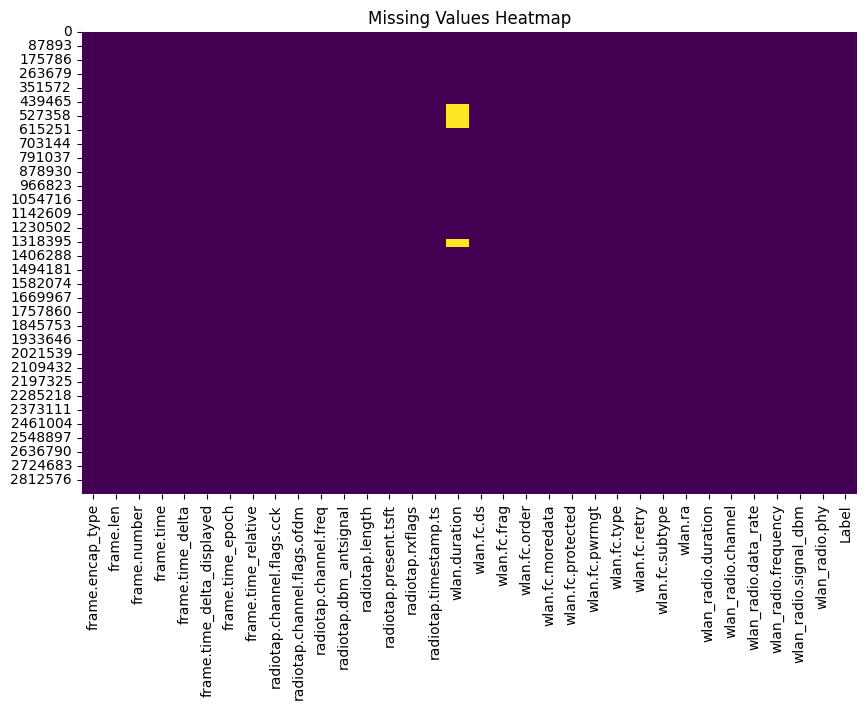

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# # Check correlation of missing values with other features
# df['wlan.duration_missing'] = df['wlan.duration'].isnull().astype(int)
# corr_matrix = df.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Including Missing Value Indicator')
# plt.show()


## 1.2 Flag and Model Missing Values as a Separate Category
Approach: Rather than filling or dropping missing values, create a new binary feature that flags rows where wlan.duration is missing, and assign a placeholder value (e.g., -1 or a specific number).
When to Use:
When missing values themselves might hold some important information (e.g., a device malfunction, an issue in data collection).
When your model can handle missing indicators (e.g., decision trees, certain machine learning algorithms).

Pros:

Retains the fact that there were missing values, which can be important for certain tasks (e.g., anomaly detection).
Suitable for models that can deal with categorical/binary indicators.

Cons:
Some models may not handle the added complexity of a missing flag.
Placeholder values (e.g., -1) can introduce bias if not handled correctly.

In [126]:
# df['wlan.duration_missing'] = df['wlan.duration'].isnull().astype(int)  # New binary column
# df['wlan.duration'].fillna(-1, inplace=True)  # Replace missing values with -1

# Replace missing values in 'wlan.duration' with -1 and assign it back to the original column
df['wlan.duration'] = df['wlan.duration'].fillna(-1)


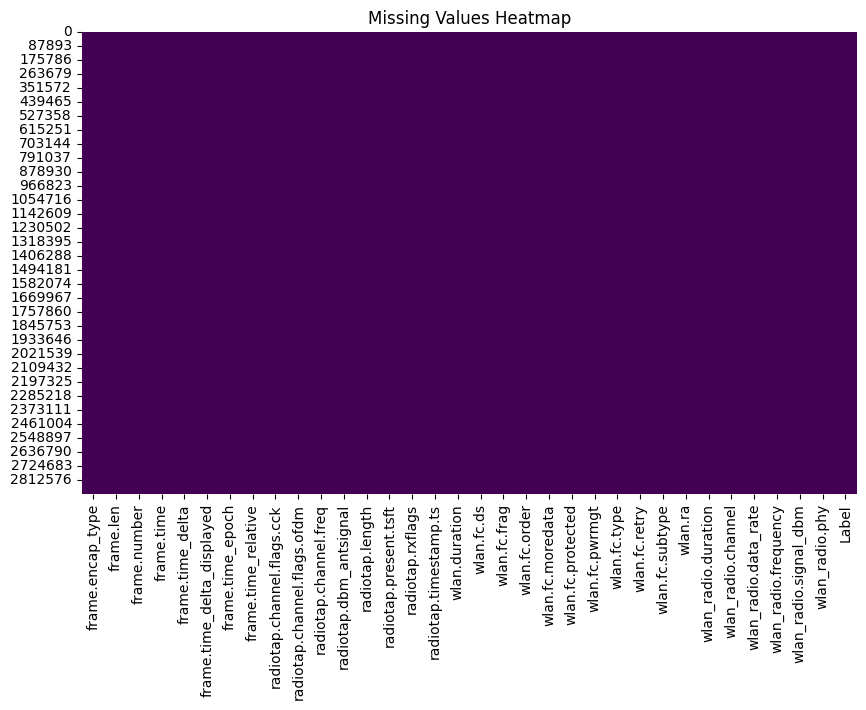

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# # Check correlation of missing values with other features
# df['wlan.duration_missing'] = df['wlan.duration'].isnull().astype(int)
# corr_matrix = df.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Including Missing Value Indicator')
# plt.show()

## 1.3 Convert Timestamp

In [128]:
# Function to clean and convert 'frame.time' to a datetime object
def convert_frame_time(time_str):
    # Remove 'GTB Standard Time' and convert to standard datetime format
    clean_time_str = time_str.replace(" GTB Standard Time", "")
    # Convert to datetime
    return pd.to_datetime(clean_time_str, format='%b %d- %Y %H:%M:%S.%f')

# Apply the conversion function to the 'frame.time' column
df['frame.time'] = df['frame.time'].apply(convert_frame_time)

# Check the result
print(df['frame.time'].head())

0   2020-12-26 21:06:41.105824
1   2020-12-26 21:06:41.105878
2   2020-12-26 21:06:41.106159
3   2020-12-26 21:06:41.106584
4   2020-12-26 21:06:41.106631
Name: frame.time, dtype: datetime64[ns]


In [129]:
# # Convert 'frame.time' to datetime and create additional time-based features
# df_cleaned['frame.time'] = pd.to_datetime(df_cleaned['frame.time'])

# # Extract useful features like hour, minute, second
# df_cleaned['hour'] = df_cleaned['frame.time'].dt.hour
# df_cleaned['minute'] = df_cleaned['frame.time'].dt.minute
# df_cleaned['second'] = df_cleaned['frame.time'].dt.second

# # Drop the original 'frame.time' column if needed, as we now have extracted useful features
# # df_cleaned = df_cleaned.drop(columns=['frame.time'])




# df['frame.time'] = pd.to_datetime(df['frame.time'])

# # Extract date and time components
# df['year'] = df['frame.time'].dt.year
# df['month'] = df['frame.time'].dt.month
# df['day'] = df['frame.time'].dt.day
# df['hour'] = df['frame.time'].dt.hour
# df['minute'] = df['frame.time'].dt.minute
# df['second'] = df['frame.time'].dt.second
# df['time_diff'] = df['frame.time'].diff().dt.total_seconds()

# # Convert to Unix epoch
# df['frame.time_epoch'] = df['frame.time'].astype(int) / 10



# Extract additional time features
df['hour'] = df['frame.time'].dt.hour
df['minute'] = df['frame.time'].dt.minute
df['second'] = df['frame.time'].dt.second

# Display the updated DataFrame
print(df.head())

   frame.encap_type  frame.len  frame.number                 frame.time  \
0                23        336       2900001 2020-12-26 21:06:41.105824   
1                23         70       2900002 2020-12-26 21:06:41.105878   
2                23         79       2900003 2020-12-26 21:06:41.106159   
3                23         76       2900004 2020-12-26 21:06:41.106584   
4                23         70       2900005 2020-12-26 21:06:41.106631   

   frame.time_delta  frame.time_delta_displayed  frame.time_epoch  \
0          0.000943                    0.000943      1.609010e+09   
1          0.000054                    0.000054      1.609010e+09   
2          0.000281                    0.000281      1.609010e+09   
3          0.000425                    0.000425      1.609010e+09   
4          0.000047                    0.000047      1.609010e+09   

   frame.time_relative  radiotap.channel.flags.cck  \
0           602.281351                           0   
1           602.281405    

In [130]:
df

frame.encap_type  frame.len  frame.number                 frame.time  \
0                      23        336       2900001 2020-12-26 21:06:41.105824   
1                      23         70       2900002 2020-12-26 21:06:41.105878   
2                      23         79       2900003 2020-12-26 21:06:41.106159   
3                      23         76       2900004 2020-12-26 21:06:41.106584   
4                      23         70       2900005 2020-12-26 21:06:41.106631   
...                   ...        ...           ...                        ...   
2900435                23         70         99996 2020-12-26 20:59:55.914973   
2900436                23         88         99997 2020-12-26 20:59:55.915209   
2900437                23         76         99998 2020-12-26 20:59:55.915323   
2900438                23         70         99999 2020-12-26 20:59:55.915368   
2900439                23         88        100000 2020-12-26 20:59:55.915559   

         frame.time_delta  frame.time_delta_displayed  frame.time_epoch  \
0                0.000943                    0.000943      1.609010e+09   
1                0.000054                    0.000054      1.609010e+09   
2                0.000281                    0.000281      1.609010e+09   
3                0.000425                    0.000425      1.609010e+09   
4                0.000047                    0.000047      1.609010e+09   
...                   ...                         ...               ...   
2900435          0.000046                    0.000046      1.609009e+09   
2900436          0.000236                    0.000236      1.609009e+09   
2900437          0.000114                    0.000114      1.609009e+09   
2900438          0.000045                    0.000045      1.609009e+09   
2900439          0.000191                    0.000191      1.609009e+09   

         frame.time_relative  radiotap.channel.flags.cck  \
0                 602.281351                           0   
1                 602.281405                           0   
2                 602.281686                           0   
3                 602.282111                           0   
4                 602.282158                           0   
...                      ...                         ...   
2900435           197.090500                           0   
2900436           197.090736                           0   
2900437           197.090850                           0   
2900438           197.090895                           0   
2900439           197.091086                           0   

         radiotap.channel.flags.ofdm  ...  wlan_radio.duration  \
0                                  1  ...                  400   
1                                  1  ...                   44   
2                                  1  ...                   32   
3                                  1  ...                   28   
4                                  1  ...                   28   
...                              ...  ...                  ...   
2900435                            1  ...                   28   
2900436                            1  ...                   32   
2900437                            1  ...                   28   
2900438                            1  ...                   28   
2900439                            1  ...                   32   

        wlan_radio.channel  wlan_radio.data_rate wlan_radio.frequency  \
0                       36                   6.0                 5180   
1                       36                   6.0                 5180   
2                       36                  24.0                 5180   
3                       36                  24.0                 5180   
4                       36                  24.0                 5180   
...                    ...                   ...                  ...   
2900435                 36                  24.0                 5180   
2900436                 36           

In [131]:
df = df.drop(columns=['frame.time'])
df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_delta_displayed  frame.time_epoch  frame.time_relative  \
0                          0.000943      1.609010e+09           602.281351   
1                          0.000054      1.609010e+09           602.281405   
2                          0.000281      1.609010e+09           602.281686   
3                          0.000425      1.609010e+09           602.282111   
4                          0.000047      1.609010e+09           602.282158   
...                             ...               ...                  ...   
2900435                    0.000046      1.609009e+09           197.090500   
2900436                    0.000236      1.609009e+09           197.090736   
2900437                    0.000114      1.609009e+09           197.090850   
2900438                    0.000045      1.609009e+09           197.090895   
2900439                    0.000191      1.609009e+09           197.091086   

         radiotap.channel.flags.cck  radiotap.channel.flags.ofdm  \
0                                 0                            1   
1                                 0                            1   
2                                 0                            1   
3                                 0                            1   
4                                 0                            1   
...                             ...                          ...   
2900435                           0                            1   
2900436                           0                            1   
2900437                           0                            1   
2900438                           0                            1   
2900439                           0                            1   

         radiotap.channel.freq  ... wlan_radio.duration  wlan_radio.channel  \
0                         5180  ...                 400                  36   
1                         5180  ...                  44                  36   
2                         5180  ...                  32                  36   
3                         5180  ...                  28                  36   
4                         5180  ...                  28                  36   
...                        ...  ...                 ...                 ...   
2900435                   5180  ...                  28                  36   
2900436                   5180  ...                  32                  36   
2900437                   5180  ...                  28                  36   
2900438                   5180  ...                  28                  36   
2900439                   5180  ...                  32                  36   

        wlan_radio.data_rate wlan_radio.frequency  wlan_radio.signal_dbm  \
0                        6.0                 5180                    -27   
1                        6.0                 5180                    -68   
2                       24.0                 5180                    -32   
3                       24.0                 5180                    -32   
4                       24.0                 5180            

In [132]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900440 entries, 0 to 2900439
Data columns (total 36 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   frame.encap_type             int64  
 1   frame.len                    int64  
 2   frame.number                 int64  
 3   frame.time_delta             float64
 4   frame.time_delta_displayed   float64
 5   frame.time_epoch             float64
 6   frame.time_relative          float64
 7   radiotap.channel.flags.cck   int64  
 8   radiotap.channel.flags.ofdm  int64  
 9   radiotap.channel.freq        int64  
 10  radiotap.dbm_antsignal       object 
 11  radiotap.length              int64  
 12  radiotap.present.tsft        object 
 13  radiotap.rxflags             object 
 14  radiotap.timestamp.ts        int64  
 15  wlan.duration                float64
 16  wlan.fc.ds                   object 
 17  wlan.fc.frag                 int64  
 18  wlan.fc.order                int64  
 19  

## 1.4 Encode MAC addresses

In [133]:
from sklearn.preprocessing import LabelEncoder

# Encode MAC addresses
le = LabelEncoder()
df['wlan.ra'] = le.fit_transform(df['wlan.ra'])
df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_delta_displayed  frame.time_epoch  frame.time_relative  \
0                          0.000943      1.609010e+09           602.281351   
1                          0.000054      1.609010e+09           602.281405   
2                          0.000281      1.609010e+09           602.281686   
3                          0.000425      1.609010e+09           602.282111   
4                          0.000047      1.609010e+09           602.282158   
...                             ...               ...                  ...   
2900435                    0.000046      1.609009e+09           197.090500   
2900436                    0.000236      1.609009e+09           197.090736   
2900437                    0.000114      1.609009e+09           197.090850   
2900438                    0.000045      1.609009e+09           197.090895   
2900439                    0.000191      1.609009e+09           197.091086   

         radiotap.channel.flags.cck  radiotap.channel.flags.ofdm  \
0                                 0                            1   
1                                 0                            1   
2                                 0                            1   
3                                 0                            1   
4                                 0                            1   
...                             ...                          ...   
2900435                           0                            1   
2900436                           0                            1   
2900437                           0                            1   
2900438                           0                            1   
2900439                           0                            1   

         radiotap.channel.freq  ... wlan_radio.duration  wlan_radio.channel  \
0                         5180  ...                 400                  36   
1                         5180  ...                  44                  36   
2                         5180  ...                  32                  36   
3                         5180  ...                  28                  36   
4                         5180  ...                  28                  36   
...                        ...  ...                 ...                 ...   
2900435                   5180  ...                  28                  36   
2900436                   5180  ...                  32                  36   
2900437                   5180  ...                  28                  36   
2900438                   5180  ...                  28                  36   
2900439                   5180  ...                  32                  36   

        wlan_radio.data_rate wlan_radio.frequency  wlan_radio.signal_dbm  \
0                        6.0                 5180                    -27   
1                        6.0                 5180                    -68   
2                       24.0                 5180                    -32   
3                       24.0                 5180                    -32   
4                       24.0                 5180            

In [134]:
df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_delta_displayed  frame.time_epoch  frame.time_relative  \
0                          0.000943      1.609010e+09           602.281351   
1                          0.000054      1.609010e+09           602.281405   
2                          0.000281      1.609010e+09           602.281686   
3                          0.000425      1.609010e+09           602.282111   
4                          0.000047      1.609010e+09           602.282158   
...                             ...               ...                  ...   
2900435                    0.000046      1.609009e+09           197.090500   
2900436                    0.000236      1.609009e+09           197.090736   
2900437                    0.000114      1.609009e+09           197.090850   
2900438                    0.000045      1.609009e+09           197.090895   
2900439                    0.000191      1.609009e+09           197.091086   

         radiotap.channel.flags.cck  radiotap.channel.flags.ofdm  \
0                                 0                            1   
1                                 0                            1   
2                                 0                            1   
3                                 0                            1   
4                                 0                            1   
...                             ...                          ...   
2900435                           0                            1   
2900436                           0                            1   
2900437                           0                            1   
2900438                           0                            1   
2900439                           0                            1   

         radiotap.channel.freq  ... wlan_radio.duration  wlan_radio.channel  \
0                         5180  ...                 400                  36   
1                         5180  ...                  44                  36   
2                         5180  ...                  32                  36   
3                         5180  ...                  28                  36   
4                         5180  ...                  28                  36   
...                        ...  ...                 ...                 ...   
2900435                   5180  ...                  28                  36   
2900436                   5180  ...                  32                  36   
2900437                   5180  ...                  28                  36   
2900438                   5180  ...                  28                  36   
2900439                   5180  ...                  32                  36   

        wlan_radio.data_rate wlan_radio.frequency  wlan_radio.signal_dbm  \
0                        6.0                 5180                    -27   
1                        6.0                 5180                    -68   
2                       24.0                 5180                    -32   
3                       24.0                 5180                    -32   
4                       24.0                 5180            

## 1.5 Cleaning and Converting the Column with Range Values
Define a function to process the string entries in the form of '-56-56-62'. 

1. Split the string into individual numeric values.
2. Calculate the mean of the values.
3. Convert valid strings and numeric values to float.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900440 entries, 0 to 2900439
Data columns (total 36 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   frame.encap_type             int64  
 1   frame.len                    int64  
 2   frame.number                 int64  
 3   frame.time_delta             float64
 4   frame.time_delta_displayed   float64
 5   frame.time_epoch             float64
 6   frame.time_relative          float64
 7   radiotap.channel.flags.cck   int64  
 8   radiotap.channel.flags.ofdm  int64  
 9   radiotap.channel.freq        int64  
 10  radiotap.dbm_antsignal       object 
 11  radiotap.length              int64  
 12  radiotap.present.tsft        object 
 13  radiotap.rxflags             object 
 14  radiotap.timestamp.ts        int64  
 15  wlan.duration                float64
 16  wlan.fc.ds                   object 
 17  wlan.fc.frag                 int64  
 18  wlan.fc.order                int64  
 19  

In [136]:
print(df['radiotap.dbm_antsignal'])

0                -83
1               -194
2                -98
3                -98
4               -218
             ...    
2900435    -62-62-67
2900436    -62-62-67
2900437    -36-39-36
2900438    -62-62-67
2900439    -62-62-67
Name: radiotap.dbm_antsignal, Length: 2900440, dtype: object


In [137]:
import numpy as np

def clean_dbm_antsignal(val):
    if isinstance(val, str):
        # Check if the value is a range (contains multiple numbers separated by '-')
        if '-' in val and val.count('-') > 1:
            # Extract the individual numbers from the string and calculate the mean
            numbers = [int(num) for num in val.split('-') if num.lstrip('-').isdigit()]
            return np.mean(numbers)  # Return the average of the numbers
        try:
            # If it's a string that can be converted to a single float
            return float(val)
        except ValueError:
            # Return NaN for any other unexpected cases
            return np.nan
    return val  # Return the value unchanged if it's already numeric

# Apply the cleaning function to the 'radiotap.dbm_antsignal' column
df['radiotap.dbm_antsignal'] = df['radiotap.dbm_antsignal'].apply(clean_dbm_antsignal)

# Convert the column to numeric, coercing any remaining errors to NaN
df['radiotap.dbm_antsignal'] = pd.to_numeric(df['radiotap.dbm_antsignal'], errors='coerce')

# Display the cleaned data
print(df['radiotap.dbm_antsignal'].head())

0    -83.0
1   -194.0
2    -98.0
3    -98.0
4   -218.0
Name: radiotap.dbm_antsignal, dtype: float64


In [138]:
missing_values = df['radiotap.dbm_antsignal'].isna().sum()
print(f"Missing values in 'radiotap.dbm_antsignal': {missing_values}")

Missing values in 'radiotap.dbm_antsignal': 0


In [139]:
df = df.dropna(subset=['radiotap.dbm_antsignal'])

In [140]:
# Check the column names
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm',
       'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'radiotap.length',
       'radiotap.present.tsft', 'radiotap.rxflags', 'radiotap.timestamp.ts',
       'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.order',
       'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt',
       'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan.ra',
       'wlan_radio.duration', 'wlan_radio.channel', 'wlan_radio.data_rate',
       'wlan_radio.frequency', 'wlan_radio.signal_dbm', 'wlan_radio.phy',
       'Label', 'hour', 'minute', 'second'],
      dtype='object')


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900440 entries, 0 to 2900439
Data columns (total 36 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   frame.encap_type             int64  
 1   frame.len                    int64  
 2   frame.number                 int64  
 3   frame.time_delta             float64
 4   frame.time_delta_displayed   float64
 5   frame.time_epoch             float64
 6   frame.time_relative          float64
 7   radiotap.channel.flags.cck   int64  
 8   radiotap.channel.flags.ofdm  int64  
 9   radiotap.channel.freq        int64  
 10  radiotap.dbm_antsignal       float64
 11  radiotap.length              int64  
 12  radiotap.present.tsft        object 
 13  radiotap.rxflags             object 
 14  radiotap.timestamp.ts        int64  
 15  wlan.duration                float64
 16  wlan.fc.ds                   object 
 17  wlan.fc.frag                 int64  
 18  wlan.fc.order                int64  
 19  

In [142]:
print(df['radiotap.present.tsft'])

0          1-0-0
1          1-0-0
2          1-0-0
3          1-0-0
4          1-0-0
           ...  
2900435    1-0-0
2900436    1-0-0
2900437    1-0-0
2900438    1-0-0
2900439    1-0-0
Name: radiotap.present.tsft, Length: 2900440, dtype: object


### Approach 1. Split the Column into Multiple Columns
We can split the values into separate columns based on the '-' separator.

In [143]:
# # Split the 'radiotap.present.tsft' column into three separate columns
# df_cleaned[['feature1', 'feature2', 'feature3']] = df_cleaned['radiotap.present.tsft'].str.split('-', expand=True)

# # Convert each new column to numeric (if necessary)
# df_cleaned['feature1'] = pd.to_numeric(df_cleaned['feature1'], errors='coerce')
# df_cleaned['feature2'] = pd.to_numeric(df_cleaned['feature2'], errors='coerce')
# df_cleaned['feature3'] = pd.to_numeric(df_cleaned['feature3'], errors='coerce')

# # Drop the original 'radiotap.present.tsft' column if it's no longer needed
# df_cleaned = df_cleaned.drop(columns=['radiotap.present.tsft'])

# # Display the first few rows of the updated DataFrame
# print(df_cleaned.head())


### Approach 2: If It's a Single Compound Value
If the values like 1-0-0 represent a single value and the dashes are just delimiters, you could concatenate the values into a single string and then convert that to an integer or float (e.g., convert 1-0-0 to 100).

In [144]:
# # Replace dashes with an empty string to concatenate the numbers
# df_cleaned['radiotap.present.tsft_cleaned'] = df_cleaned['radiotap.present.tsft'].str.replace('-', '')

# # Convert the concatenated string into an integer or float
# df_cleaned['radiotap.present.tsft_cleaned'] = pd.to_numeric(df_cleaned['radiotap.present.tsft_cleaned'], errors='coerce')

# # Drop the original column if necessary
# df_cleaned = df_cleaned.drop(columns=['radiotap.present.tsft'])

# # Display the first few rows of the updated DataFrame
# print(df_cleaned.head())


### Approach 3: Leave It as a Categorical Feature (Used)
If 1-0-0 represents different categorical values, you can leave it as is and convert it to a categorical feature for analysis.

In [145]:
# Convert the column to categorical type
df['radiotap.present.tsft'] = df['radiotap.present.tsft'].astype('category')

# Display the first few rows of the updated DataFrame
print(df['radiotap.present.tsft'].head())

0    1-0-0
1    1-0-0
2    1-0-0
3    1-0-0
4    1-0-0
Name: radiotap.present.tsft, dtype: category
Categories (2, object): ['0-0-0', '1-0-0']


In [146]:
# # One-hot encode the 'radiotap.present.tsft' column
# df_cleaned = pd.get_dummies(df_cleaned, columns=['radiotap.present.tsft'], prefix='tsft', drop_first=True)

# # Display the first few rows to verify
# print(df_cleaned.head())


# Map the 'radiotap.present.tsft' values to 0 and 1
df['radiotap.present.tsft'] = df['radiotap.present.tsft'].map({'0-0-0': 0, '1-0-0': 1})

# Display the first few rows to verify
print(df['radiotap.present.tsft'].head())

0    1
1    1
2    1
3    1
4    1
Name: radiotap.present.tsft, dtype: category
Categories (2, int64): [0, 1]


In [147]:
print(df['radiotap.present.tsft'])

0          1
1          1
2          1
3          1
4          1
          ..
2900435    1
2900436    1
2900437    1
2900438    1
2900439    1
Name: radiotap.present.tsft, Length: 2900440, dtype: category
Categories (2, int64): [0, 1]


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900440 entries, 0 to 2900439
Data columns (total 36 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   frame.encap_type             int64   
 1   frame.len                    int64   
 2   frame.number                 int64   
 3   frame.time_delta             float64 
 4   frame.time_delta_displayed   float64 
 5   frame.time_epoch             float64 
 6   frame.time_relative          float64 
 7   radiotap.channel.flags.cck   int64   
 8   radiotap.channel.flags.ofdm  int64   
 9   radiotap.channel.freq        int64   
 10  radiotap.dbm_antsignal       float64 
 11  radiotap.length              int64   
 12  radiotap.present.tsft        category
 13  radiotap.rxflags             object  
 14  radiotap.timestamp.ts        int64   
 15  wlan.duration                float64 
 16  wlan.fc.ds                   object  
 17  wlan.fc.frag                 int64   
 18  wlan.fc.order         

## 1.6 Unique values in 'radiotap.rxflags' and 'wlan.fc.ds'

In [149]:
print(df['radiotap.rxflags'])
print(df['wlan.fc.ds'])

0          0x00000000
1          0x00000000
2          0x00000000
3          0x00000000
4          0x00000000
              ...    
2900435    0x00000000
2900436    0x00000000
2900437    0x00000000
2900438    0x00000000
2900439    0x00000000
Name: radiotap.rxflags, Length: 2900440, dtype: object
0          0x00000000
1          0x00000000
2          0x00000000
3          0x00000000
4          0x00000000
              ...    
2900435    0x00000000
2900436    0x00000000
2900437    0x00000000
2900438    0x00000000
2900439    0x00000000
Name: wlan.fc.ds, Length: 2900440, dtype: object


In [150]:
# Check unique values in 'radiotap.rxflags' and 'wlan.fc.ds'
print("Unique values in 'radiotap.rxflags':", df['radiotap.rxflags'].unique())
print("Unique values in 'wlan.fc.ds':", df['wlan.fc.ds'].unique())

Unique values in 'radiotap.rxflags': ['0x00000000']
Unique values in 'wlan.fc.ds': ['0x00000000' '0x00000002' '0x00000001' '0x00000003']


In [151]:
# Drop the 'radiotap.rxflags' column as it contains only one value
df = df.drop(columns=['radiotap.rxflags'])

# Verify the column has been removed
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm',
       'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'radiotap.length',
       'radiotap.present.tsft', 'radiotap.timestamp.ts', 'wlan.duration',
       'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata',
       'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry',
       'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration',
       'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency',
       'wlan_radio.signal_dbm', 'wlan_radio.phy', 'Label', 'hour', 'minute',
       'second'],
      dtype='object')


### Approach 1. Interpret or Encode wlan.fc.ds: (Used)

The wlan.fc.ds values could represent:

0x00000000: No specific DS flag.
0x00000001, 0x00000002, 0x00000003: Different DS-related flags (e.g., "To DS", "From DS").
To make this column usable in ml models, we convert these hexadecimal values into their integer equivalents or use one-hot encoding if they represent distinct categories.

Convert Hexadecimal to Integer:

In [152]:
# Convert 'wlan.fc.ds' from hexadecimal to integer
df['wlan.fc.ds'] = df['wlan.fc.ds'].apply(lambda x: int(x, 16))

# Check the first few rows after conversion
# print(df_cleaned['wlan.fc.ds'].head())


### Approach 2. One-Hot Encoding (if categorical):
If these values represent distinct categories (such as different types of frame control), we can use one-hot encoding:

In [153]:
# # One-hot encode the 'wlan.fc.ds' column
# df = pd.get_dummies(df, columns=['wlan.fc.ds'], prefix='fc_ds', drop_first=True)

# # Check the updated DataFrame
# print(df.head())



In [154]:
df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_delta_displayed  frame.time_epoch  frame.time_relative  \
0                          0.000943      1.609010e+09           602.281351   
1                          0.000054      1.609010e+09           602.281405   
2                          0.000281      1.609010e+09           602.281686   
3                          0.000425      1.609010e+09           602.282111   
4                          0.000047      1.609010e+09           602.282158   
...                             ...               ...                  ...   
2900435                    0.000046      1.609009e+09           197.090500   
2900436                    0.000236      1.609009e+09           197.090736   
2900437                    0.000114      1.609009e+09           197.090850   
2900438                    0.000045      1.609009e+09           197.090895   
2900439                    0.000191      1.609009e+09           197.091086   

         radiotap.channel.flags.cck  radiotap.channel.flags.ofdm  \
0                                 0                            1   
1                                 0                            1   
2                                 0                            1   
3                                 0                            1   
4                                 0                            1   
...                             ...                          ...   
2900435                           0                            1   
2900436                           0                            1   
2900437                           0                            1   
2900438                           0                            1   
2900439                           0                            1   

         radiotap.channel.freq  ...  wlan_radio.duration  wlan_radio.channel  \
0                         5180  ...                  400                  36   
1                         5180  ...                   44                  36   
2                         5180  ...                   32                  36   
3                         5180  ...                   28                  36   
4                         5180  ...                   28                  36   
...                        ...  ...                  ...                 ...   
2900435                   5180  ...                   28                  36   
2900436                   5180  ...                   32                  36   
2900437                   5180  ...                   28                  36   
2900438                   5180  ...                   28                  36   
2900439                   5180  ...                   32                  36   

        wlan_radio.data_rate  wlan_radio.frequency  wlan_radio.signal_dbm  \
0                        6.0                  5180                    -27   
1                        6.0                  5180                    -68   
2                       24.0                  5180                    -32   
3                       24.0                  5180                    -32   
4                       24.0                

## 1.7 Checking the Label Data

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900440 entries, 0 to 2900439
Data columns (total 35 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   frame.encap_type             int64   
 1   frame.len                    int64   
 2   frame.number                 int64   
 3   frame.time_delta             float64 
 4   frame.time_delta_displayed   float64 
 5   frame.time_epoch             float64 
 6   frame.time_relative          float64 
 7   radiotap.channel.flags.cck   int64   
 8   radiotap.channel.flags.ofdm  int64   
 9   radiotap.channel.freq        int64   
 10  radiotap.dbm_antsignal       float64 
 11  radiotap.length              int64   
 12  radiotap.present.tsft        category
 13  radiotap.timestamp.ts        int64   
 14  wlan.duration                float64 
 15  wlan.fc.ds                   int64   
 16  wlan.fc.frag                 int64   
 17  wlan.fc.order                int64   
 18  wlan.fc.moredata      

In [156]:
print("Unique values in 'Label':", df['Label'].unique())

Unique values in 'Label': ['Normal' 'Kr00k' 'Kr00K']


In [157]:
# Convert 'Label' column to lowercase to handle inconsistent capitalization
# df['Label'] = df['Label'].str.lower()

In [158]:
# print("Unique values in 'Label':", df['Label'].unique())

In [159]:

# # Optionally, replace 'kr00k' with 'krook' to make it consistent
# df['Label'] = df['Label'].replace('kr00k', 'krook')

# # Check unique values after cleaning
# print("Unique values in 'Label':", df['Label'].unique())

In [160]:
# Convert 'Label' to binary format
df['Label'] = df['Label'].map({'Normal': 0, 'Kr00k': 1, 'Kr00K': 1})

# Check the result
print(df['Label'].head())

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64


In [161]:
print("Unique values in 'Label':", df['Label'].unique())

Unique values in 'Label': [0 1]


In [162]:
df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_delta_displayed  frame.time_epoch  frame.time_relative  \
0                          0.000943      1.609010e+09           602.281351   
1                          0.000054      1.609010e+09           602.281405   
2                          0.000281      1.609010e+09           602.281686   
3                          0.000425      1.609010e+09           602.282111   
4                          0.000047      1.609010e+09           602.282158   
...                             ...               ...                  ...   
2900435                    0.000046      1.609009e+09           197.090500   
2900436                    0.000236      1.609009e+09           197.090736   
2900437                    0.000114      1.609009e+09           197.090850   
2900438                    0.000045      1.609009e+09           197.090895   
2900439                    0.000191      1.609009e+09           197.091086   

         radiotap.channel.flags.cck  radiotap.channel.flags.ofdm  \
0                                 0                            1   
1                                 0                            1   
2                                 0                            1   
3                                 0                            1   
4                                 0                            1   
...                             ...                          ...   
2900435                           0                            1   
2900436                           0                            1   
2900437                           0                            1   
2900438                           0                            1   
2900439                           0                            1   

         radiotap.channel.freq  ...  wlan_radio.duration  wlan_radio.channel  \
0                         5180  ...                  400                  36   
1                         5180  ...                   44                  36   
2                         5180  ...                   32                  36   
3                         5180  ...                   28                  36   
4                         5180  ...                   28                  36   
...                        ...  ...                  ...                 ...   
2900435                   5180  ...                   28                  36   
2900436                   5180  ...                   32                  36   
2900437                   5180  ...                   28                  36   
2900438                   5180  ...                   28                  36   
2900439                   5180  ...                   32                  36   

        wlan_radio.data_rate  wlan_radio.frequency  wlan_radio.signal_dbm  \
0                        6.0                  5180                    -27   
1                        6.0                  5180                    -68   
2                       24.0                  5180                    -32   
3                       24.0                  5180                    -32   
4                       24.0                

## 1.8 Multicollinearity: 
Use the Variance Inflation Factor (VIF) to check for multicollinearity. VIF values above 10 indicate high multicollinearity.

In [163]:
# Verify the column has been removed
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm',
       'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'radiotap.length',
       'radiotap.present.tsft', 'radiotap.timestamp.ts', 'wlan.duration',
       'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata',
       'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry',
       'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration',
       'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency',
       'wlan_radio.signal_dbm', 'wlan_radio.phy', 'Label', 'hour', 'minute',
       'second'],
      dtype='object')


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


features = ['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm',
       'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'radiotap.length',
       'radiotap.present.tsft', 'radiotap.timestamp.ts', 'wlan.duration',
       'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata',
       'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry',
       'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration',
       'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency',
       'wlan_radio.signal_dbm', 'wlan_radio.phy', 'Label', 'hour', 'minute',
       'second']

X = df[features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

/data01/user1/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/data01/user1/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                        Feature           VIF
0              frame.encap_type  0.000000e+00
1                     frame.len  5.614726e+00
2                  frame.number  1.652663e+02
3              frame.time_delta  4.644737e+08
4    frame.time_delta_displayed  4.644737e+08
5              frame.time_epoch  2.482674e+05
6           frame.time_relative  1.726622e+05
7    radiotap.channel.flags.cck           NaN
8   radiotap.channel.flags.ofdm  0.000000e+00
9         radiotap.channel.freq  0.000000e+00
10       radiotap.dbm_antsignal  1.519008e+00
11              radiotap.length  3.465375e+01
12        radiotap.present.tsft  1.219118e+04
13        radiotap.timestamp.ts  1.640792e+00
14                wlan.duration  1.116334e+00
15                   wlan.fc.ds  2.074641e+01
16                 wlan.fc.frag  1.008702e+00
17                wlan.fc.order  1.008509e+00
18             wlan.fc.moredata  1.504055e+00
19            wlan.fc.protected  2.314064e+01
20               wlan.fc.pwrmgt  1

### Remove One of the Correlated Features: 
Since frame.time_delta and frame.time_delta_displayed are highly correlated, consider dropping one.

In [164]:
df = df.drop(columns=['frame.time_delta_displayed'])

In [181]:
print(df['frame.encap_type'].unique())

print(df['radiotap.channel.flags.cck'].unique())
print(df['radiotap.channel.flags.ofdm'].unique())
print(df['radiotap.channel.freq'].unique())

print(df['wlan_radio.channel'].unique())
print(df['wlan_radio.frequency'].unique())

print(df['wlan.fc.frag'].unique())
print(df['wlan.fc.order'].unique())
print(df['wlan.fc.pwrmgt'].unique())




# 'frame.len', 'radiotap.length', 'radiotap.dbm_antsignal', 'radiotap.channel.freq', 'wlan.fc.type',
# 'wlan.fc.subtype', 'wlan.duration', 'radiotap.present.tsft', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 
# 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected'


# 0              frame.encap_type  0.000000e+00
# 8   radiotap.channel.flags.ofdm  0.000000e+00
# 9         radiotap.channel.freq  0.000000e+00
# 26           wlan_radio.channel  0.000000e+00
# 28         wlan_radio.frequency  0.000000e+00

# 'radiotap.channel.freq'
# 'radiotap.channel.flags.cck'
# 'radiotap.channel.flags.ofdm'


[23]
[0]
[1]
[5180]
[36]
[5180]
[0 1]
[0 1]
[0 1]


In [166]:
import pandas as pd


print(df['frame.encap_type'].dtype)
print(df['radiotap.channel.flags.cck'].dtype)
print(df['radiotap.channel.flags.ofdm'].dtype)
print(df['radiotap.channel.freq'].dtype)
print(df['wlan_radio.channel'].dtype)
print(df['wlan_radio.frequency'].dtype)
print(df['wlan.fc.frag'].dtype)
print(df['wlan.fc.order'].dtype)
print(df['wlan.fc.pwrmgt'].dtype)


int64
int64
int64
int64
int64
int64
int64
int64
int64


# Step 2: Exploratory Data Analysis (EDA)

                             frame.encap_type  frame.len  frame.number  \
frame.encap_type                          NaN        NaN           NaN   
frame.len                                 NaN   1.000000     -0.278863   
frame.number                              NaN  -0.278863      1.000000   
frame.time_delta                          NaN  -0.010224     -0.044613   
frame.time_epoch                          NaN  -0.278939      0.996389   
frame.time_relative                       NaN  -0.278949      0.996391   
radiotap.channel.flags.cck                NaN        NaN           NaN   
radiotap.channel.flags.ofdm               NaN        NaN           NaN   
radiotap.channel.freq                     NaN        NaN           NaN   
radiotap.dbm_antsignal                    NaN   0.214387     -0.297984   
radiotap.length                           NaN   0.831100     -0.288780   
radiotap.present.tsft                     NaN  -0.822369      0.287555   
radiotap.timestamp.ts                 

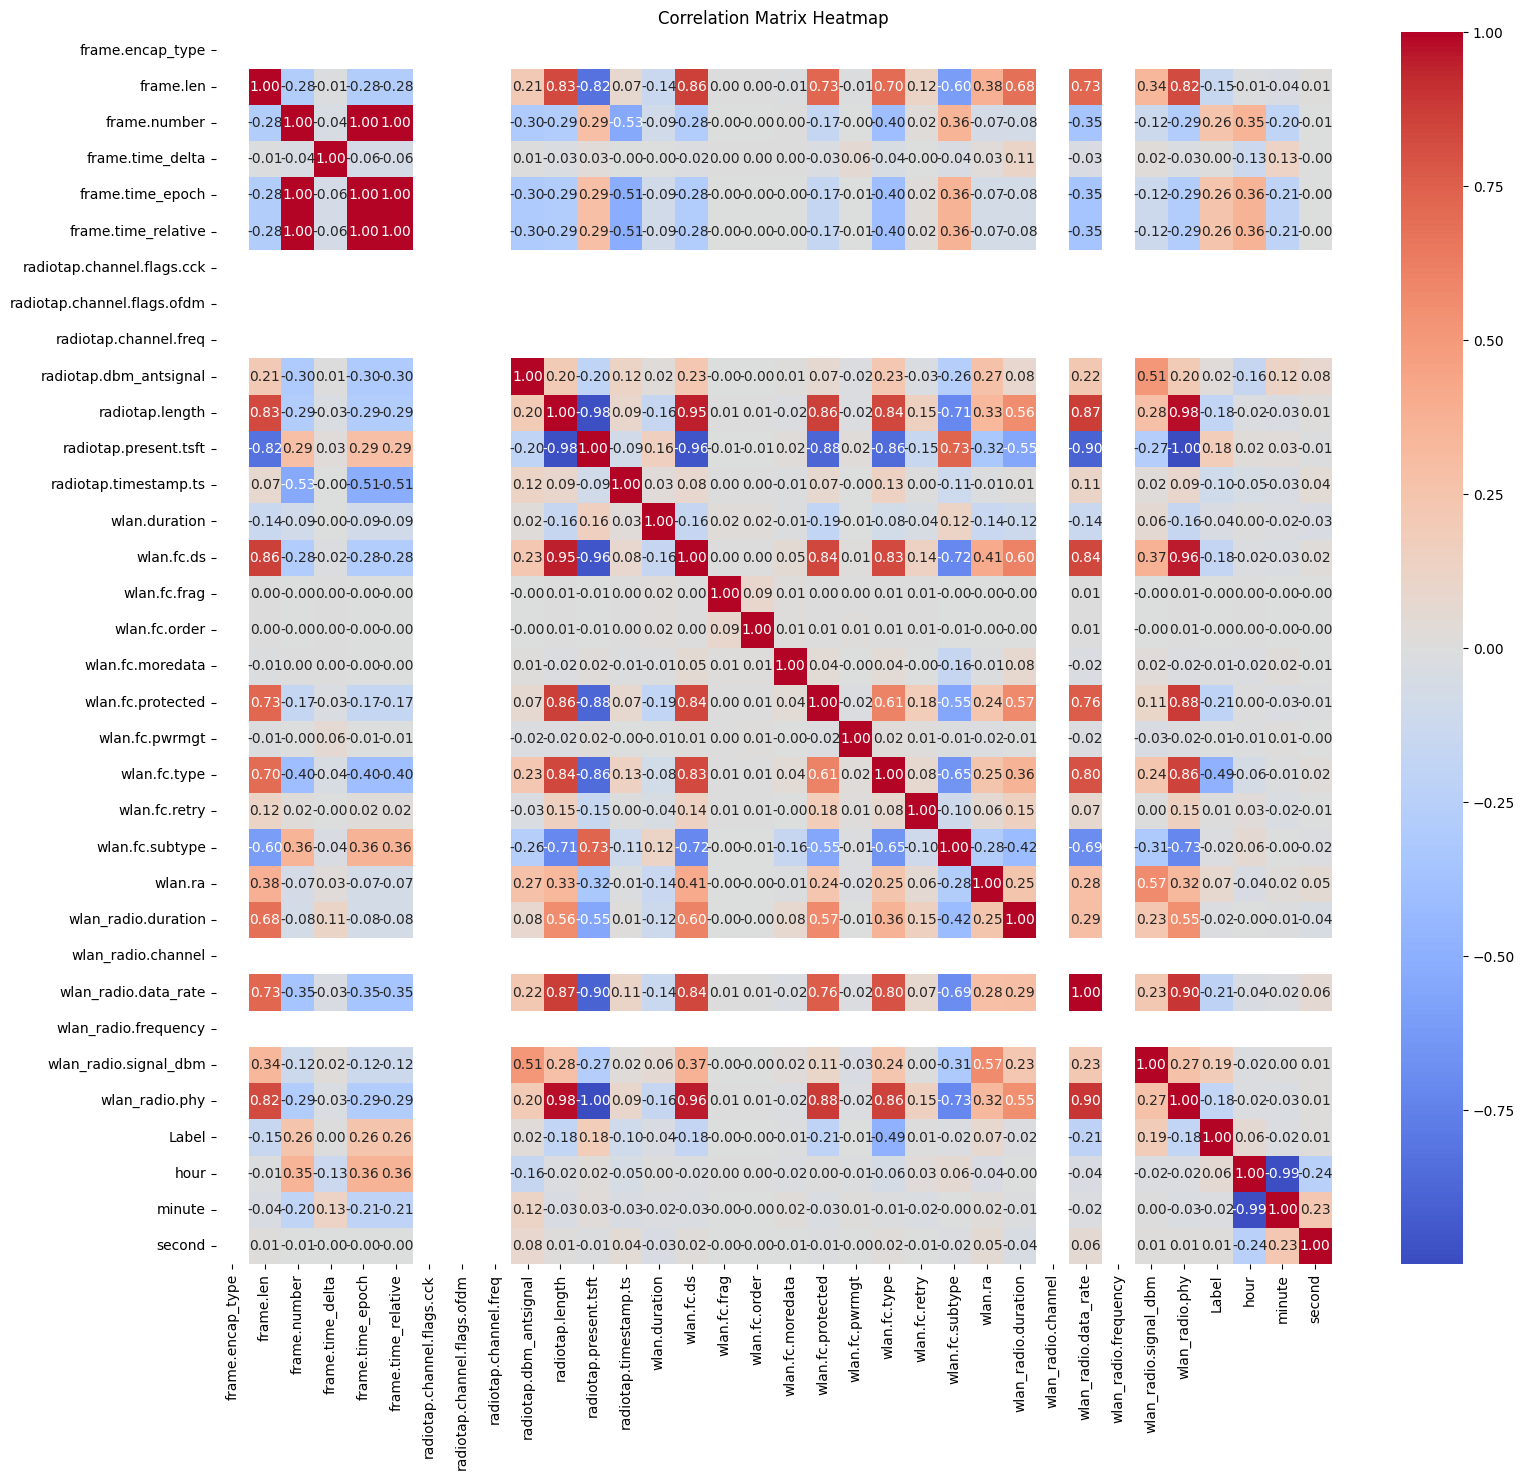

In [167]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix using the standardized data
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# # Show Pearson's Correlation
# df.corr(method ='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [168]:
# Check correlation with the target (Label)
print(df[[ 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.pwrmgt', 'Label']].corr())

                wlan.fc.frag  wlan.fc.order  wlan.fc.pwrmgt     Label
wlan.fc.frag        1.000000       0.087339        0.002877 -0.001136
wlan.fc.order       0.087339       1.000000        0.008028 -0.001251
wlan.fc.pwrmgt      0.002877       0.008028        1.000000 -0.007308
Label              -0.001136      -0.001251       -0.007308  1.000000


In [169]:
# Check correlation with the target (Label)
print(df[['frame.encap_type', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm','radiotap.channel.freq', 'wlan_radio.channel', 'wlan_radio.frequency', 'Label']].corr())

                             frame.encap_type  radiotap.channel.flags.cck  \
frame.encap_type                          NaN                         NaN   
radiotap.channel.flags.cck                NaN                         NaN   
radiotap.channel.flags.ofdm               NaN                         NaN   
radiotap.channel.freq                     NaN                         NaN   
wlan_radio.channel                        NaN                         NaN   
wlan_radio.frequency                      NaN                         NaN   
Label                                     NaN                         NaN   

                             radiotap.channel.flags.ofdm  \
frame.encap_type                                     NaN   
radiotap.channel.flags.cck                           NaN   
radiotap.channel.flags.ofdm                          NaN   
radiotap.channel.freq                                NaN   
wlan_radio.channel                                   NaN   
wlan_radio.frequency   

In [87]:
# Drop features with no variance
# df = df.drop(columns=['frame.encap_type','radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.channel.freq', 'wlan_radio.channel', 'wlan_radio.frequency'])

In [170]:
df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_epoch  frame.time_relative  radiotap.channel.flags.cck  \
0            1.609010e+09           602.281351                           0   
1            1.609010e+09           602.281405                           0   
2            1.609010e+09           602.281686                           0   
3            1.609010e+09           602.282111                           0   
4            1.609010e+09           602.282158                           0   
...                   ...                  ...                         ...   
2900435      1.609009e+09           197.090500                           0   
2900436      1.609009e+09           197.090736                           0   
2900437      1.609009e+09           197.090850                           0   
2900438      1.609009e+09           197.090895                           0   
2900439      1.609009e+09           197.091086                           0   

         radiotap.channel.flags.ofdm  radiotap.channel.freq  \
0                                  1                   5180   
1                                  1                   5180   
2                                  1                   5180   
3                                  1                   5180   
4                                  1                   5180   
...                              ...                    ...   
2900435                            1                   5180   
2900436                            1                   5180   
2900437                            1                   5180   
2900438                            1                   5180   
2900439                            1                   5180   

         radiotap.dbm_antsignal  ...  wlan_radio.duration wlan_radio.channel  \
0                    -83.000000  ...                  400                 36   
1                   -194.000000  ...                   44                 36   
2                    -98.000000  ...                   32                 36   
3                    -98.000000  ...                   28                 36   
4                   -218.000000  ...                   28                 36   
...                         ...  ...                  ...                ...   
2900435               63.666667  ...                   28                 36   
2900436               63.666667  ...                   32                 36   
2900437               37.000000  ...                   28                 36   
2900438               63.666667  ...                   28                 36   
2900439               63.666667  ...                   32                 36   

         wlan_radio.data_rate  wlan_radio.frequency  wlan_radio.signal_dbm  \
0                         6.0                  5180                    -27   
1                         6.0                  5180                    -68   
2                        24.0                  5180                    -32   
3                        24.0                  5180                    -32   
4                        24.0                  5180                    -70   
...                  

In [171]:
# Verify the column has been removed
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag',
       'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype',
       'wlan.ra', 'wlan_radio.duration', 'wlan_radio.channel',
       'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm',
       'wlan_radio.phy', 'Label', 'hour', 'minute', 'second'],
      dtype='object')


In [155]:
# import pandas as pd

# Assuming 'data' is your DataFrame
# df.to_csv('cleaned_Dataset.csv', index=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900440 entries, 0 to 2900439
Data columns (total 34 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   frame.encap_type             int64   
 1   frame.len                    int64   
 2   frame.number                 int64   
 3   frame.time_delta             float64 
 4   frame.time_epoch             float64 
 5   frame.time_relative          float64 
 6   radiotap.channel.flags.cck   int64   
 7   radiotap.channel.flags.ofdm  int64   
 8   radiotap.channel.freq        int64   
 9   radiotap.dbm_antsignal       float64 
 10  radiotap.length              int64   
 11  radiotap.present.tsft        category
 12  radiotap.timestamp.ts        int64   
 13  wlan.duration                float64 
 14  wlan.fc.ds                   int64   
 15  wlan.fc.frag                 int64   
 16  wlan.fc.order                int64   
 17  wlan.fc.moredata             int64   
 18  wlan.fc.protected     

## 2.1 Data Distribution

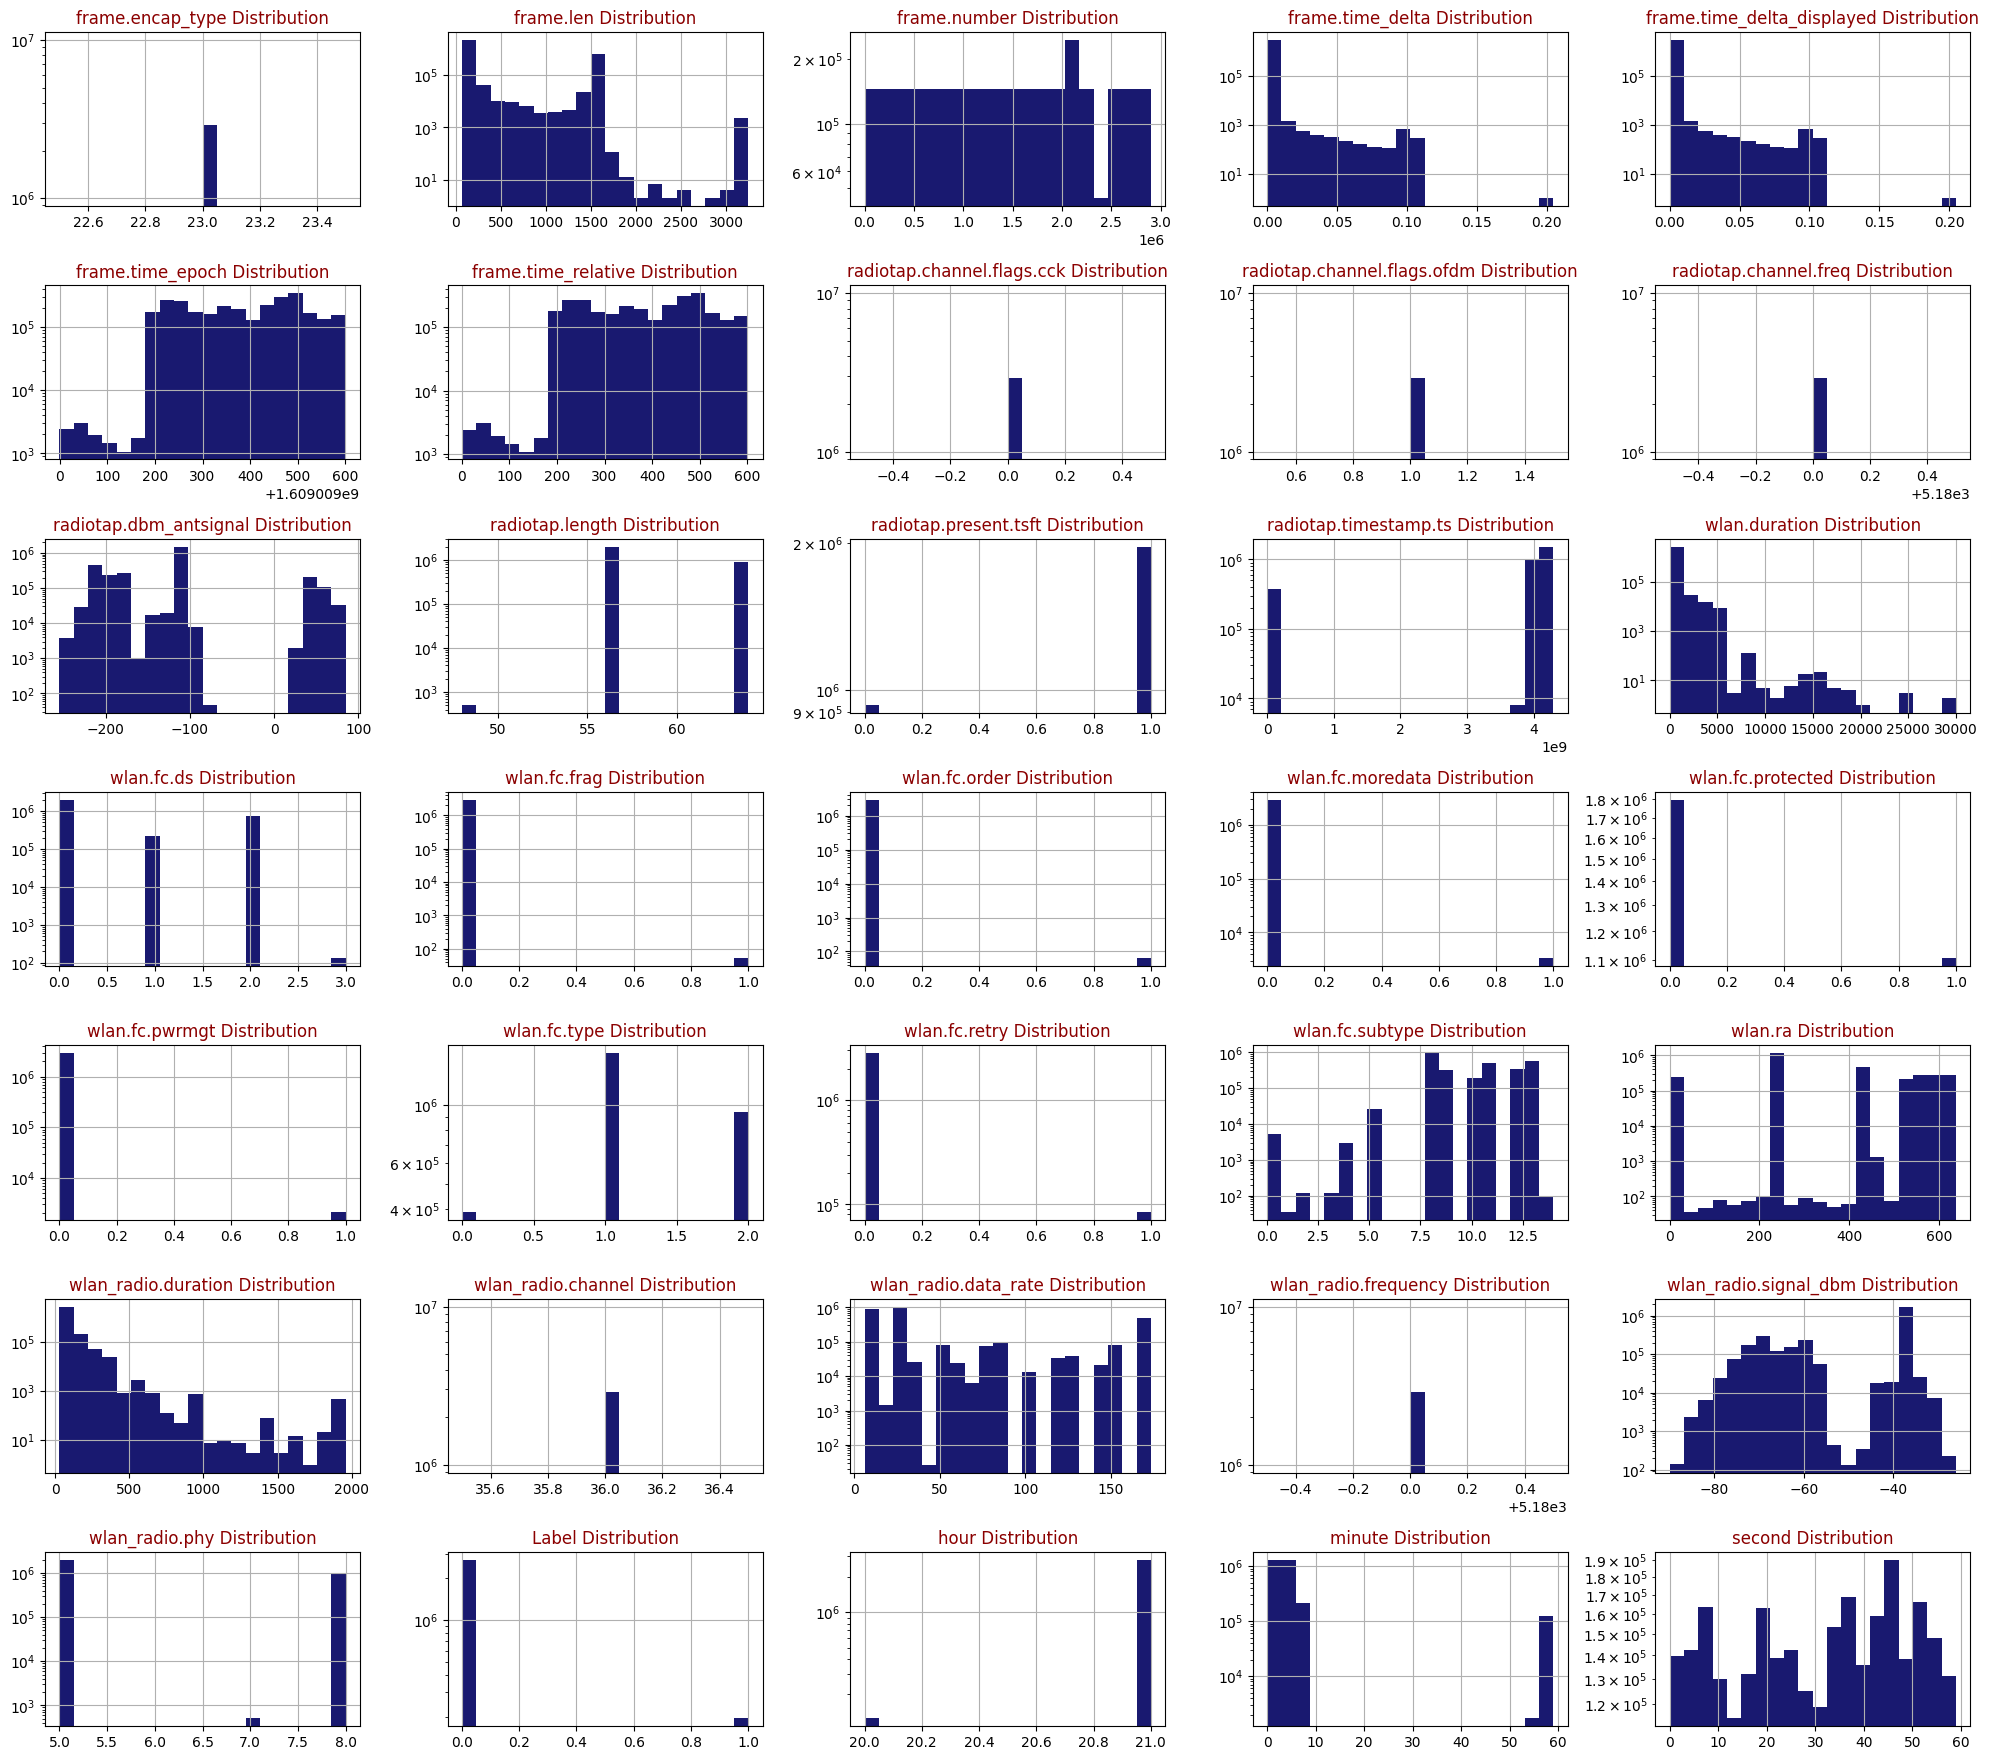

In [95]:
import matplotlib.pyplot as plt
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,8,5)

## 2.2 Plot Relationships for All Features

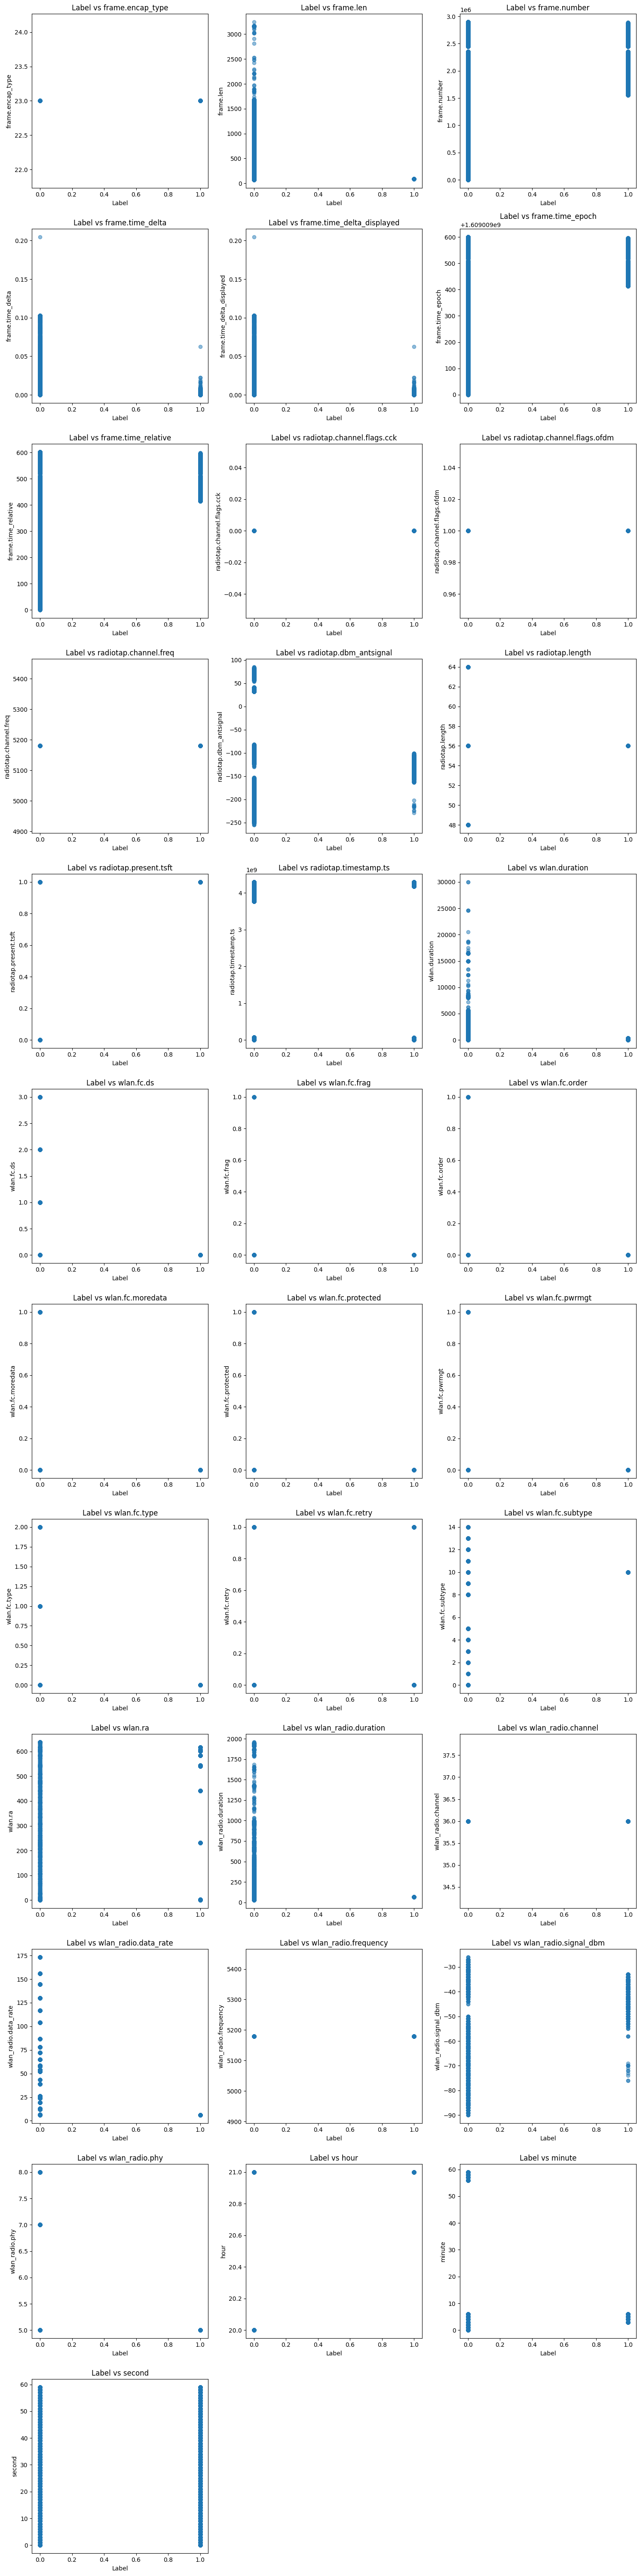

In [96]:
import matplotlib.pyplot as plt
import math

target_column = 'Label'

# Exclude the target column itself
feature_columns = [col for col in df.columns if col != target_column]

# Set the number of rows and columns for the grid
num_features = len(feature_columns)
num_cols = 3  # You can adjust this to have more or fewer columns
num_rows = math.ceil(num_features / num_cols)

# Create the figure and axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust figure size based on number of rows
axs = axs.flatten()  # Flatten the axes array to iterate over it easily

# Loop through each feature and plot the scatter plot in the corresponding subplot
for i, column in enumerate(feature_columns):
    axs[i].scatter(df[target_column], df[column], alpha=0.5)
    axs[i].set_title(f'{target_column} vs {column}')
    axs[i].set_xlabel(target_column)
    axs[i].set_ylabel(column)

# Hide any unused subplots
for i in range(len(feature_columns), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()



## 2.3 Visualize Signal Strength Distribution

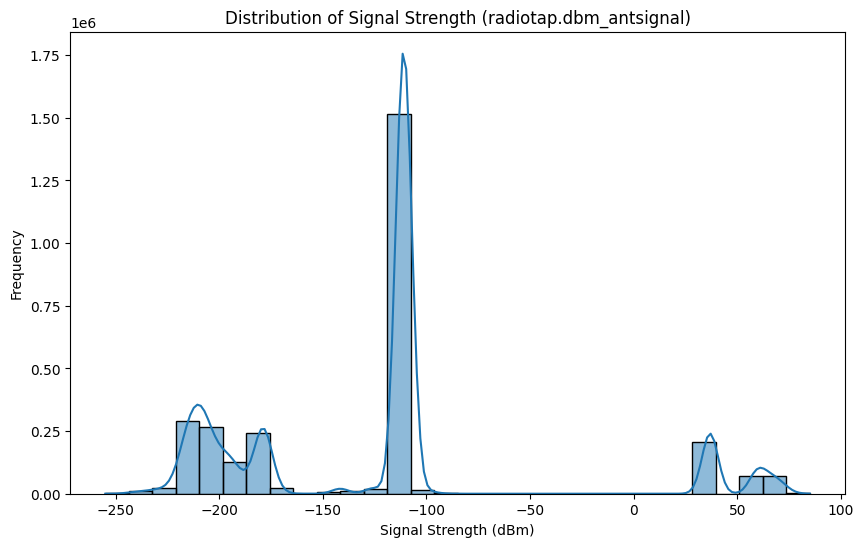

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of signal strength
plt.figure(figsize=(10, 6))
sns.histplot(df['radiotap.dbm_antsignal'], bins=30, kde=True)
plt.title("Distribution of Signal Strength (radiotap.dbm_antsignal)")
plt.xlabel("Signal Strength (dBm)")
plt.ylabel("Frequency")
plt.show()


## 2.4 Correlation Analysis
We can perform a correlation analysis to see how features like signal strength, frame length, and data rate are correlated.

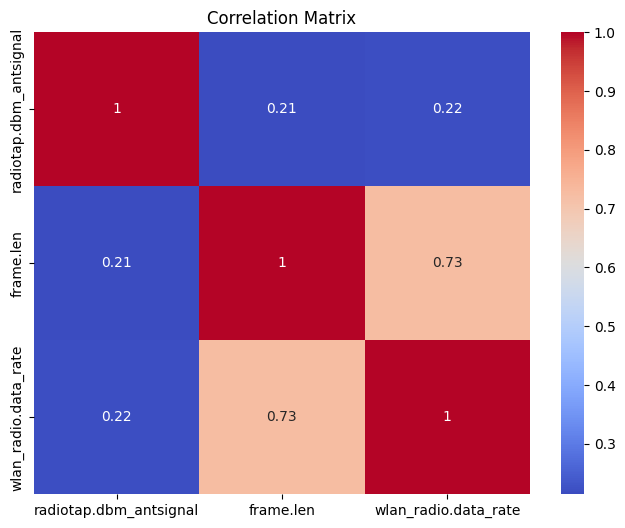

In [98]:
# Compute the correlation matrix
correlation_matrix = df[['radiotap.dbm_antsignal', 'frame.len', 'wlan_radio.data_rate']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 2.5 Pearson's Distance Correlation with Target Feature

In [173]:
corr_mat = df.corr()
corr_mat['Label'].sort_values(ascending=False)

Label                          1.000000
frame.time_relative            0.256489
frame.time_epoch               0.256481
frame.number                   0.255643
wlan_radio.signal_dbm          0.190254
radiotap.present.tsft          0.184540
wlan.ra                        0.074870
hour                           0.056965
radiotap.dbm_antsignal         0.024794
second                         0.009709
wlan.fc.retry                  0.007779
frame.time_delta               0.004841
wlan.fc.frag                  -0.001136
wlan.fc.order                 -0.001251
wlan.fc.pwrmgt                -0.007308
wlan.fc.moredata              -0.009064
minute                        -0.016029
wlan_radio.duration           -0.020456
wlan.fc.subtype               -0.023179
wlan.duration                 -0.037979
radiotap.timestamp.ts         -0.099204
frame.len                     -0.149516
wlan.fc.ds                    -0.178535
radiotap.length               -0.181282
wlan_radio.phy                -0.184532


## 2.6 Target Feature Description

count    2.900440e+06
mean     6.715809e-02
std      2.502956e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Label, dtype: float64


/tmp/ipykernel_1110/2429508993.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Label'], color='g', bins=100, hist_kws={'alpha': 0.4});


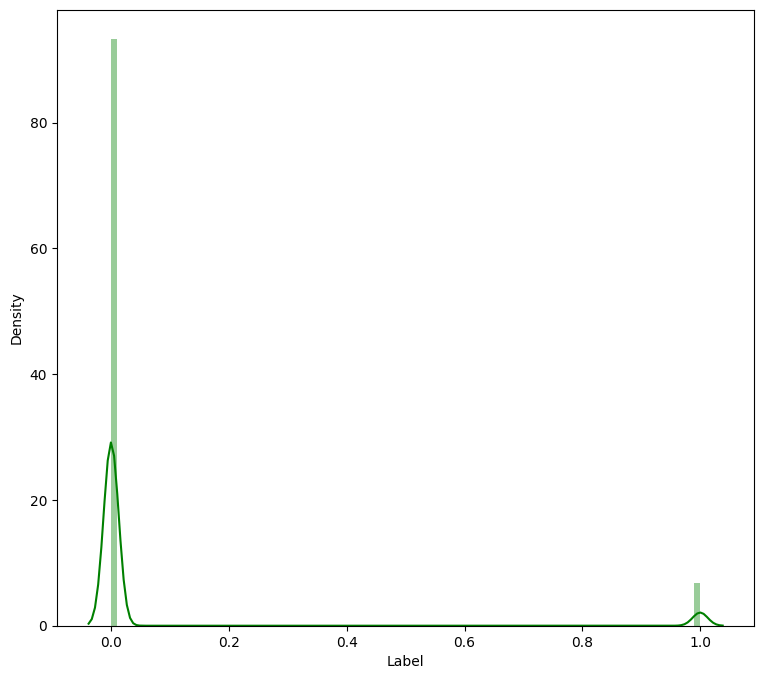

In [163]:
print(df['Label'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Label'], color='g', bins=100, hist_kws={'alpha': 0.4});

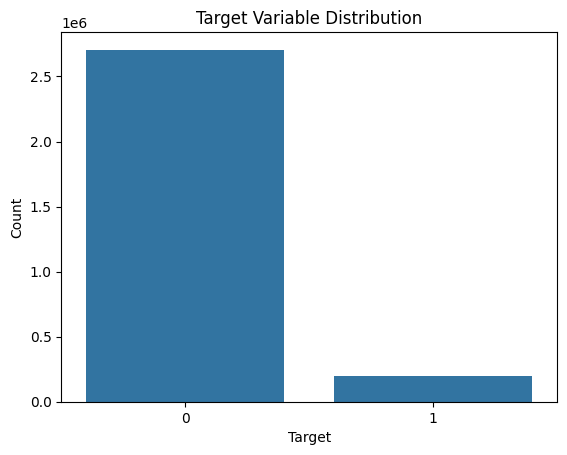

In [174]:
# Distribution of the target variable
sns.countplot(x='Label', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## 2.7 Visualize numeric data with box plot

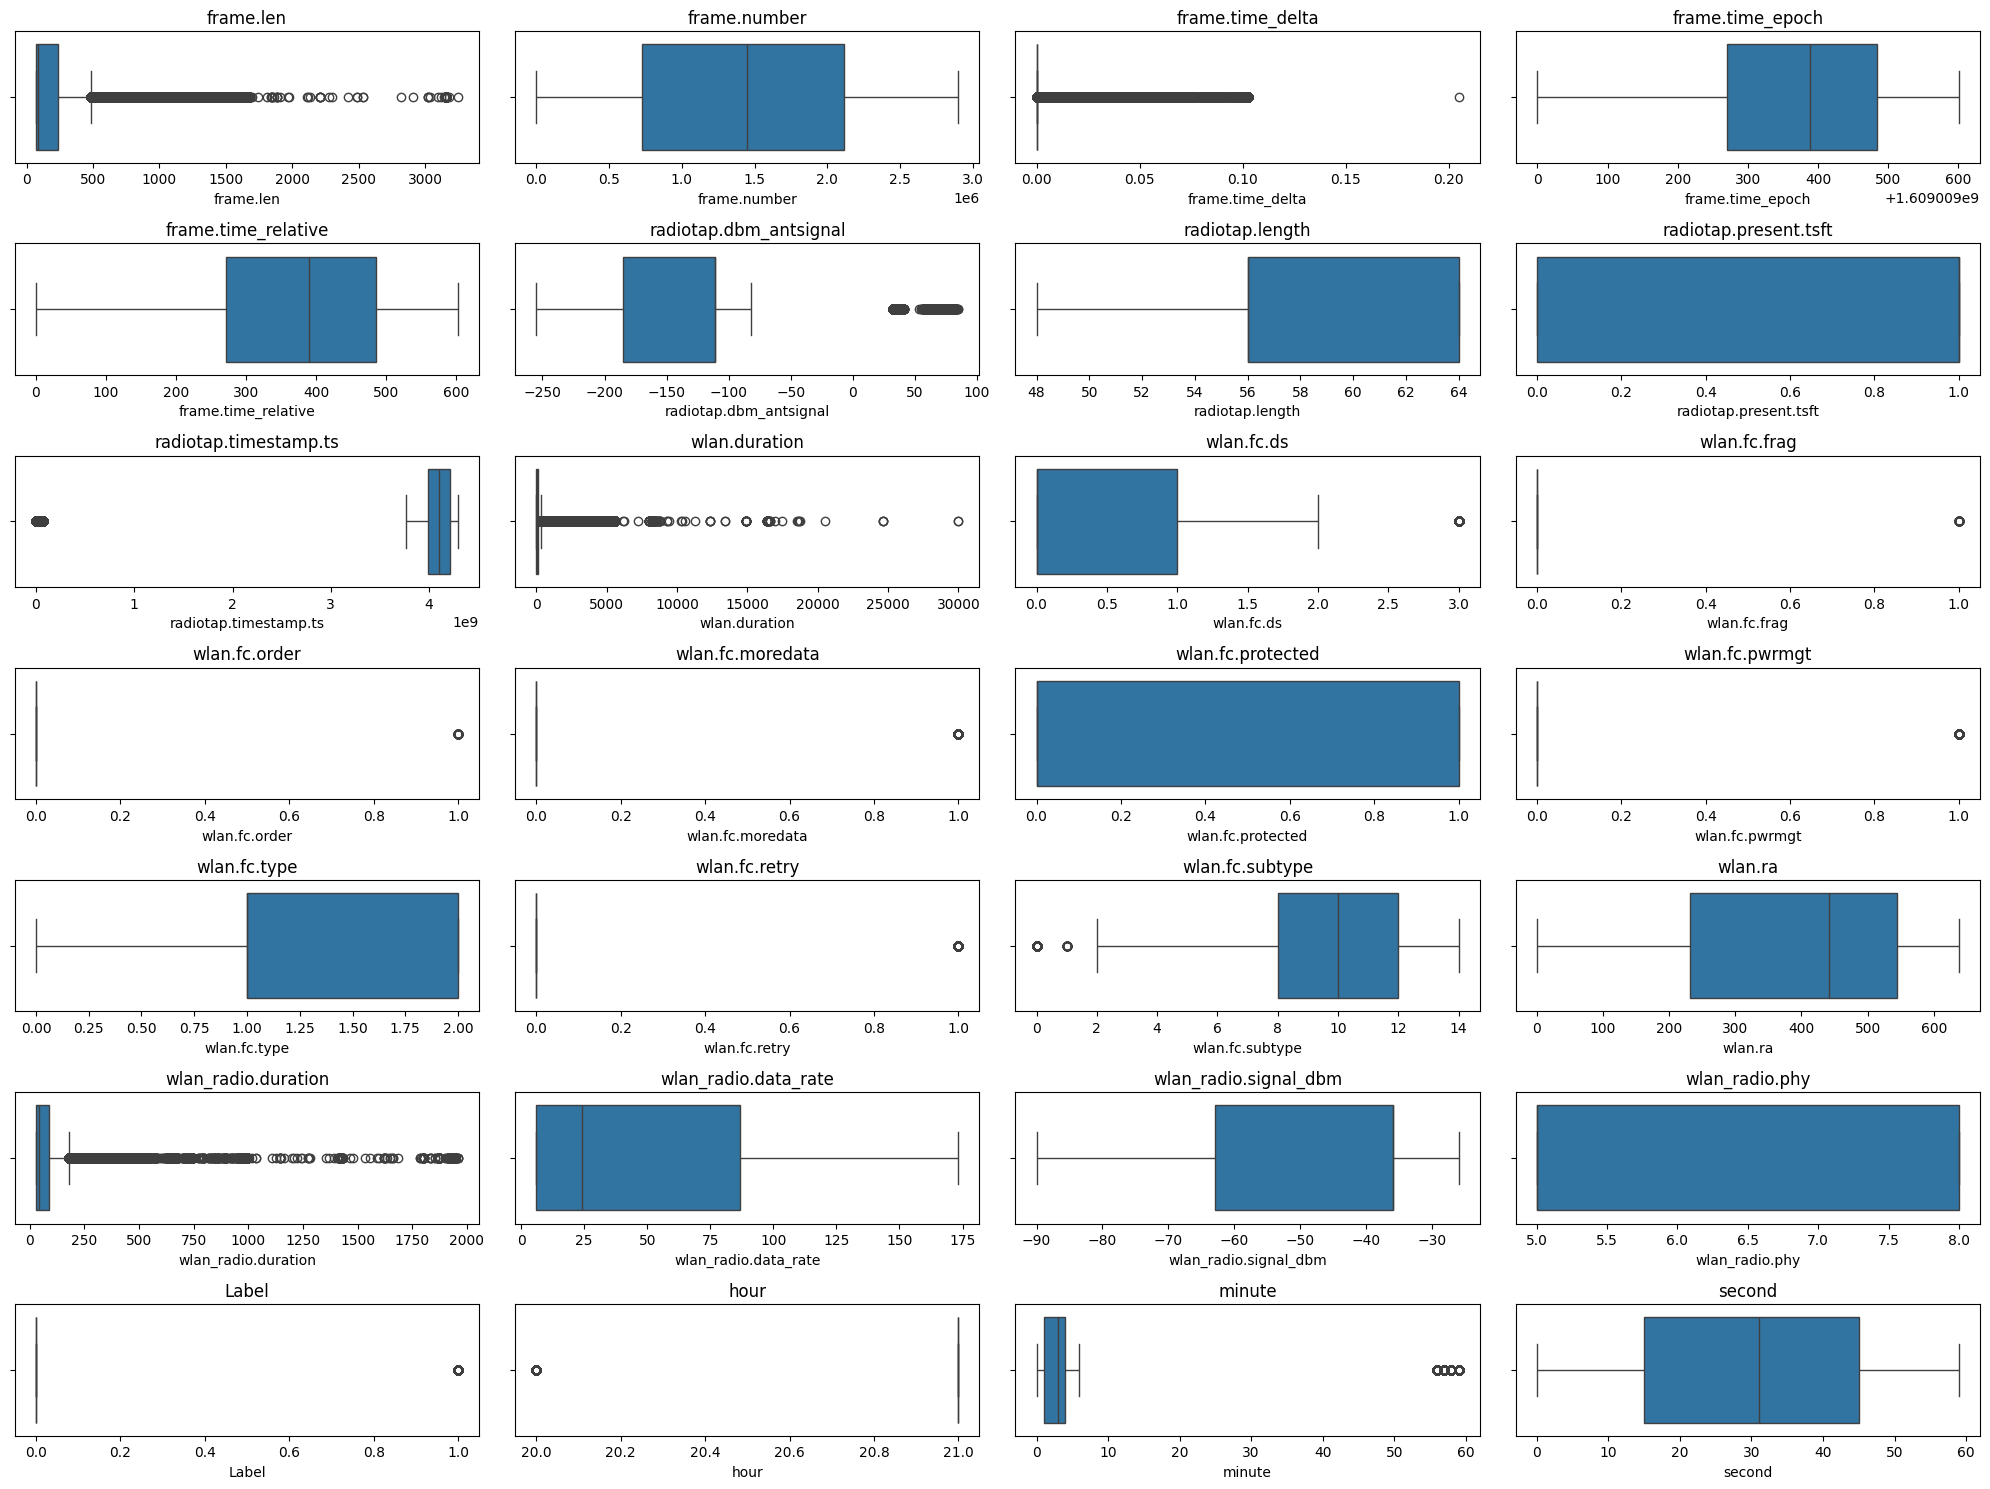

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe 'df' has the 28 columns for which you want boxplots
columns = df.columns  # Get all column names

# Number of columns you want in plot grid
n_rows = 7  
n_cols = 4  

# Create the subplots: a grid of n_rows x n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and its corresponding axis for plotting
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i], orient="h")  # Horizontal boxplot for each column
    axes[i].set_title(col)  # Set the title as the column name

# Hide any empty subplots (in case the number of plots is less than the grid size)
for i in range(len(columns), len(axes)):
    axes[i].set_visible(False)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### Box plot for a continuous feature

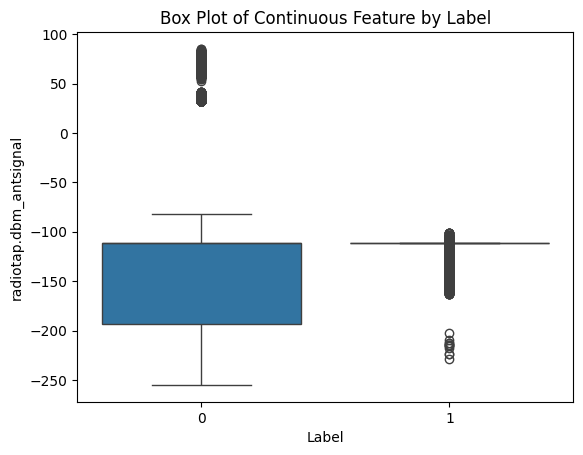

In [175]:
# Box plot for a continuous feature
sns.boxplot(x='Label', y='radiotap.dbm_antsignal', data=df)  # replace with your column names
plt.title('Box Plot of Continuous Feature by Label')
plt.show()


In [176]:
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag',
       'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype',
       'wlan.ra', 'wlan_radio.duration', 'wlan_radio.channel',
       'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm',
       'wlan_radio.phy', 'Label', 'hour', 'minute', 'second'],
      dtype='object')


In [177]:
cleaned_df = df.copy()

In [182]:
cleaned_df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_epoch  frame.time_relative  radiotap.channel.flags.cck  \
0            1.609010e+09           602.281351                           0   
1            1.609010e+09           602.281405                           0   
2            1.609010e+09           602.281686                           0   
3            1.609010e+09           602.282111                           0   
4            1.609010e+09           602.282158                           0   
...                   ...                  ...                         ...   
2900435      1.609009e+09           197.090500                           0   
2900436      1.609009e+09           197.090736                           0   
2900437      1.609009e+09           197.090850                           0   
2900438      1.609009e+09           197.090895                           0   
2900439      1.609009e+09           197.091086                           0   

         radiotap.channel.flags.ofdm  radiotap.channel.freq  \
0                                  1                   5180   
1                                  1                   5180   
2                                  1                   5180   
3                                  1                   5180   
4                                  1                   5180   
...                              ...                    ...   
2900435                            1                   5180   
2900436                            1                   5180   
2900437                            1                   5180   
2900438                            1                   5180   
2900439                            1                   5180   

         radiotap.dbm_antsignal  ...  wlan_radio.duration wlan_radio.channel  \
0                    -83.000000  ...                  400                 36   
1                   -194.000000  ...                   44                 36   
2                    -98.000000  ...                   32                 36   
3                    -98.000000  ...                   28                 36   
4                   -218.000000  ...                   28                 36   
...                         ...  ...                  ...                ...   
2900435               63.666667  ...                   28                 36   
2900436               63.666667  ...                   32                 36   
2900437               37.000000  ...                   28                 36   
2900438               63.666667  ...                   28                 36   
2900439               63.666667  ...                   32                 36   

         wlan_radio.data_rate  wlan_radio.frequency  wlan_radio.signal_dbm  \
0                         6.0                  5180                    -27   
1                         6.0                  5180                    -68   
2                        24.0                  5180                    -32   
3                        24.0                  5180                    -32   
4                        24.0                  5180                    -70   
...                  

In [191]:
print(cleaned_df.dtypes)

frame.encap_type                  int64
frame.len                         int64
frame.number                      int64
frame.time_delta                float64
frame.time_epoch                float64
frame.time_relative             float64
radiotap.channel.flags.cck        int64
radiotap.channel.flags.ofdm       int64
radiotap.channel.freq             int64
radiotap.dbm_antsignal          float64
radiotap.length                   int64
radiotap.present.tsft          category
radiotap.timestamp.ts             int64
wlan.duration                   float64
wlan.fc.ds                        int64
wlan.fc.frag                      int64
wlan.fc.order                     int64
wlan.fc.moredata                  int64
wlan.fc.protected                 int64
wlan.fc.pwrmgt                    int64
wlan.fc.type                      int64
wlan.fc.retry                     int64
wlan.fc.subtype                   int64
wlan.ra                           int64
wlan_radio.duration               int64


In [183]:
print(df['radiotap.present.tsft'])

0          1
1          1
2          1
3          1
4          1
          ..
2900435    1
2900436    1
2900437    1
2900438    1
2900439    1
Name: radiotap.present.tsft, Length: 2900440, dtype: category
Categories (2, int64): [0, 1]


In [190]:
# List of columns that should be categorical
categorical_columns = ['wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.pwrmgt']

# Convert these columns to 'category' dtype
df[categorical_columns] = df[categorical_columns].astype('category')

# Verify that the columns have been converted
print(df.dtypes)


frame.encap_type                  int64
frame.len                         int64
frame.number                      int64
frame.time_delta                float64
frame.time_epoch                float64
frame.time_relative             float64
radiotap.channel.flags.cck        int64
radiotap.channel.flags.ofdm       int64
radiotap.channel.freq             int64
radiotap.dbm_antsignal          float64
radiotap.length                   int64
radiotap.present.tsft          category
radiotap.timestamp.ts             int64
wlan.duration                   float64
wlan.fc.ds                        int64
wlan.fc.frag                   category
wlan.fc.order                  category
wlan.fc.moredata                  int64
wlan.fc.protected                 int64
wlan.fc.pwrmgt                 category
wlan.fc.type                      int64
wlan.fc.retry                     int64
wlan.fc.subtype                   int64
wlan.ra                           int64
wlan_radio.duration               int64


### Count Plot for Categorical Features

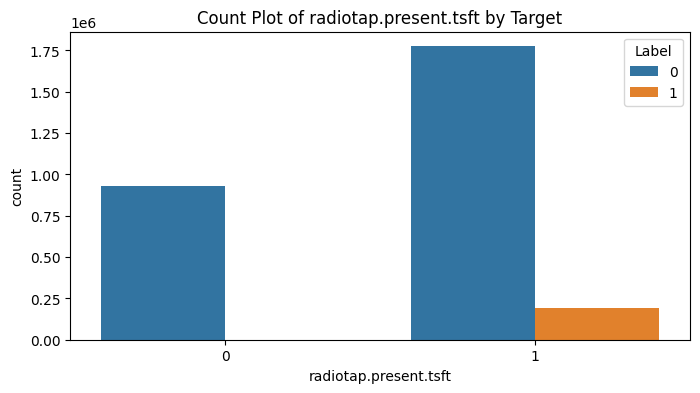

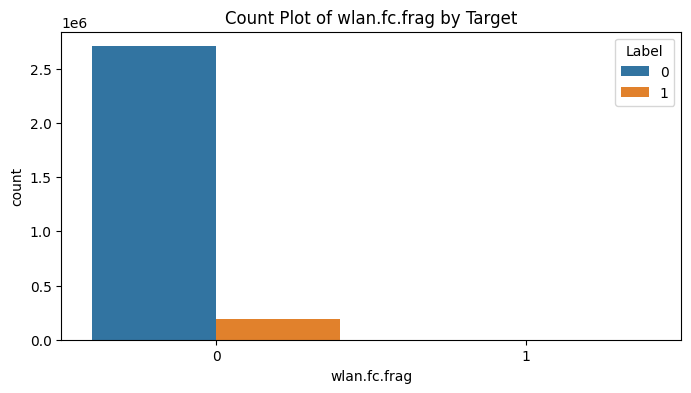

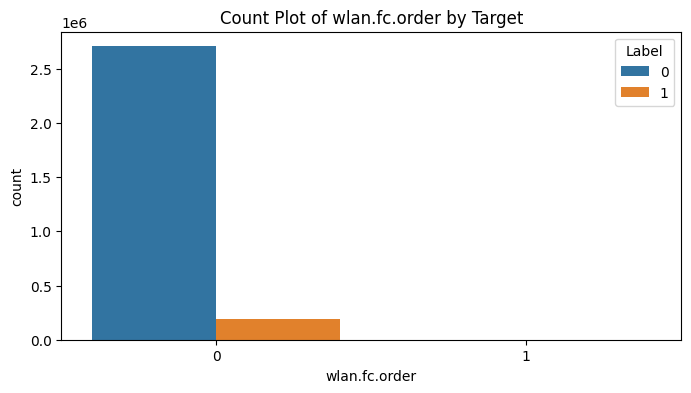

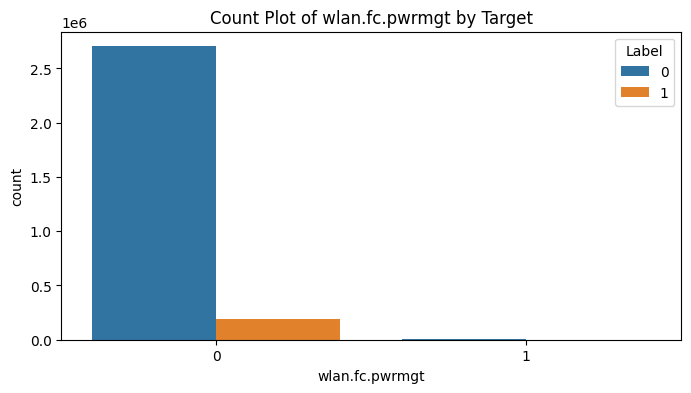

In [192]:
# List of categorical columns you want to plot
categorical_columns = ['radiotap.present.tsft','wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.pwrmgt']  # Replace with your actual categorical columns

# Loop through the categorical columns and create a count plot for each
for feature in categorical_columns:
    plt.figure(figsize=(8, 4))  # Adjust size if needed
    sns.countplot(x=feature, hue='Label', data=df)  # Replace 'Label' with your target column
    plt.title(f'Count Plot of {feature} by Target')
    plt.show()


# Step 3: Feature Engineering

In [194]:
# import pandas as pd

# Assuming '' is your DataFrame
# df = pd.read_csv('cleaned_Dataset.csv')

In [195]:
df = df.copy()
df

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
2900435                23         70         99996          0.000046   
2900436                23         88         99997          0.000236   
2900437                23         76         99998          0.000114   
2900438                23         70         99999          0.000045   
2900439                23         88        100000          0.000191   

         frame.time_epoch  frame.time_relative  radiotap.channel.flags.cck  \
0            1.609010e+09           602.281351                           0   
1            1.609010e+09           602.281405                           0   
2            1.609010e+09           602.281686                           0   
3            1.609010e+09           602.282111                           0   
4            1.609010e+09           602.282158                           0   
...                   ...                  ...                         ...   
2900435      1.609009e+09           197.090500                           0   
2900436      1.609009e+09           197.090736                           0   
2900437      1.609009e+09           197.090850                           0   
2900438      1.609009e+09           197.090895                           0   
2900439      1.609009e+09           197.091086                           0   

         radiotap.channel.flags.ofdm  radiotap.channel.freq  \
0                                  1                   5180   
1                                  1                   5180   
2                                  1                   5180   
3                                  1                   5180   
4                                  1                   5180   
...                              ...                    ...   
2900435                            1                   5180   
2900436                            1                   5180   
2900437                            1                   5180   
2900438                            1                   5180   
2900439                            1                   5180   

         radiotap.dbm_antsignal  ...  wlan_radio.duration wlan_radio.channel  \
0                    -83.000000  ...                  400                 36   
1                   -194.000000  ...                   44                 36   
2                    -98.000000  ...                   32                 36   
3                    -98.000000  ...                   28                 36   
4                   -218.000000  ...                   28                 36   
...                         ...  ...                  ...                ...   
2900435               63.666667  ...                   28                 36   
2900436               63.666667  ...                   32                 36   
2900437               37.000000  ...                   28                 36   
2900438               63.666667  ...                   28                 36   
2900439               63.666667  ...                   32                 36   

         wlan_radio.data_rate  wlan_radio.frequency  wlan_radio.signal_dbm  \
0                         6.0                  5180                    -27   
1                         6.0                  5180                    -68   
2                        24.0                  5180                    -32   
3                        24.0                  5180                    -32   
4                        24.0                  5180                    -70   
...                  

In [196]:
# df = df.drop(columns=['Unnamed: 0'])
# df

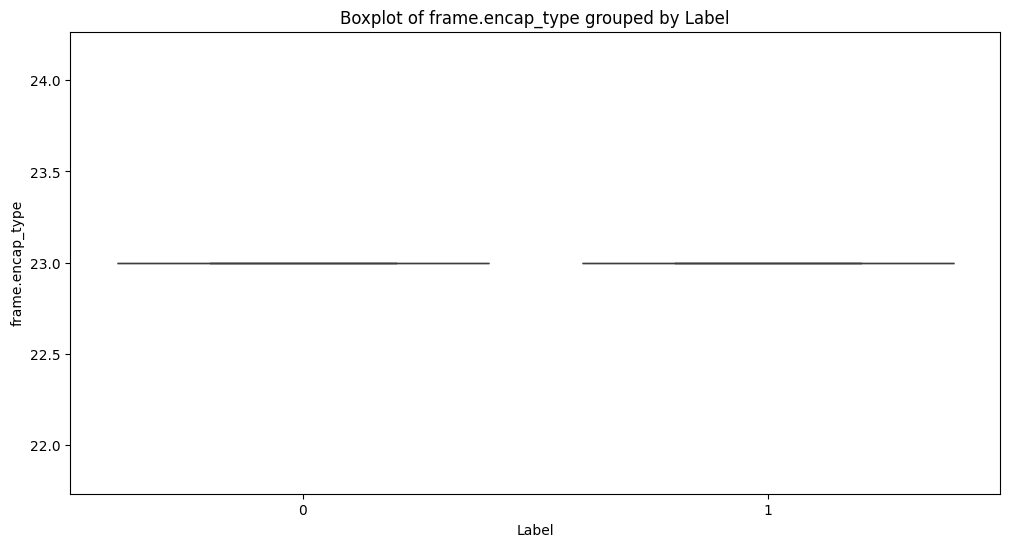

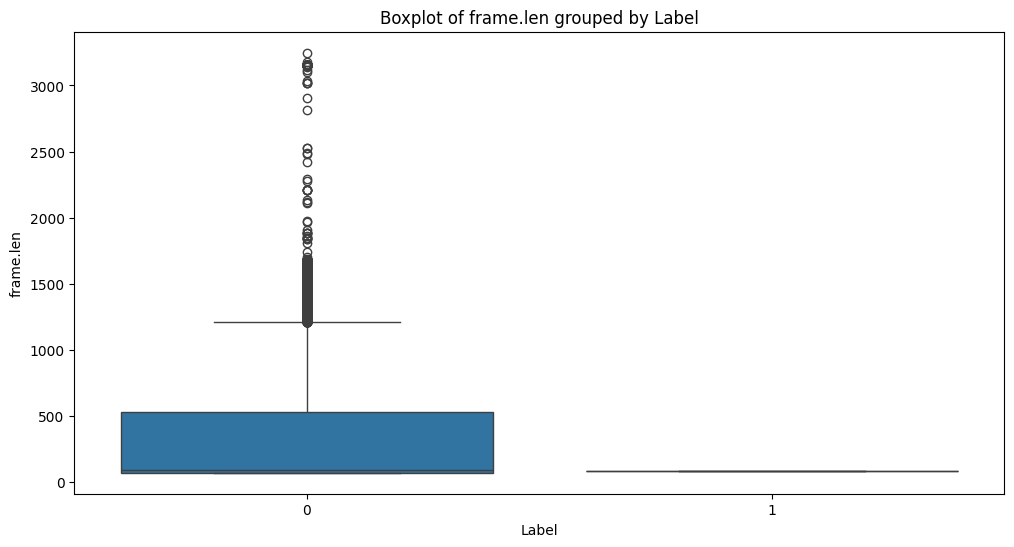

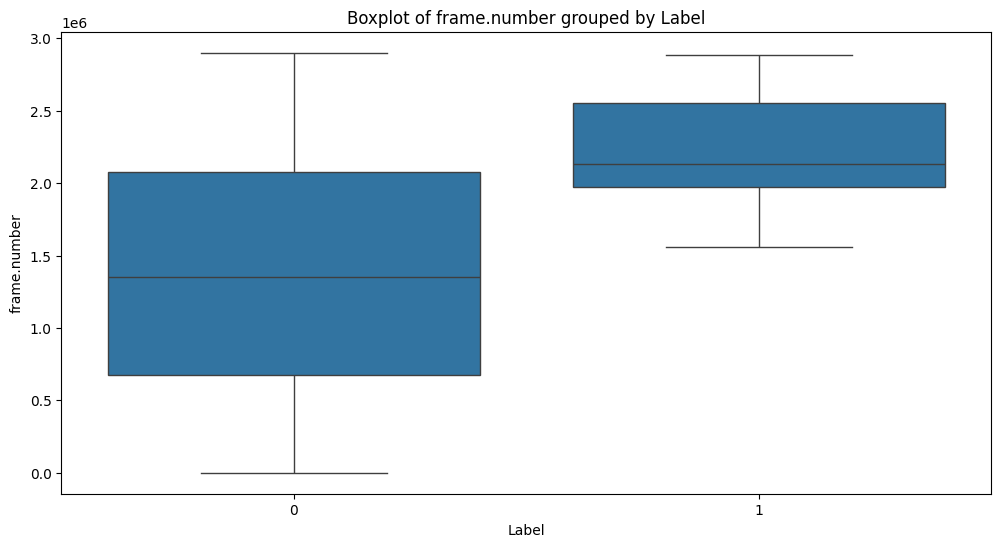

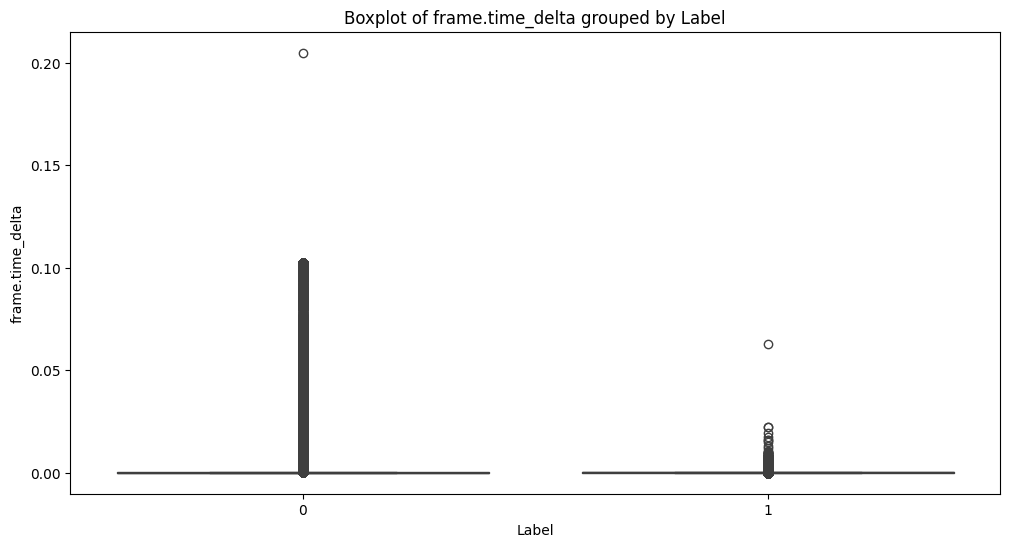

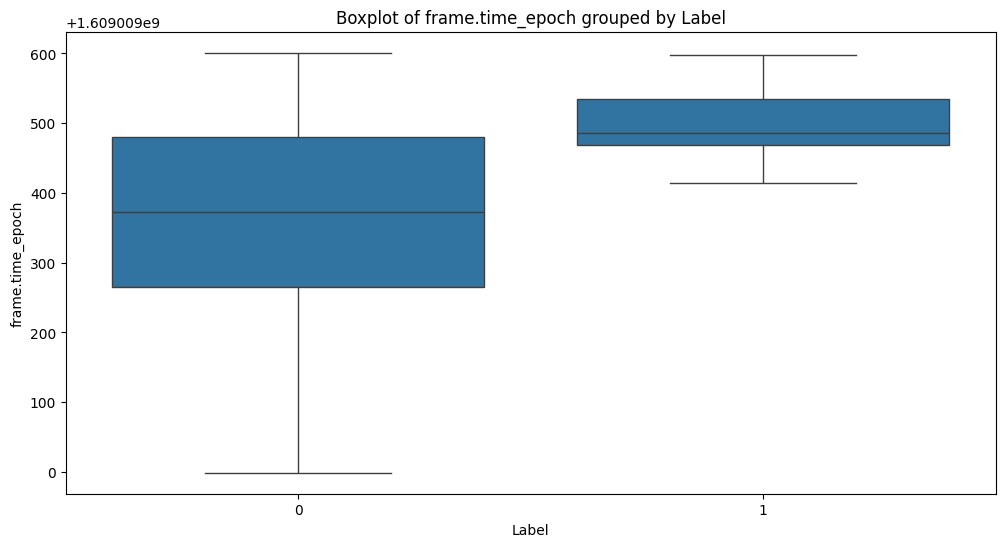

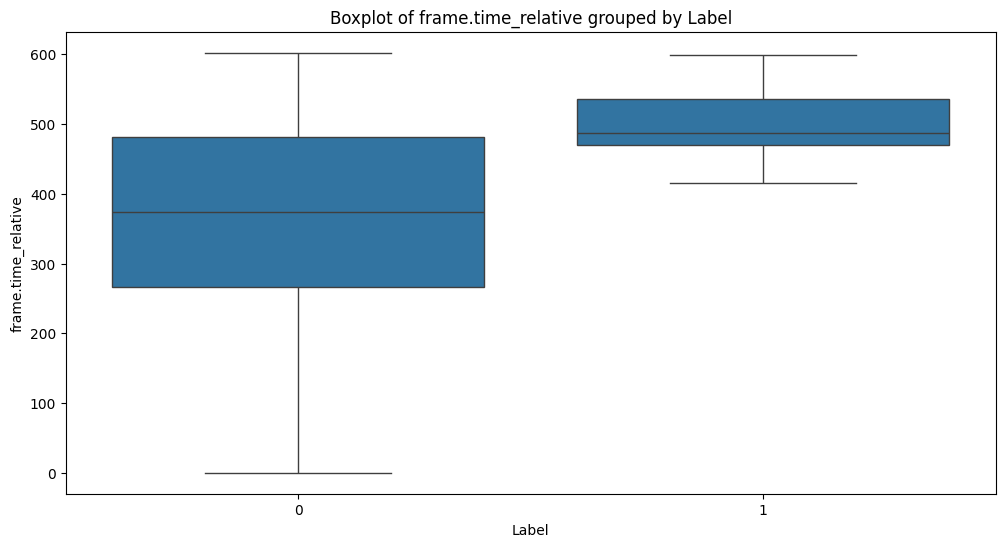

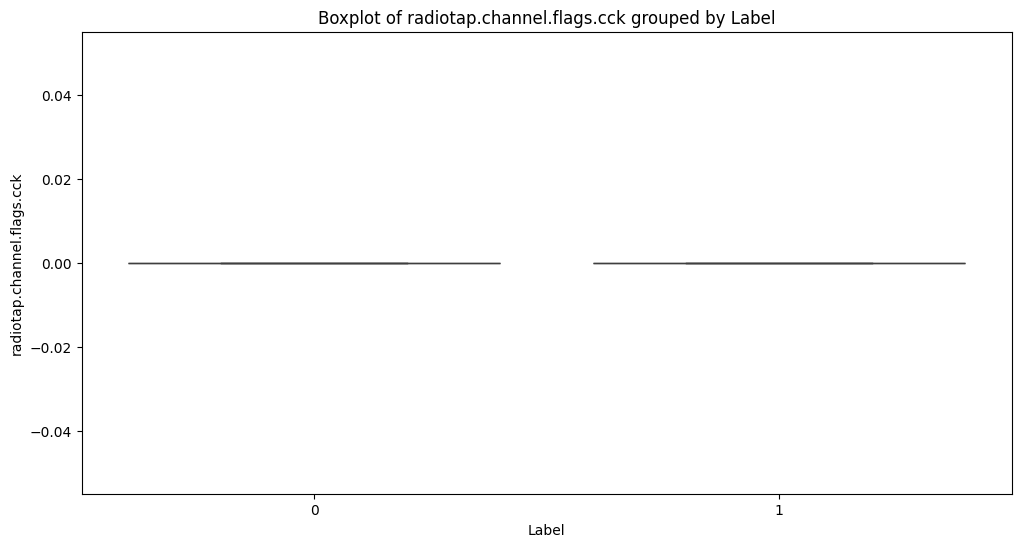

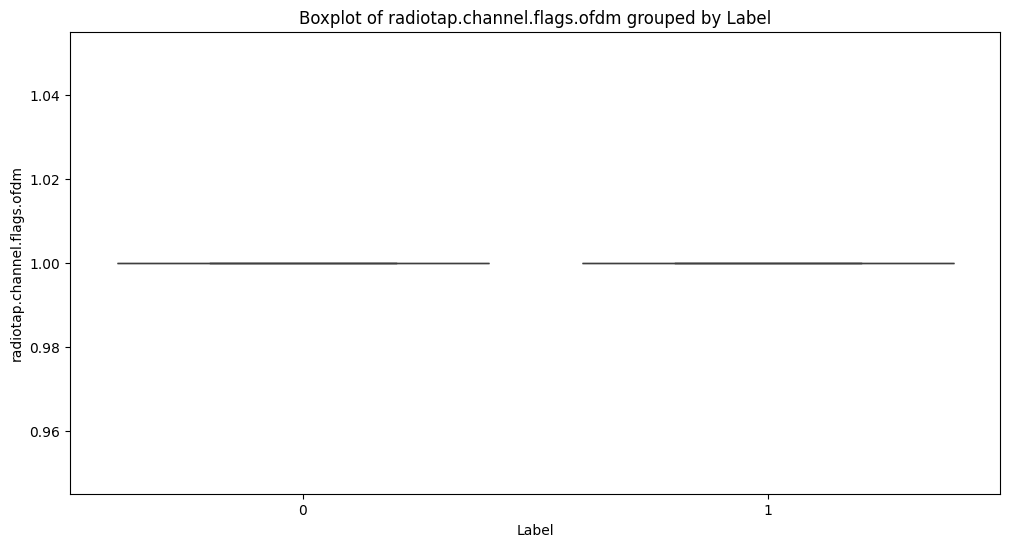

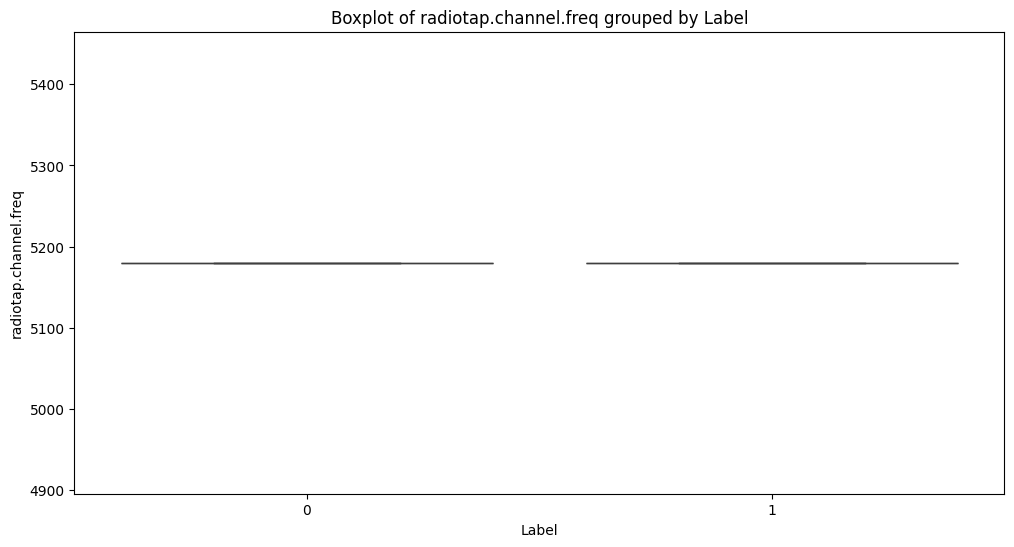

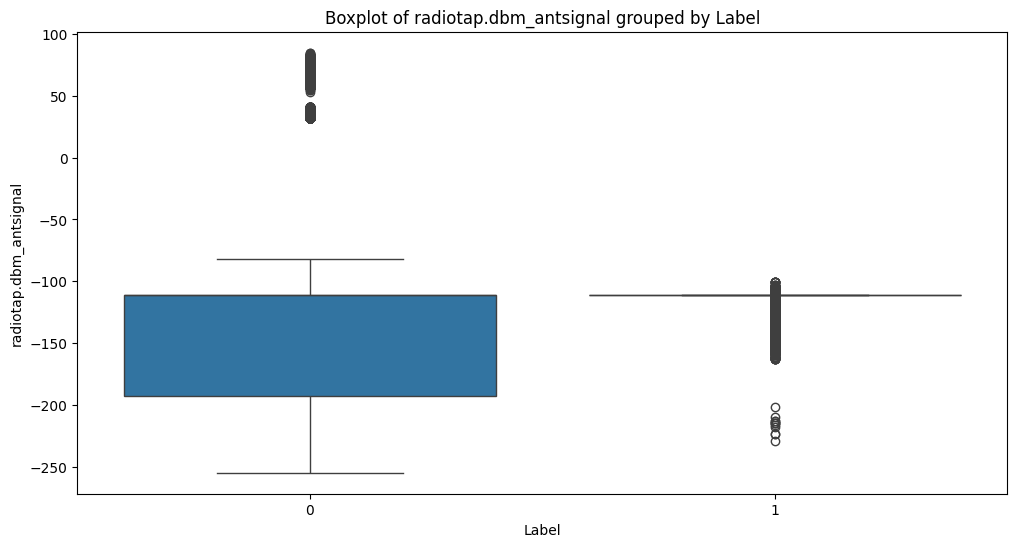

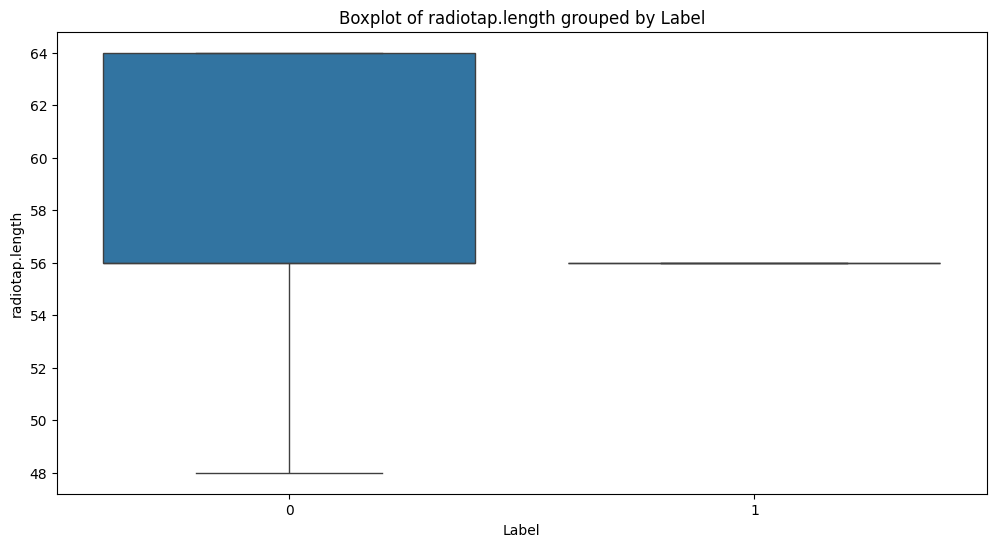

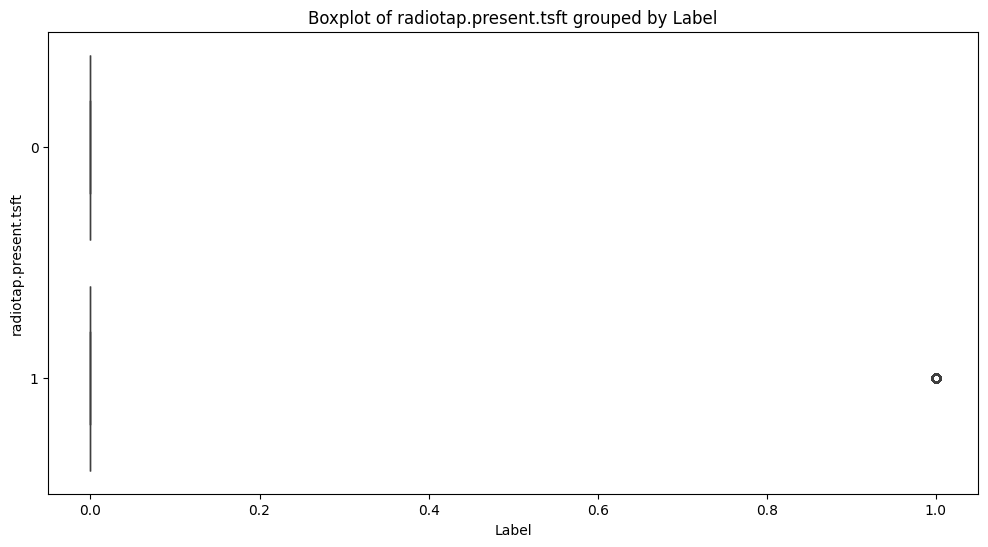

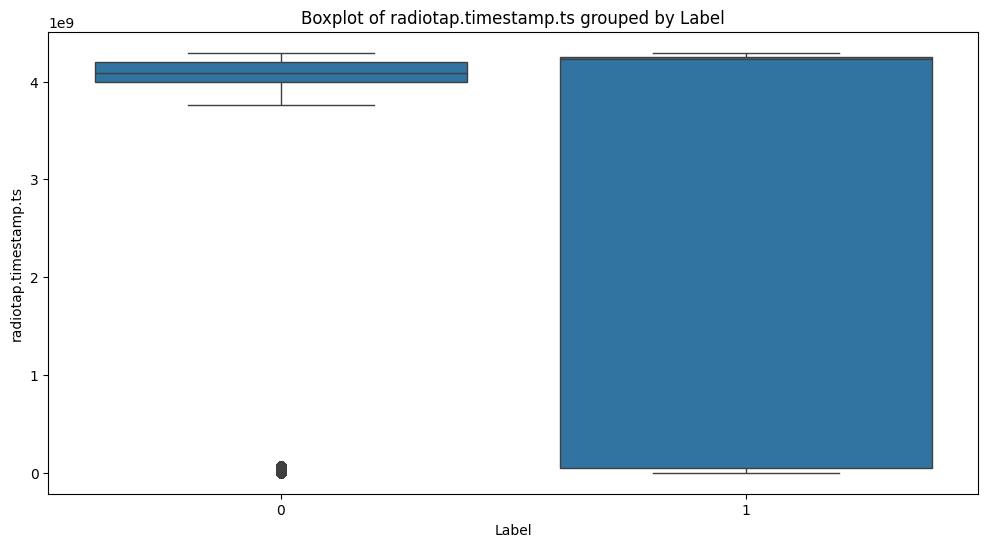

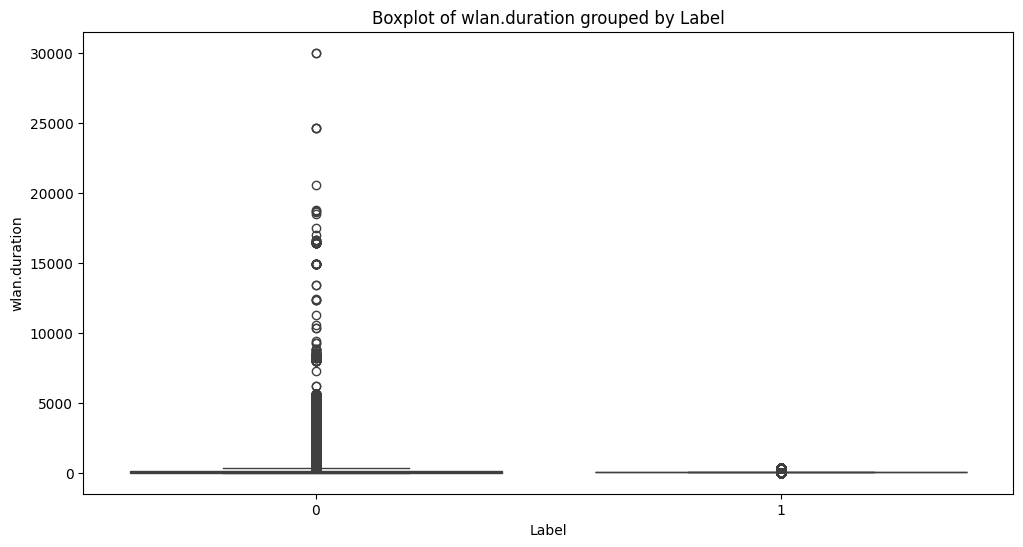

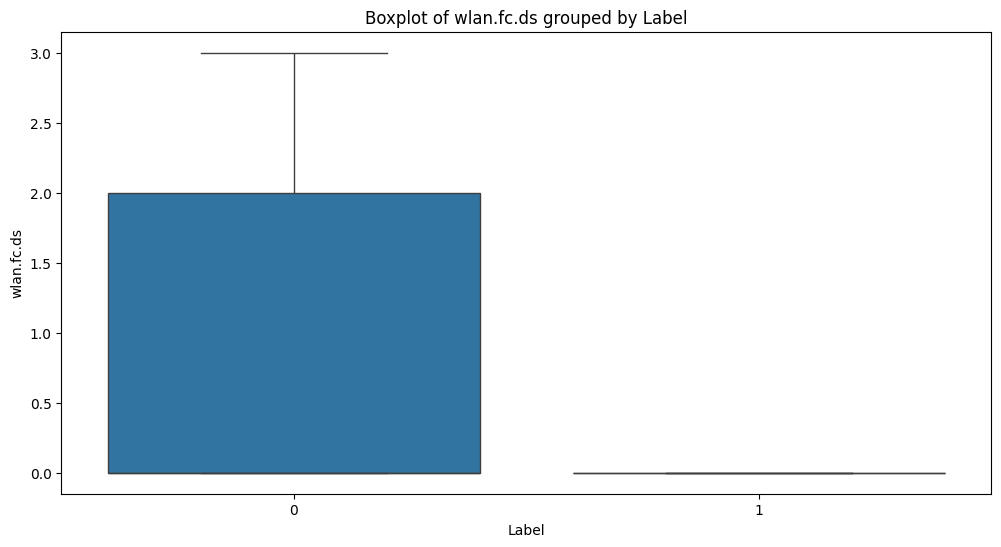

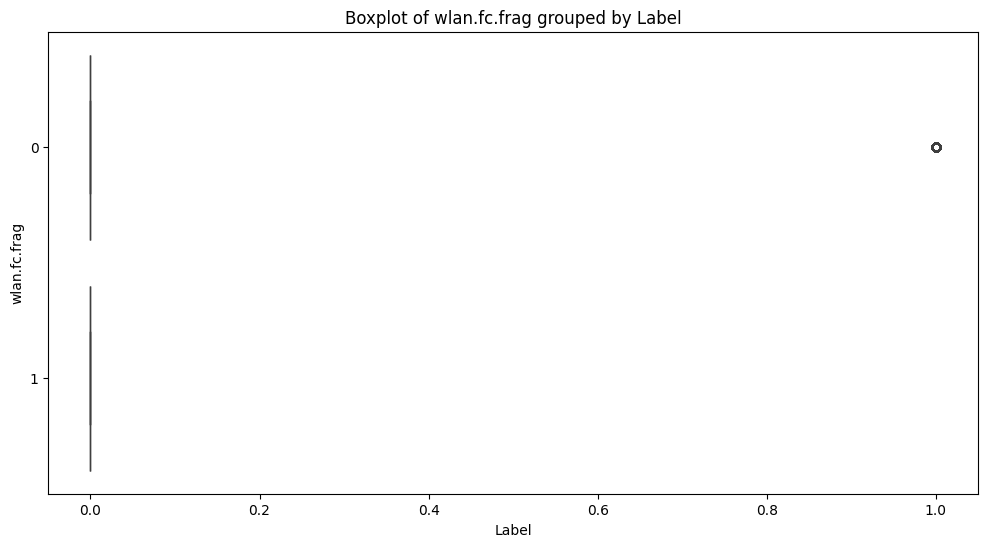

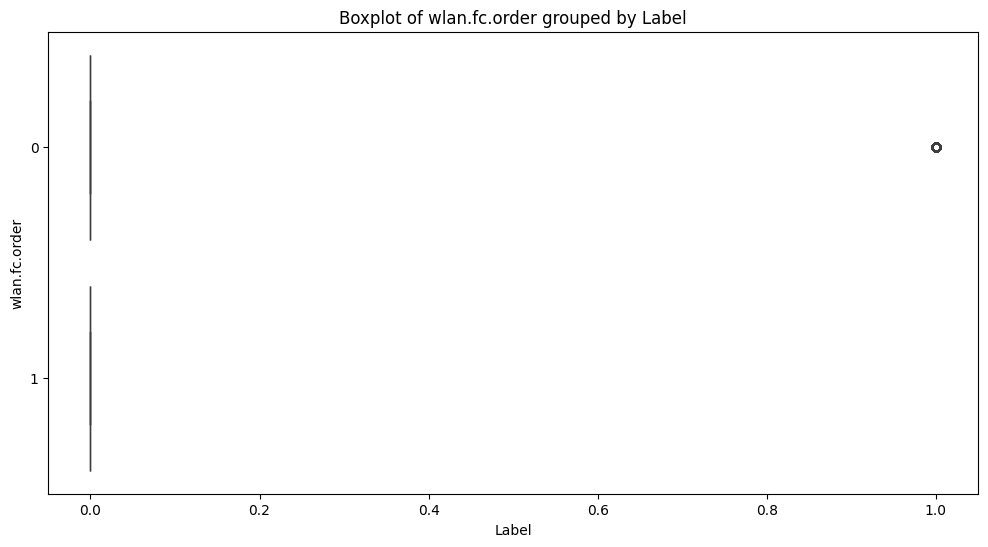

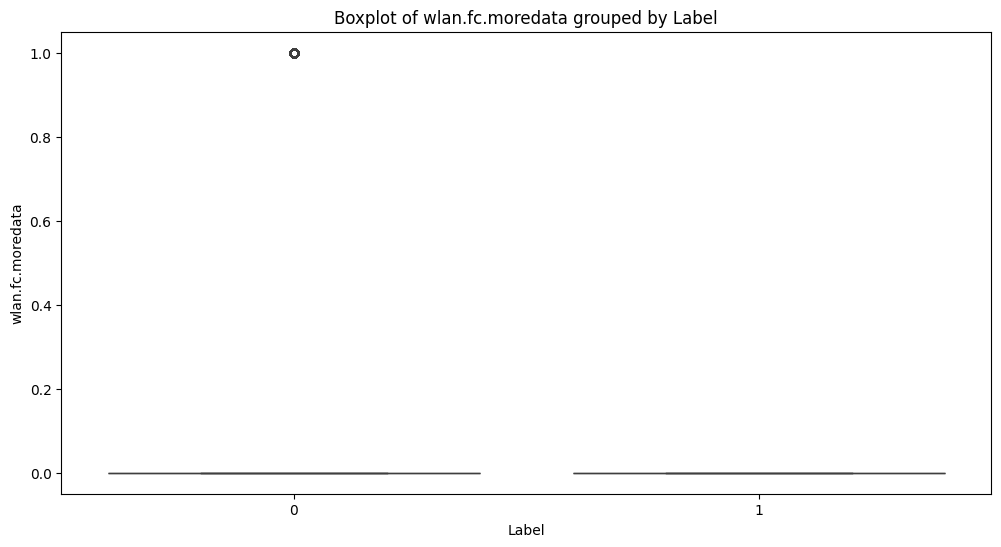

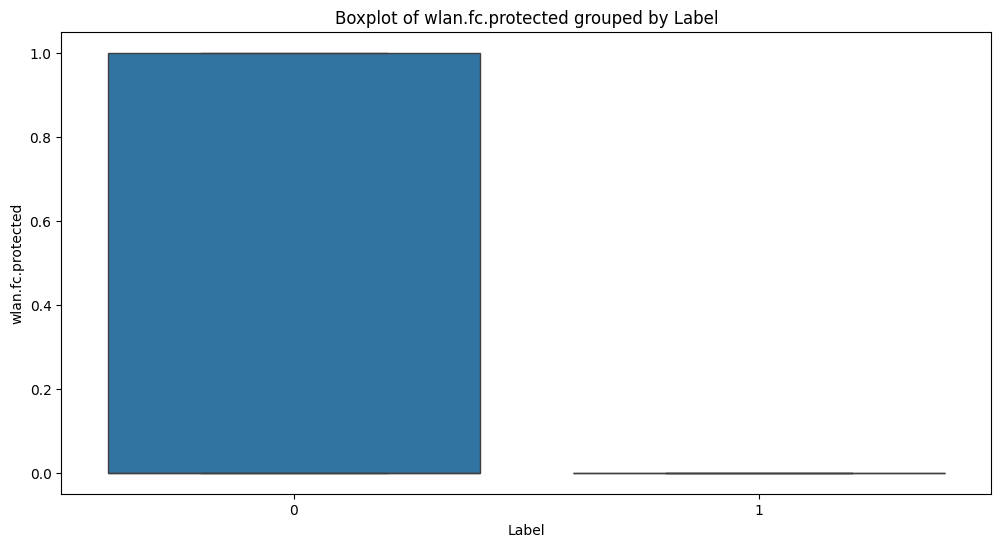

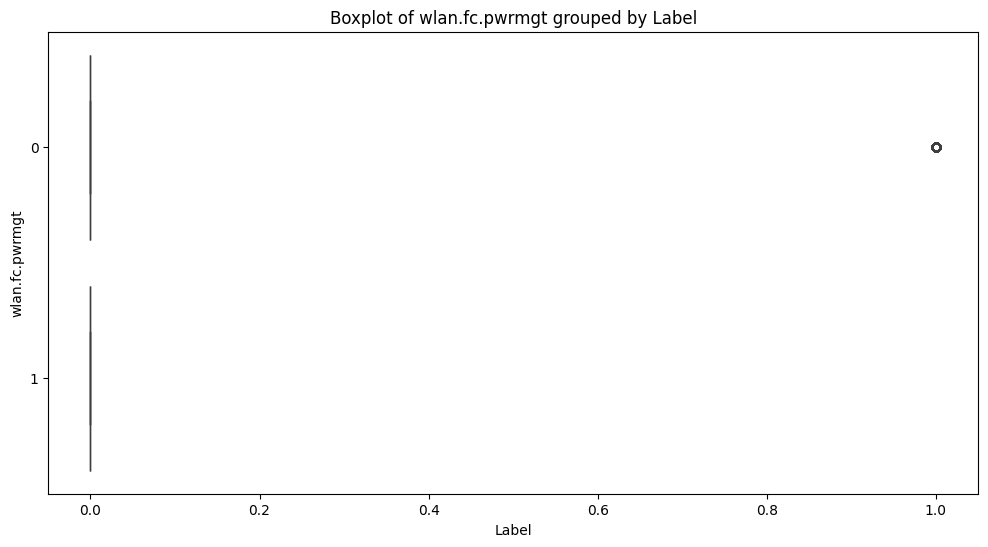

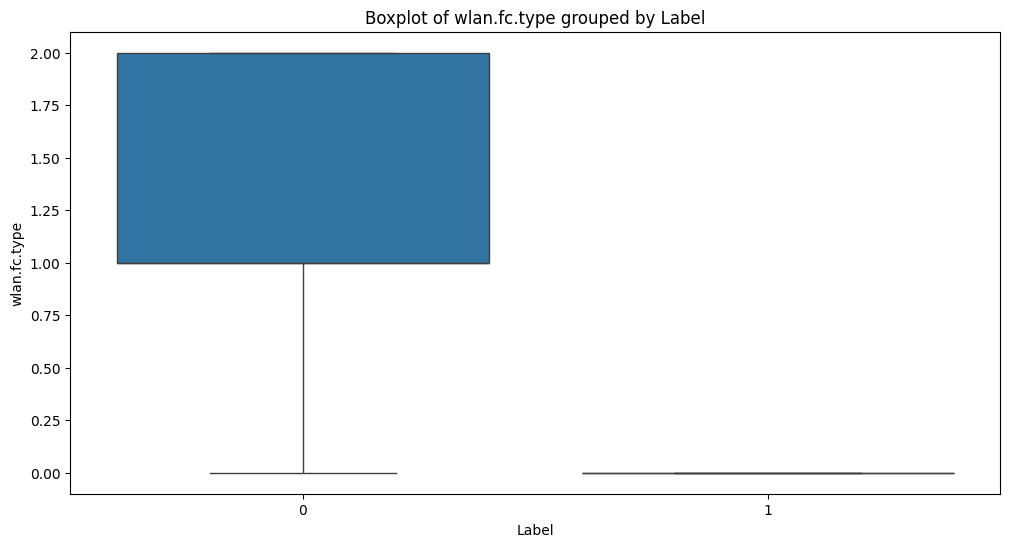

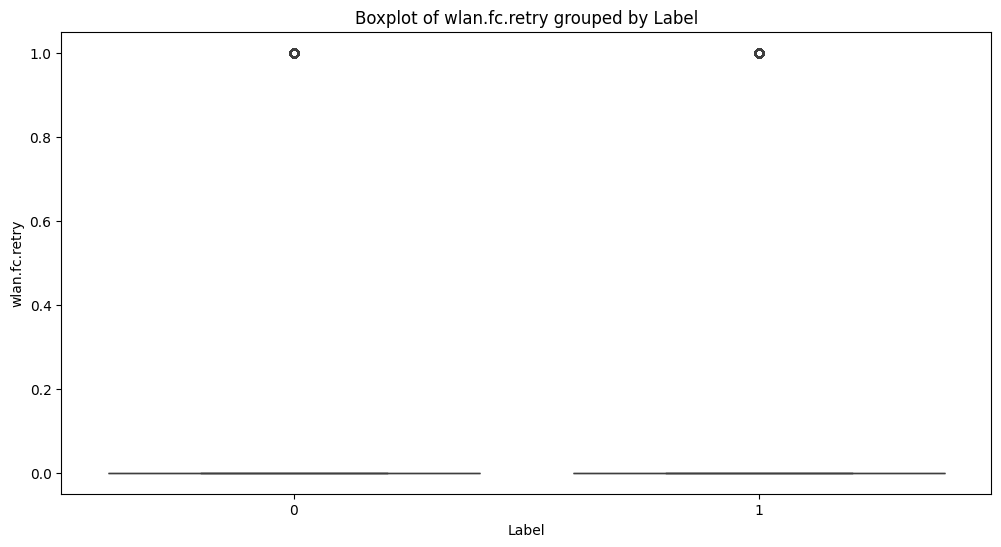

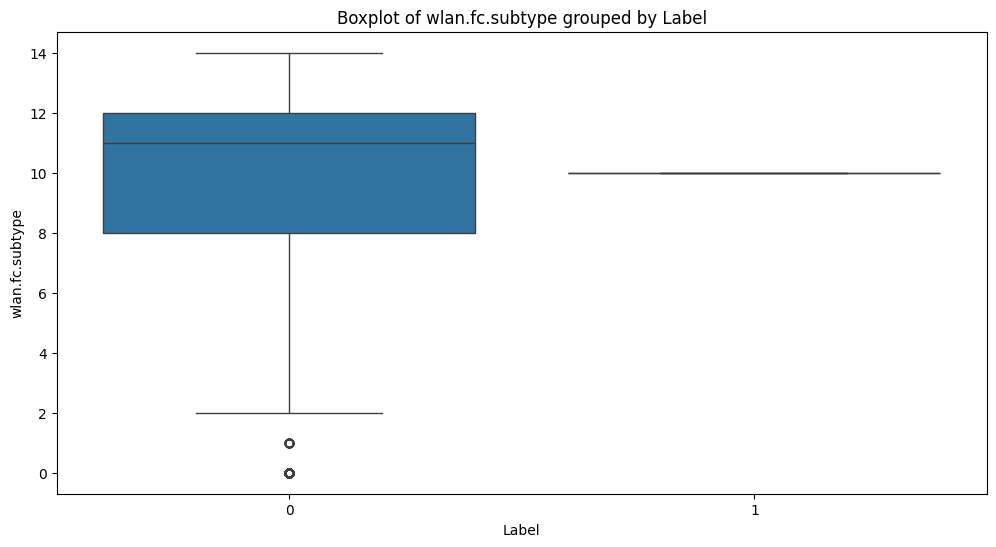

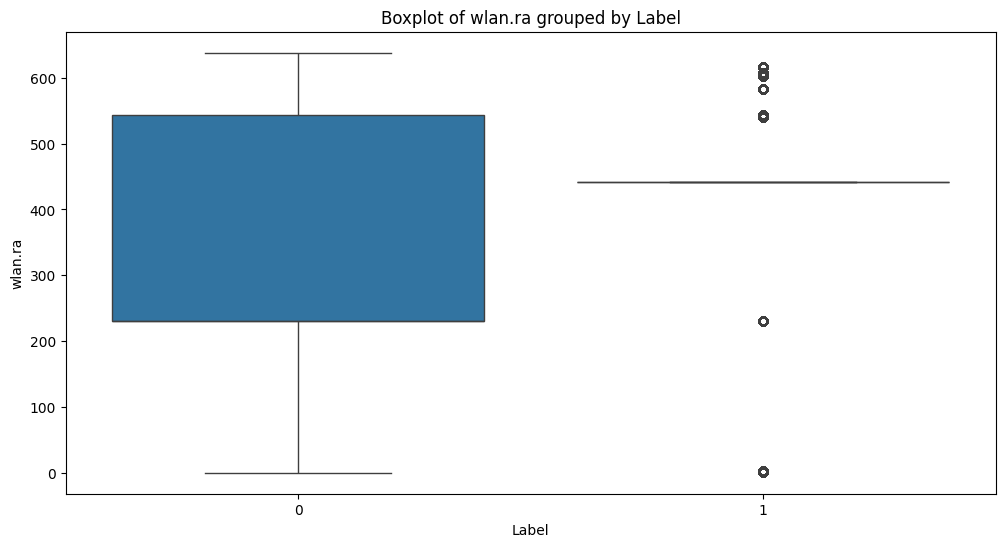

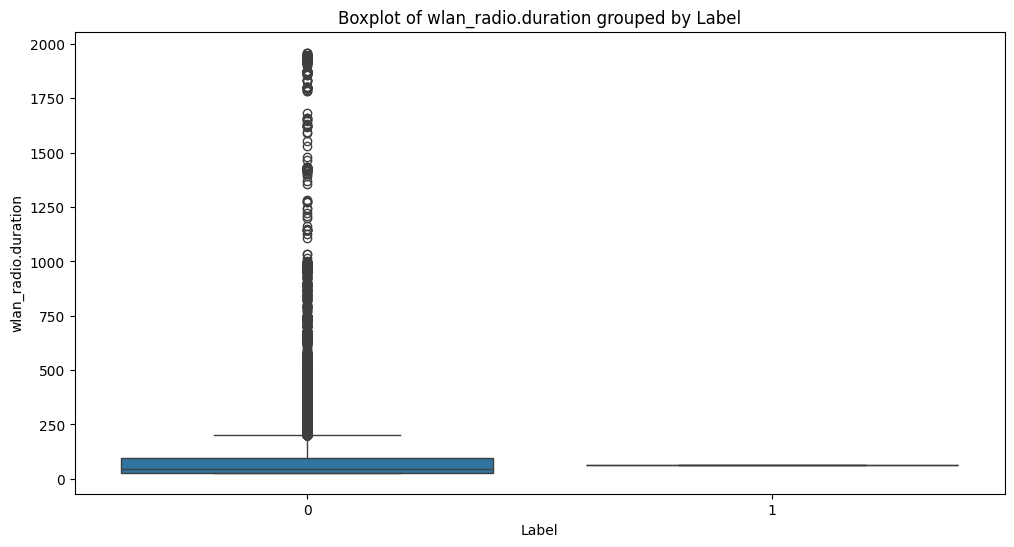

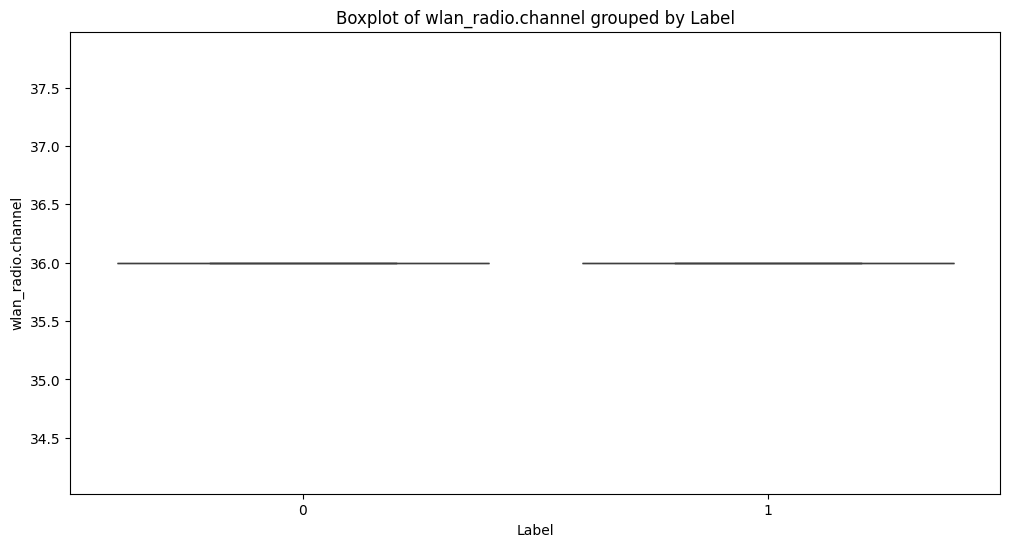

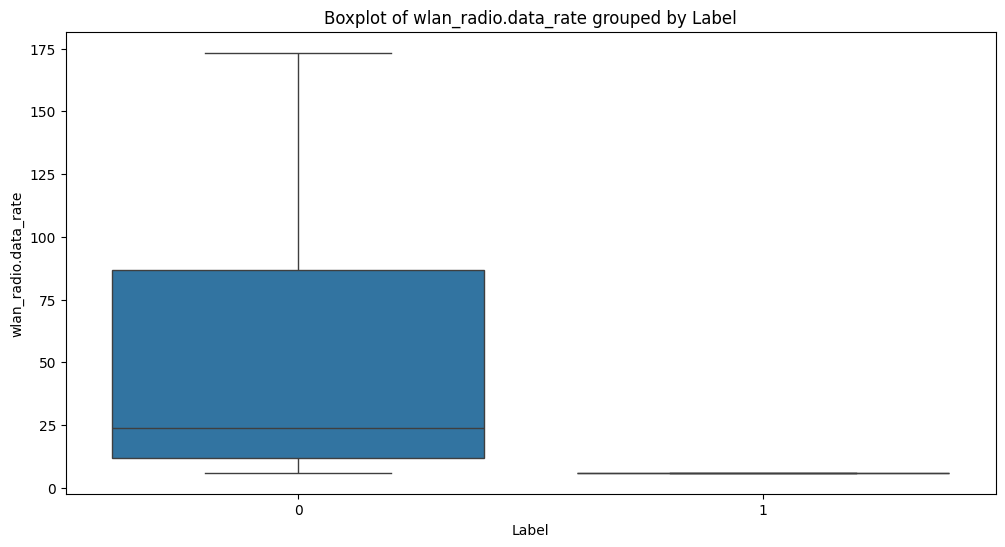

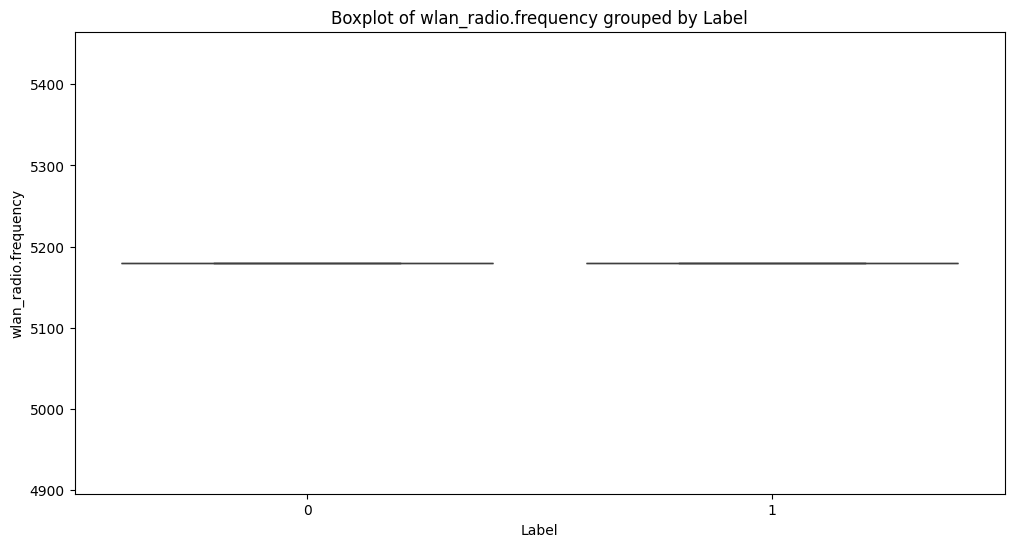

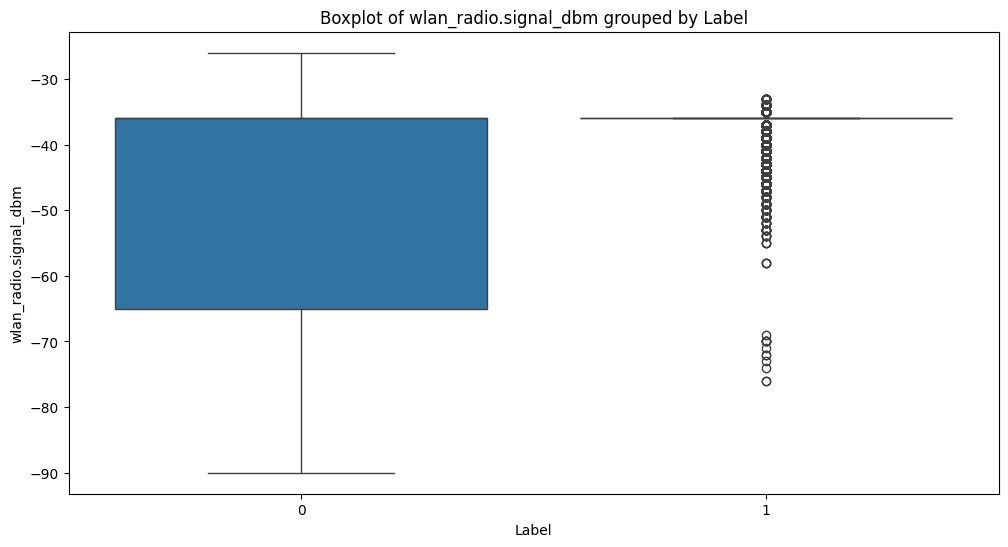

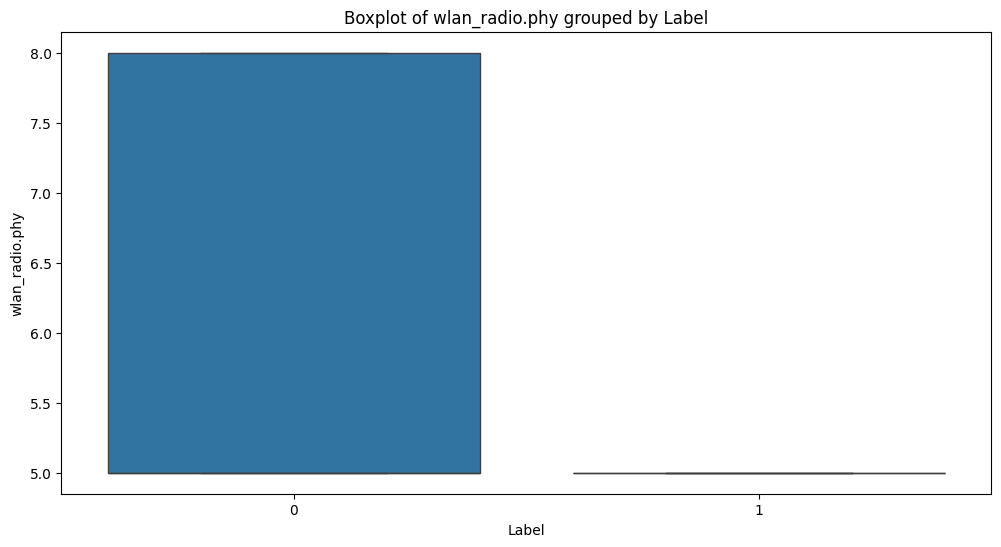

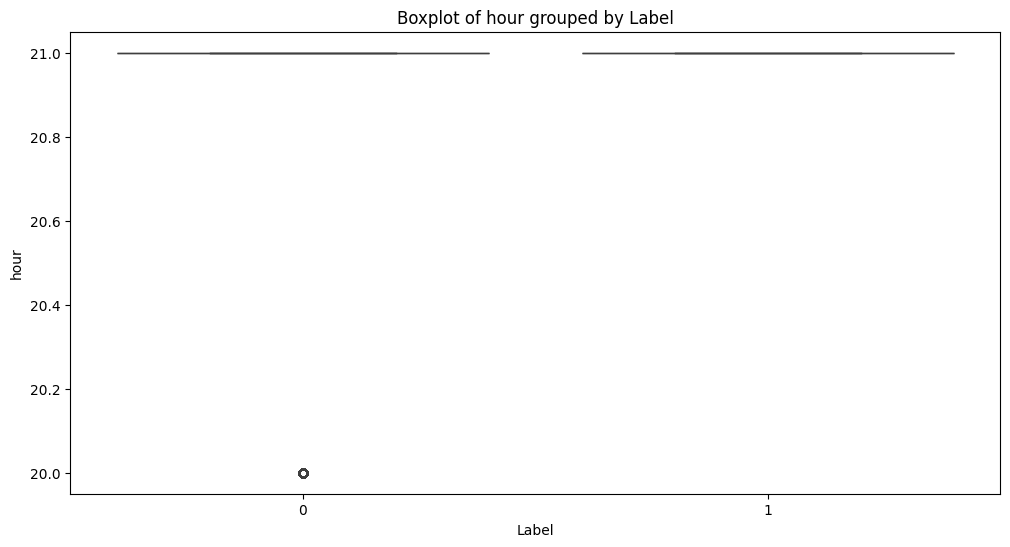

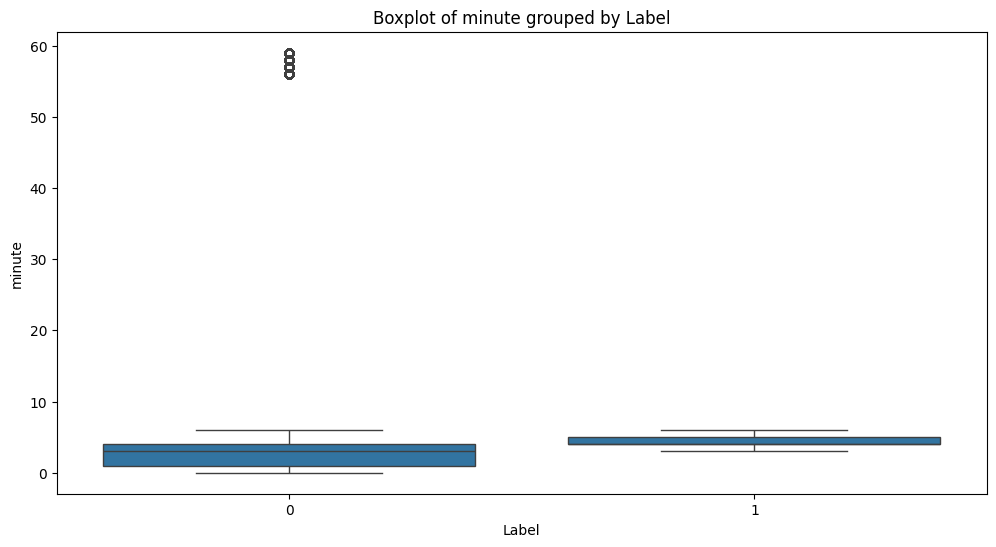

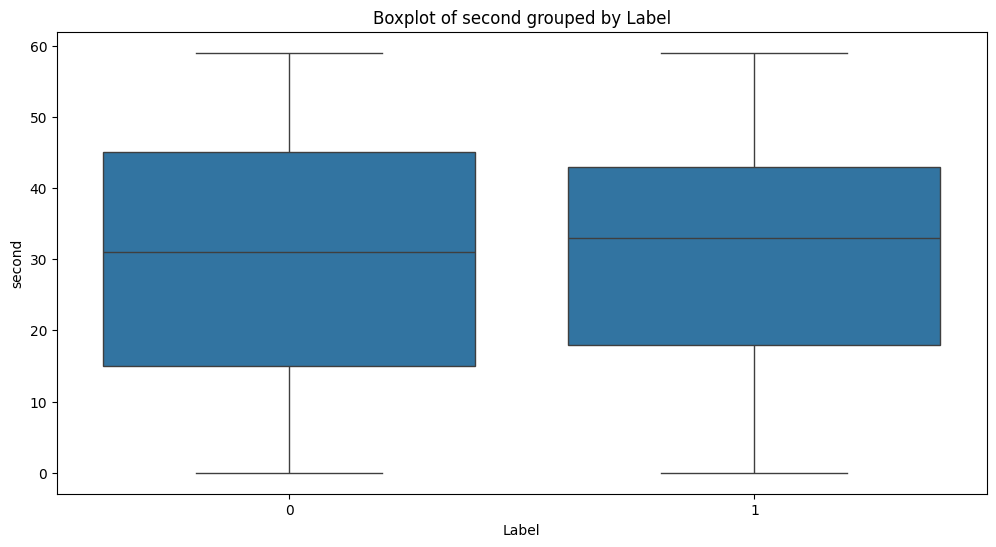

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your dataframe and `target` is your target variable
target = 'Label' 

# Iterate through each feature and plot its distribution within each class
for col in df.columns:
    if col != target:  # Skip the target column itself
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=target, y=col, data=df)  # Boxplot for each feature per class
        plt.title(f'Boxplot of {col} grouped by {target}')
        plt.show()

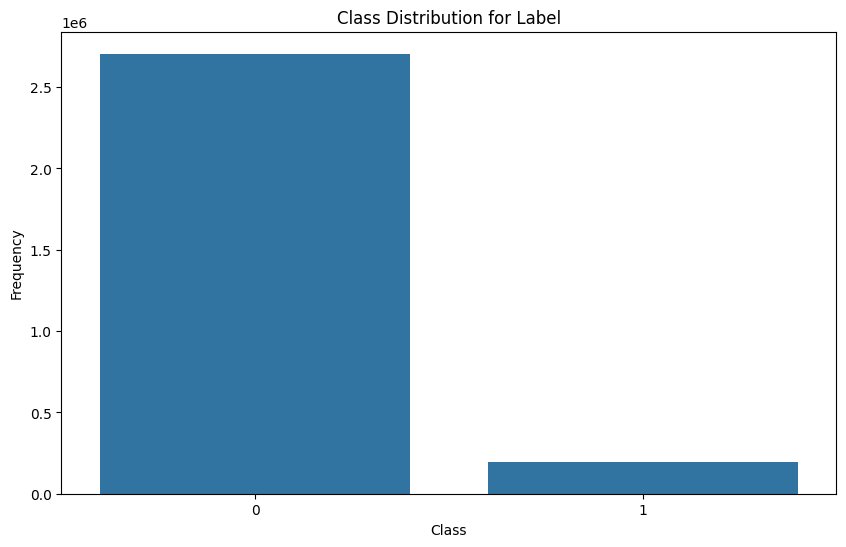

Class distribution:
 Label
0    2705652
1     194788
Name: count, dtype: int64
Potential outlier classes (less than 5.0% of total samples):
 Series([], Name: count, dtype: int64)


In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your target column is named 'target'
target_column = 'Label' 

# 1. Check Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df[target_column])
plt.title(f"Class Distribution for {target_column}")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# 2. Calculate Frequency of Each Class
class_distribution = df[target_column].value_counts()
print("Class distribution:\n", class_distribution)

# 3. Highlight Potential Outliers (classes with very low frequency)
threshold = 0.05  # Define a threshold for what you consider a "rare" class (e.g., less than 5%)
total_samples = len(df)
outlier_classes = class_distribution[class_distribution / total_samples < threshold]
print(f"Potential outlier classes (less than {threshold*100}% of total samples):\n", outlier_classes)


## 3.1 Outliers Treatment

In [199]:
import numpy as np

# Define a function to calculate the IQR and identify outliers
def calculate_iqr_outliers(column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    return lower_bound, upper_bound

# Choose a feature to apply the IQR method, e.g., 'radiotap.dbm_antsignal'
lower_bound, upper_bound = calculate_iqr_outliers('radiotap.dbm_antsignal')

# Filter the DataFrame to remove outliers based on the calculated bounds
df_no_outliers = df[(df['radiotap.dbm_antsignal'] > lower_bound) & (df['radiotap.dbm_antsignal'] < upper_bound)]

# Check how many rows were removed
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")
print(f"Number of rows before removing outliers: {len(df)}")


Number of rows after removing outliers: 2550441
Number of rows before removing outliers: 2900440


In [200]:
# Before removing outliers
print("Class distribution before removing outliers:")
print(df['Label'].value_counts())

# After removing outliers
print("Class distribution after removing outliers:")
print(df_no_outliers['Label'].value_counts())


Class distribution before removing outliers:
Label
0    2705652
1     194788
Name: count, dtype: int64
Class distribution after removing outliers:
Label
0    2355653
1     194788
Name: count, dtype: int64


<Axes: >

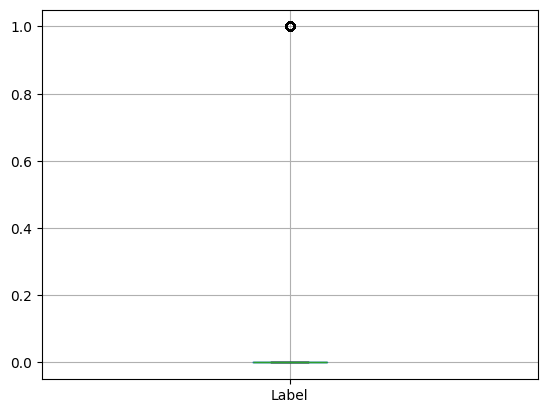

In [201]:
df.boxplot(column=['Label'])

In [203]:
# Step 1: Filter the DataFrame for label 0 and 1
df_label_0 = df[df['Label'] == 0]
df_label_1 = df[df['Label'] == 1]

# Step 2: Apply IQR method to the 'radiotap.dbm_antsignal' column for label 0
lower_bound, upper_bound = calculate_iqr_outliers('radiotap.dbm_antsignal')

# Step 3: Remove outliers from label 0 subset
df_label_0_no_outliers = df_label_0[(df_label_0['radiotap.dbm_antsignal'] > lower_bound) & 
                                    (df_label_0['radiotap.dbm_antsignal'] < upper_bound)]

# Step 4: Concatenate the cleaned label 0 data with the unchanged label 1 data
df_cleaned_data = pd.concat([df_label_0_no_outliers, df_label_1])

# Step 5: Check the updated class distribution
print("Class distribution after removing outliers from label 0:")
print(df_cleaned_data['Label'].value_counts())

# Step 6: Check the number of rows before and after outlier removal
print(f"Number of rows after removing outliers from label 0: {len(df_cleaned_data)}")
print(f"Number of rows before removing outliers: {len(df)}")


Class distribution after removing outliers from label 0:
Label
0    2355653
1     194788
Name: count, dtype: int64
Number of rows after removing outliers from label 0: 2550441
Number of rows before removing outliers: 2900440


In [207]:
df_cleaned_data

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                      23        336       2900001          0.000943   
1                      23         70       2900002          0.000054   
2                      23         79       2900003          0.000281   
3                      23         76       2900004          0.000425   
4                      23         70       2900005          0.000047   
...                   ...        ...           ...               ...   
1349864                23         86       1599415          0.000166   
1349887                23         86       1599438          0.000104   
1350108                23         86       1599659          0.000123   
1350124                23         86       1599675          0.000132   
1350241                23         86       1599792          0.000289   

         frame.time_epoch  frame.time_relative  radiotap.channel.flags.cck  \
0            1.609010e+09           602.281351                           0   
1            1.609010e+09           602.281405                           0   
2            1.609010e+09           602.281686                           0   
3            1.609010e+09           602.282111                           0   
4            1.609010e+09           602.282158                           0   
...                   ...                  ...                         ...   
1349864      1.609009e+09           423.739648                           0   
1349887      1.609009e+09           423.741653                           0   
1350108      1.609009e+09           423.767106                           0   
1350124      1.609009e+09           423.768974                           0   
1350241      1.609009e+09           423.779086                           0   

         radiotap.channel.flags.ofdm  radiotap.channel.freq  \
0                                  1                   5180   
1                                  1                   5180   
2                                  1                   5180   
3                                  1                   5180   
4                                  1                   5180   
...                              ...                    ...   
1349864                            1                   5180   
1349887                            1                   5180   
1350108                            1                   5180   
1350124                            1                   5180   
1350241                            1                   5180   

         radiotap.dbm_antsignal  ...  wlan_radio.duration wlan_radio.channel  \
0                         -83.0  ...                  400                 36   
1                        -194.0  ...                   44                 36   
2                         -98.0  ...                   32                 36   
3                         -98.0  ...                   28                 36   
4                        -218.0  ...                   28                 36   
...                         ...  ...                  ...                ...   
1349864                  -143.0  ...                   64                 36   
1349887                  -143.0  ...                   64                 36   
1350108                  -146.0  ...                   64                 36   
1350124                  -144.0  ...                   64                 36   
1350241                  -141.0  ...                   64                 36   

         wlan_radio.data_rate  wlan_radio.frequency  wlan_radio.signal_dbm  \
0                         6.0                  5180                    -27   
1                         6.0                  5180                    -68   
2                        24.0                  5180                    -32   
3                        24.0                  5180                    -32   
4                        24.0                  5180                    -70   
...                  

In [208]:
import pandas as pd

# Assuming 'data' is your DataFrame
df_cleaned_data.to_csv('df_cleaned_data.csv', index=False)

## 3.2 Features Creating (Not Used)

In [209]:
import pandas as pd
df=pd.read_csv('df_cleaned_data.csv')
df.head()

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                23        336       2900001          0.000943   
1                23         70       2900002          0.000054   
2                23         79       2900003          0.000281   
3                23         76       2900004          0.000425   
4                23         70       2900005          0.000047   

   frame.time_epoch  frame.time_relative  radiotap.channel.flags.cck  \
0      1.609010e+09           602.281351                           0   
1      1.609010e+09           602.281405                           0   
2      1.609010e+09           602.281686                           0   
3      1.609010e+09           602.282111                           0   
4      1.609010e+09           602.282158                           0   

   radiotap.channel.flags.ofdm  radiotap.channel.freq  radiotap.dbm_antsignal  \
0                            1                   5180                   -83.0   
1                            1                   5180                  -194.0   
2                            1                   5180                   -98.0   
3                            1                   5180                   -98.0   
4                            1                   5180                  -218.0   

   ...  wlan_radio.duration  wlan_radio.channel  wlan_radio.data_rate  \
0  ...                  400                  36                   6.0   
1  ...                   44                  36                   6.0   
2  ...                   32                  36                  24.0   
3  ...                   28                  36                  24.0   
4  ...                   28                  36                  24.0   

   wlan_radio.frequency  wlan_radio.signal_dbm  wlan_radio.phy  Label  hour  \
0                  5180                    -27               5      0    21   
1                  5180                    -68               5      0    21   
2                  5180                    -32               5      0    21   
3                  5180                    -32               5      0    21   
4                  5180                    -70               5      0    21   

   minute  second  
0       6      41  
1       6      41  
2       6      41  
3       6      41  
4       6      41  

[5 rows x 34 columns]

### 3.2.1 Signal Strength Features
Signal strength is critical in wireless communications, and manipulating these features can be very useful:

Signal Strength Categories: Binning radiotap.dbm_antsignal and wlan_radio.signal_dbm into categories (e.g., Weak, Medium, Strong) is likely to help your model capture relationships between signal strength and the label. This simplifies the feature and helps the model recognize patterns.

Signal-to-Noise Ratio (SNR): Estimating SNR by subtracting wlan_radio.signal_dbm from radiotap.dbm_antsignal can capture signal quality, which may correlate strongly with the label.



"Signal Strength Categorization: The continuous signal strength values (in dBm) were binned into three categories: Weak, Medium, and Strong. The binning thresholds were defined based on prior domain knowledge, where signal strengths below -100 dBm were considered Weak, between -100 dBm and -50 dBm as Medium, and values greater than -50 dBm were categorized as Strong. Values outside this range (i.e., below -200 dBm or above 0 dBm) were identified as outliers and assigned to the NaN category, which were subsequently imputed as "Unknown". This categorization facilitated easier interpretation and improved model performance, as confirmed during cross-validation."

In [226]:
# df['signal_strength_range'] = df['radiotap.dbm_antsignal'] - df['wlan_radio.signal_dbm']


In [227]:
# df['signal_strength_category'] = pd.cut(df['radiotap.dbm_antsignal'], bins=[-200, -100, -50, 0], labels=['Weak', 'Medium', 'Strong'])

# df['signal_strength_category'] = pd.cut(df['radiotap.dbm_antsignal'], 
#                                         bins=[-300, -100, -50, 50],  # Adjust the range accordingly
#                                         labels=['Weak', 'Medium', 'Strong'])



In [228]:
# df

In [229]:
# print(df['signal_strength_category'].unique())

In [230]:
# print(df['radiotap.dbm_antsignal'].min(), df['radiotap.dbm_antsignal'].max())

### 3.2.2 Temporal Features
Wireless traffic and network behaviors often have time-based patterns, so temporal features can help your model:

Time of Day: Categorizing the hour into time periods such as Morning, Afternoon, Evening, and Night can help capture temporal patterns in network usage. Traffic might behave differently based on the time of day.

Time Between Frames: The difference in time between consecutive frames (frame.time_delta or frame.time_relative) can indicate traffic flow. Sudden bursts or gaps in traffic might help distinguish between classes

In [231]:
# def time_of_day(hour):
#     if 5 <= hour < 12:
#         return 'Morning'
#     elif 12 <= hour < 17:
#         return 'Afternoon'
#     elif 17 <= hour < 21:
#         return 'Evening'
#     else:
#         return 'Night'
# df['time_of_day'] = df['hour'].apply(time_of_day)


In [232]:
# df['time_between_frames'] = df['frame.time_relative'].diff().fillna(0)


### 3.2.3. Packet-Level Features
The size and duration of packets can provide insights into the network traffic's nature:

Packet Size Category: Binning frame.len into categories (Small, Medium, Large) simplifies packet size and allows your model to learn patterns more effectively.

Rate-to-Duration Ratio: The ratio between wlan_radio.data_rate and wlan.duration might indicate how efficient the transmission was, which could help predict the label.

In [233]:
# df['packet_size_category'] = pd.cut(df['frame.len'], bins=[0, 500, 1500, np.inf], labels=['Small', 'Medium', 'Large'])


In [234]:
# df['rate_to_duration_ratio'] = df['wlan_radio.data_rate'] / df['wlan.duration']


### 3.2.4. Interaction Features
Creating interactions between features can help the model capture complex relationships:

Signal Strength and Data Rate Interaction: Multiplying or interacting radiotap.dbm_antsignal with wlan_radio.data_rate can help your model understand how signal strength impacts the transmission speed or success.

In [235]:
# df['signal_data_rate_interaction'] = df['radiotap.dbm_antsignal'] * df['wlan_radio.data_rate']


In [236]:
# df.info()

* 3.3.1. Handling NaN (Missing) Values
Imputation: You can replace missing values with a suitable statistic (mean, median, mode) for numeric columns. For categorical columns, you can replace NaN with the most frequent category or a special category like "Unknown".

In [237]:
# df

In [238]:
# # Import necessary libraries
# from sklearn.preprocessing import LabelEncoder

# # Convert categorical columns to numerical using LabelEncoder
# label_encoder = LabelEncoder()

# # Apply label encoding to categorical columns
# df['signal_strength_category'] = label_encoder.fit_transform(df['signal_strength_category'])
# df['time_of_day'] = label_encoder.fit_transform(df['time_of_day'])
# df['packet_size_category'] = label_encoder.fit_transform(df['packet_size_category'])


In [239]:
# One-Hot Encoding for nominal categorical columns
# df = pd.get_dummies(df, columns=['time_of_day', 'packet_size_category'], drop_first=True)


In [240]:
# df

In [241]:
# import pandas as pd

# # Assuming 'data' is your DataFrame
# df.to_csv('outlier_cleaned_Dataset_Added_Features.csv', index=False)

In [210]:
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag',
       'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype',
       'wlan.ra', 'wlan_radio.duration', 'wlan_radio.channel',
       'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm',
       'wlan_radio.phy', 'Label', 'hour', 'minute', 'second'],
      dtype='object')


In [243]:
# df = df.drop(columns=['wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata'])

                             frame.encap_type  frame.len  frame.number  \
frame.encap_type                          NaN        NaN           NaN   
frame.len                                 NaN   1.000000     -0.296346   
frame.number                              NaN  -0.296346      1.000000   
frame.time_delta                          NaN  -0.009122     -0.051986   
frame.time_epoch                          NaN  -0.296024      0.996081   
frame.time_relative                       NaN  -0.296035      0.996083   
radiotap.channel.flags.cck                NaN        NaN           NaN   
radiotap.channel.flags.ofdm               NaN        NaN           NaN   
radiotap.channel.freq                     NaN        NaN           NaN   
radiotap.dbm_antsignal                    NaN   0.349673     -0.127882   
radiotap.length                           NaN   0.837521     -0.300056   
radiotap.present.tsft                     NaN  -0.828821      0.297387   
radiotap.timestamp.ts                 

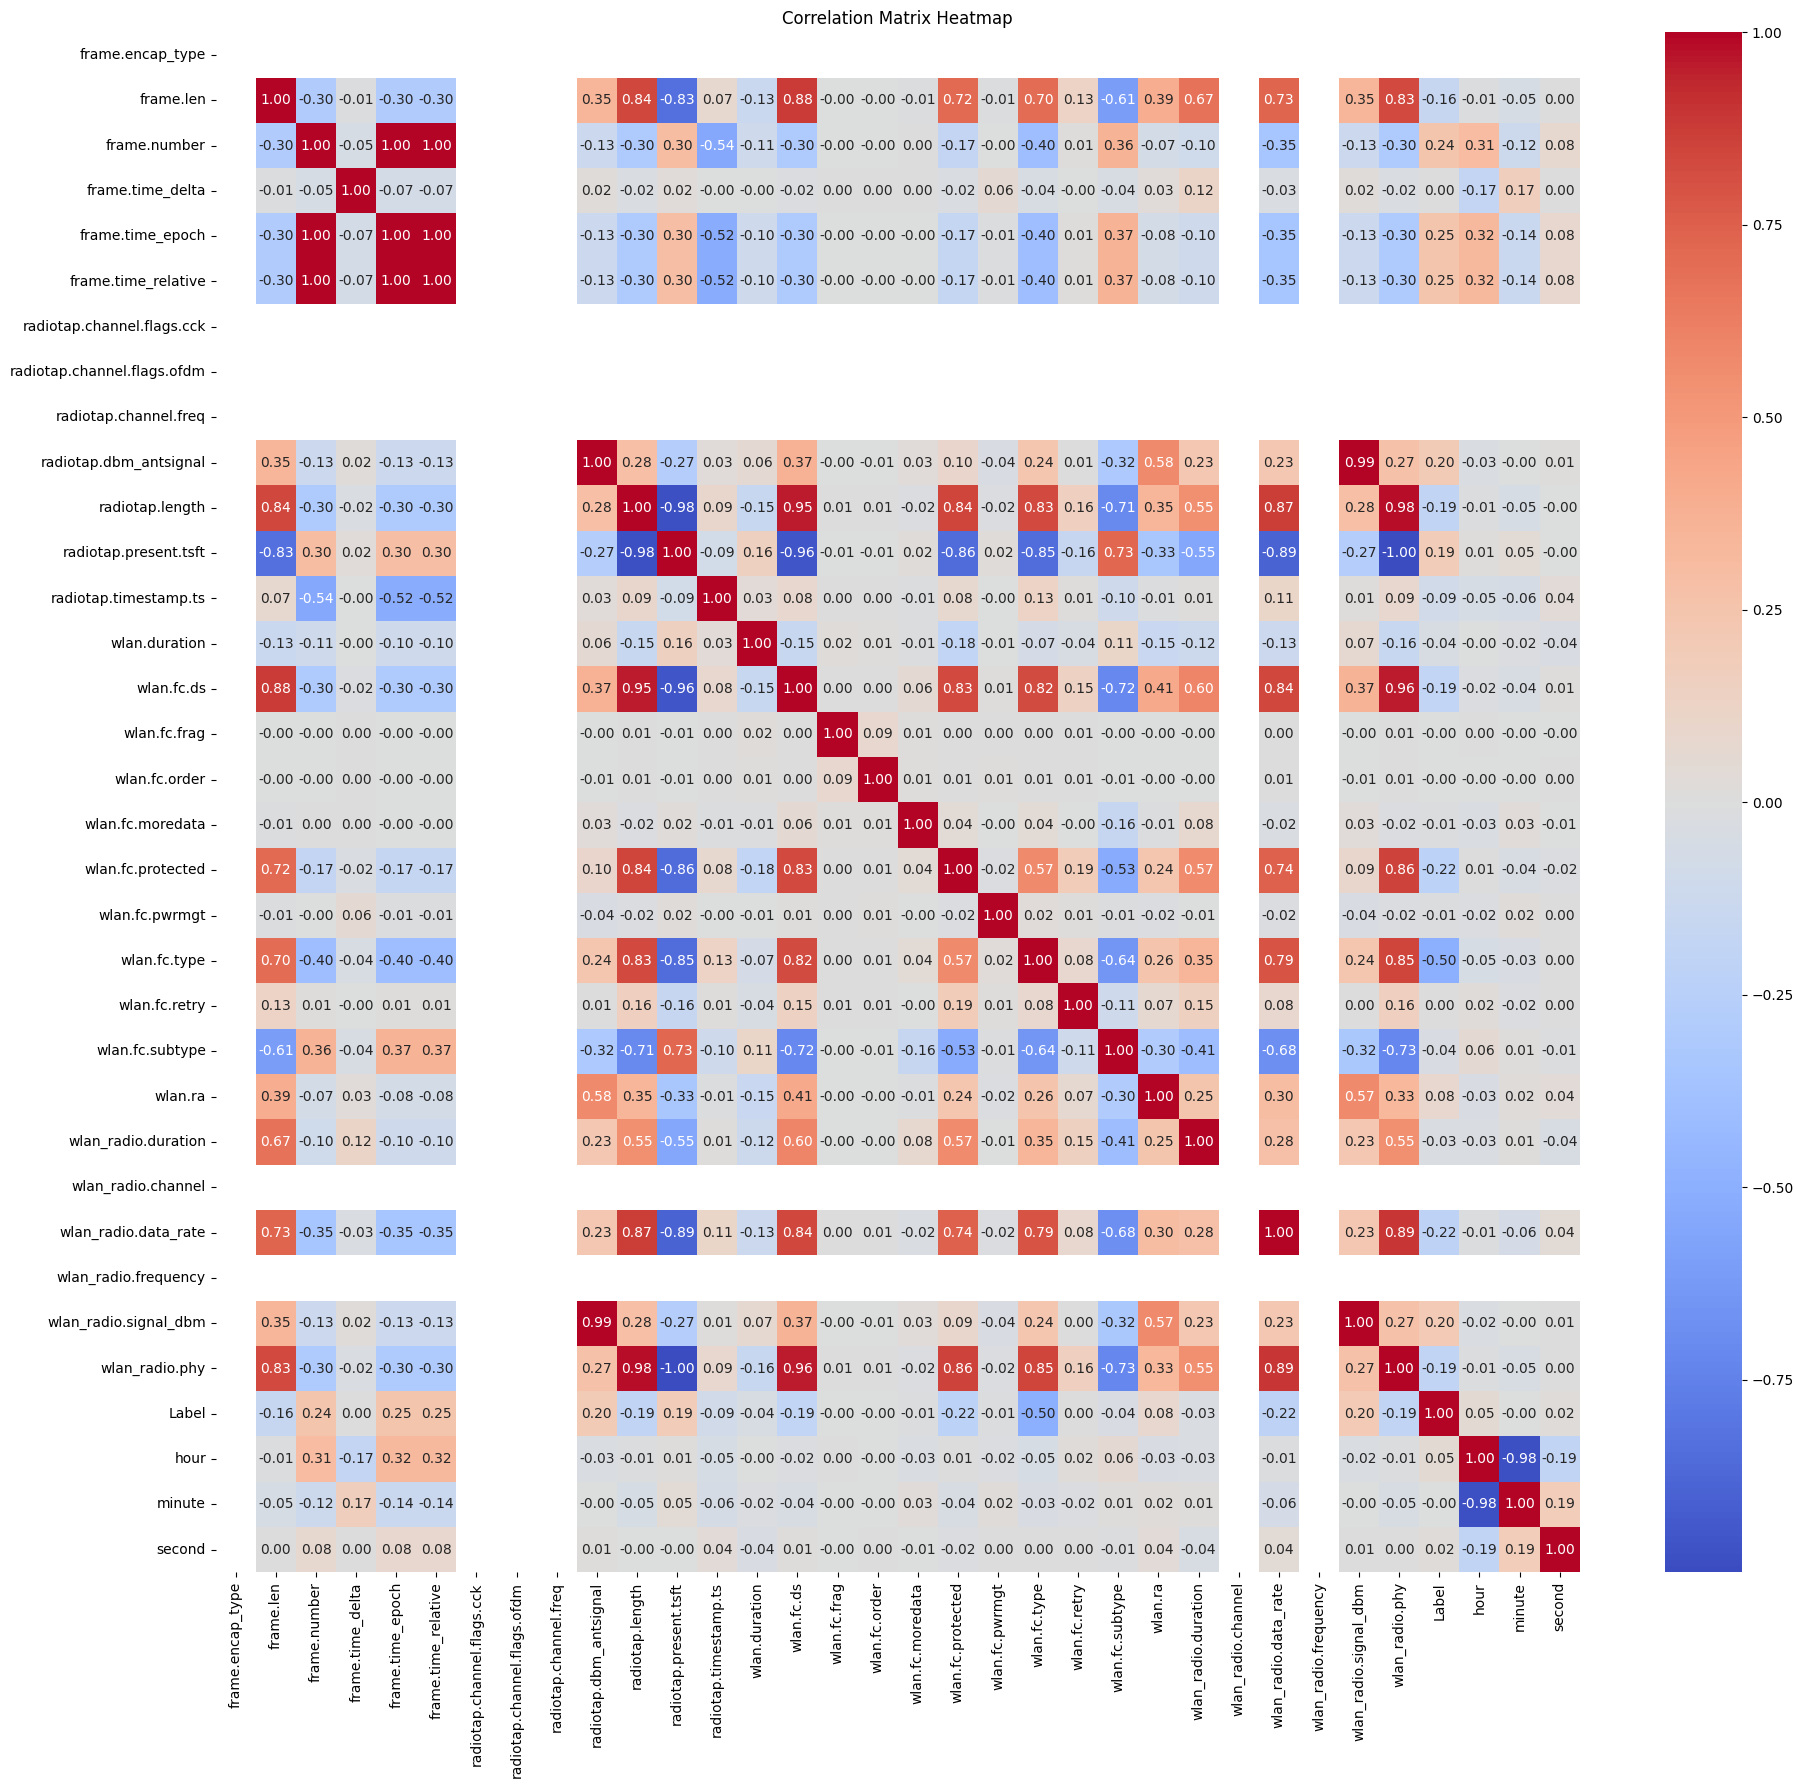

In [211]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix using the standardized data
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# # Show Pearson's Correlation
# df.corr(method ='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [245]:
# df = df.drop(columns=['time_between_frames']) 

In [246]:
# df

# Step 4: Data Split for Modeling, Hybrid Sampling, Applied PCA
Before applying any machine learning algorithms, we should split the data into training and testing sets. 
* 4.1: Data Split: 80%(Training) & 20% (Testing)
* 4.2: Dimensionality Reduction: Used Principal Component Analysis (PCA) to reduce dimensionality.
* 4.3 Imbalanced Dataset: Used SMOTE (OverSampling) and RandomUnderSampler(UnderSampling)

In [242]:
import pandas as pd
df=pd.read_csv('df_cleaned_data.csv')
df.head()

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                23        336       2900001          0.000943   
1                23         70       2900002          0.000054   
2                23         79       2900003          0.000281   
3                23         76       2900004          0.000425   
4                23         70       2900005          0.000047   

   frame.time_epoch  frame.time_relative  radiotap.channel.flags.cck  \
0      1.609010e+09           602.281351                           0   
1      1.609010e+09           602.281405                           0   
2      1.609010e+09           602.281686                           0   
3      1.609010e+09           602.282111                           0   
4      1.609010e+09           602.282158                           0   

   radiotap.channel.flags.ofdm  radiotap.channel.freq  radiotap.dbm_antsignal  \
0                            1                   5180                   -83.0   
1                            1                   5180                  -194.0   
2                            1                   5180                   -98.0   
3                            1                   5180                   -98.0   
4                            1                   5180                  -218.0   

   ...  wlan_radio.duration  wlan_radio.channel  wlan_radio.data_rate  \
0  ...                  400                  36                   6.0   
1  ...                   44                  36                   6.0   
2  ...                   32                  36                  24.0   
3  ...                   28                  36                  24.0   
4  ...                   28                  36                  24.0   

   wlan_radio.frequency  wlan_radio.signal_dbm  wlan_radio.phy  Label  hour  \
0                  5180                    -27               5      0    21   
1                  5180                    -68               5      0    21   
2                  5180                    -32               5      0    21   
3                  5180                    -32               5      0    21   
4                  5180                    -70               5      0    21   

   minute  second  
0       6      41  
1       6      41  
2       6      41  
3       6      41  
4       6      41  

[5 rows x 34 columns]

In [243]:
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag',
       'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype',
       'wlan.ra', 'wlan_radio.duration', 'wlan_radio.channel',
       'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm',
       'wlan_radio.phy', 'Label', 'hour', 'minute', 'second'],
      dtype='object')


In [244]:
# df = df.drop(columns=['wlan.fc.frag'])
# df = df.drop(columns=['wlan.fc.order'])
# df = df.drop(columns=['wlan.fc.pwrmgt'])
# df = df.drop(columns=['frame.encap_type'])
# df = df.drop(columns=['hour'])
# df = df.drop(columns=['minute'])
# df = df.drop(columns=['second'])

In [245]:
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag',
       'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype',
       'wlan.ra', 'wlan_radio.duration', 'wlan_radio.channel',
       'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm',
       'wlan_radio.phy', 'Label', 'hour', 'minute', 'second'],
      dtype='object')


### Stratified Downsampling Based on Feature Importance
Approach: Instead of random downsampling, you can use feature importance (e.g., from a tree-based model) to ensure that samples with important feature values are retained in the downsampling process.
How: First, train a model like a Random Forest to rank features by importance. Then, prioritize keeping samples that have high importance scores in those key features.

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Step 1: Train a Random Forest to get feature importance scores
X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Target

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 2: Get feature importances
feature_importances = rf.feature_importances_

# Step 3: Add the importance scores to your DataFrame
df['importance'] = X.dot(feature_importances)

# Step 4: Separate class 0 and class 1
class_0 = df[df['Label'] == 0]
class_1 = df[df['Label'] == 1]

# Step 5: Sort class 0 by importance and downsample
class_0_sorted = class_0.sort_values(by='importance', ascending=False)
class_0_downsampled = resample(class_0_sorted.head(len(class_1)), 
                               replace=False,    # no replacement
                               n_samples=len(class_1),  # match class 1
                               random_state=42)

# Step 6: Combine class 1 with the selected important class 0 samples
df_balanced = pd.concat([class_0_downsampled, class_1])

# Shuffle and reset index
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
print(df_balanced['Label'].value_counts())


# from sklearn.cluster import KMeans
# from sklearn.utils import resample

## Step 1: Apply KMeans clustering to class 0
# class_0 = df[df['Label'] == 0].drop('Label', axis=1)
# kmeans = KMeans(n_clusters=10, random_state=42)  # Choose an appropriate number of clusters
# df_class_0 = df[df['Label'] == 0]
# df_class_0['cluster'] = kmeans.fit_predict(class_0)

## Step 2: Downsample class 0 while keeping representative samples from each cluster
# class_0_downsampled = df_class_0.groupby('cluster').apply(lambda x: x.sample(n=len(class_1)//10, random_state=42))

## Step 3: Combine class 1 with the downsampled class 0
# df_balanced = pd.concat([class_0_downsampled, df[df['Label'] == 1]])

## Shuffle and reset index
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

## Verify the new class distribution
# print(df_balanced['Label'].value_counts())



Label
0    194788
1    194788
Name: count, dtype: int64


In [247]:
df_balanced

frame.encap_type  frame.len  frame.number  frame.time_delta  \
0                     23        104       2238932          0.000564   
1                     23         86       2050706          0.000172   
2                     23         70       2257223          0.000044   
3                     23        104       2300433          0.000144   
4                     23         86       2102166          0.000096   
...                  ...        ...           ...               ...   
389571                23         86       2492874          0.001869   
389572                23         86       1895384          0.000134   
389573                23         70       2337728          0.000060   
389574                23        196       2492306          0.000106   
389575                23        104       2227493          0.000221   

        frame.time_epoch  frame.time_relative  radiotap.channel.flags.cck  \
0           1.609009e+09           498.093158                           0   
1           1.609009e+09           478.129441                           0   
2           1.609009e+09           499.985581                           0   
3           1.609010e+09           505.015897                           0   
4           1.609009e+09           484.411263                           0   
...                  ...                  ...                         ...   
389571      1.609010e+09           525.497729                           0   
389572      1.609009e+09           460.949359                           0   
389573      1.609010e+09           508.656855                           0   
389574      1.609010e+09           525.361856                           0   
389575      1.609009e+09           496.937219                           0   

        radiotap.channel.flags.ofdm  radiotap.channel.freq  \
0                                 1                   5180   
1                                 1                   5180   
2                                 1                   5180   
3                                 1                   5180   
4                                 1                   5180   
...                             ...                    ...   
389571                            1                   5180   
389572                            1                   5180   
389573                            1                   5180   
389574                            1                   5180   
389575                            1                   5180   

        radiotap.dbm_antsignal  ...  wlan_radio.channel  wlan_radio.data_rate  \
0                       -206.0  ...                  36                 6.000   
1                       -111.0  ...                  36                 6.000   
2                       -197.0  ...                  36                24.000   
3                       -206.0  ...                  36                 6.000   
4                       -111.0  ...                  36                 6.000   
...                        ...  ...                 ...                   ...   
389571                  -141.0  ...                  36                 6.000   
389572                  -111.0  ...                  36                 6.000   
389573                  -205.0  ...                  36                 6.000   
389574                  -111.0  ...                  36               173.333   
389575                  -210.0  ...                  36                 6.000   

        wlan_radio.frequency  wlan_radio.signal_dbm  wlan_radio.phy  Label  \
0                       5180                    -70               5      0   
1                       5180                    -36               5      1   
2                       5180                    -65               5      0   
3                       5180                    -72               5      0   
4                       5180                    -36               5      1   
...                      ...                

In [218]:
# import pandas as pd


# df_balanced.to_csv('df_Class_balanced.csv', index=False)

In [248]:
df_balanced_down = df_balanced.copy()

In [ ]:
# 'frame.len', 'radiotap.length', 'radiotap.dbm_antsignal', 'radiotap.channel.freq', 'wlan.fc.type',
# 'wlan.fc.subtype', 'wlan.duration', 'radiotap.present.tsft', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 
# 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected'




# 'radiotap.channel.freq'
# 'radiotap.channel.flags.cck'
# 'radiotap.channel.flags.ofdm'



                             frame.encap_type  frame.len  frame.number  \
frame.encap_type                          NaN        NaN           NaN   
frame.len                                 NaN   1.000000      0.058833   
frame.number                              NaN   0.058833      1.000000   
frame.time_delta                          NaN  -0.015579      0.103982   
frame.time_epoch                          NaN   0.036819      0.990263   
frame.time_relative                       NaN   0.036782      0.990297   
radiotap.channel.flags.cck                NaN        NaN           NaN   
radiotap.channel.flags.ofdm               NaN        NaN           NaN   
radiotap.channel.freq                     NaN        NaN           NaN   
radiotap.dbm_antsignal                    NaN   0.124751     -0.123753   
radiotap.length                           NaN   0.792504      0.064743   
radiotap.present.tsft                     NaN  -0.784917     -0.068604   
radiotap.timestamp.ts                 

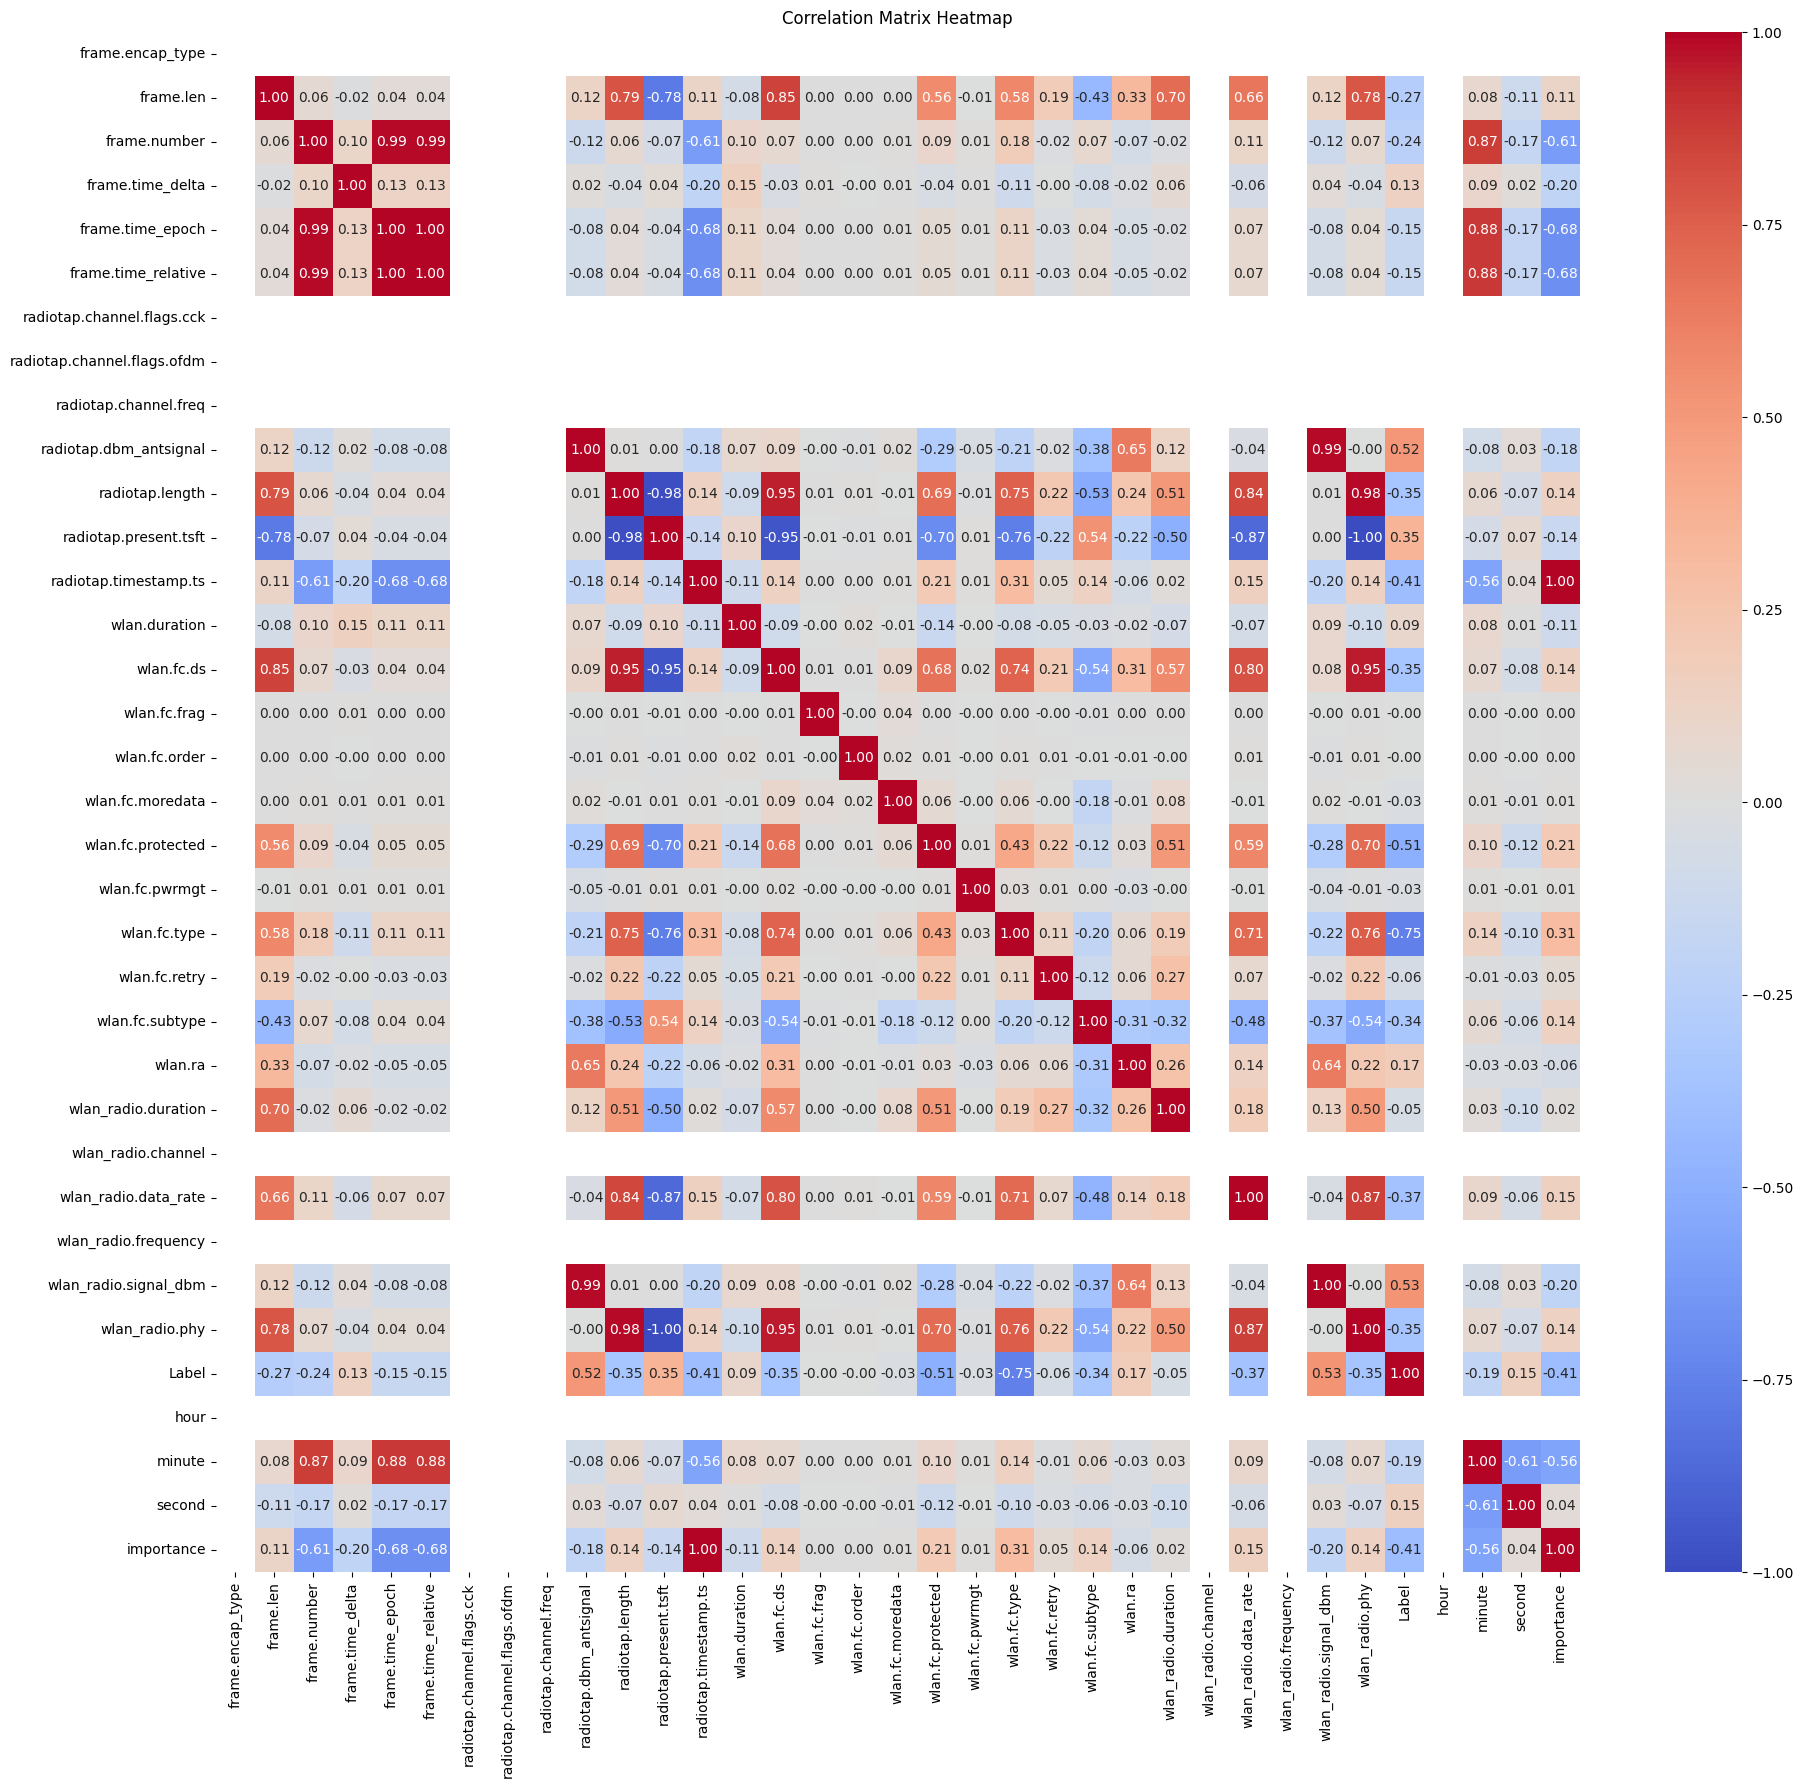

In [249]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix using the standardized data
correlation_matrix = df_balanced.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [250]:
print(df_balanced.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm', 'radiotap.channel.freq',
       'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.present.tsft',
       'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag',
       'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype',
       'wlan.ra', 'wlan_radio.duration', 'wlan_radio.channel',
       'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm',
       'wlan_radio.phy', 'Label', 'hour', 'minute', 'second', 'importance'],
      dtype='object')


In [ ]:
# df_balanced = df_balanced.drop(columns=['radiotap.channel.flags.cck'])
# df_balanced = df_balanced.drop(columns=['radiotap.channel.flags.ofdm'])
# df_balanced = df_balanced.drop(columns=['radiotap.channel.freq'])
# df_balanced = df_balanced.drop(columns=['wlan_radio.channel'])

# df_balanced = df_balanced.drop(columns=['importance'])

# df_balanced = df_balanced.drop(columns=['frame.encap_type'])
# df_balanced = df_balanced.drop(columns=['hour'])
# df_balanced = df_balanced.drop(columns=['minute'])
# df_balanced = df_balanced.drop(columns=['second'])

In [251]:
df_balanced = df_balanced.drop(columns=['importance'])

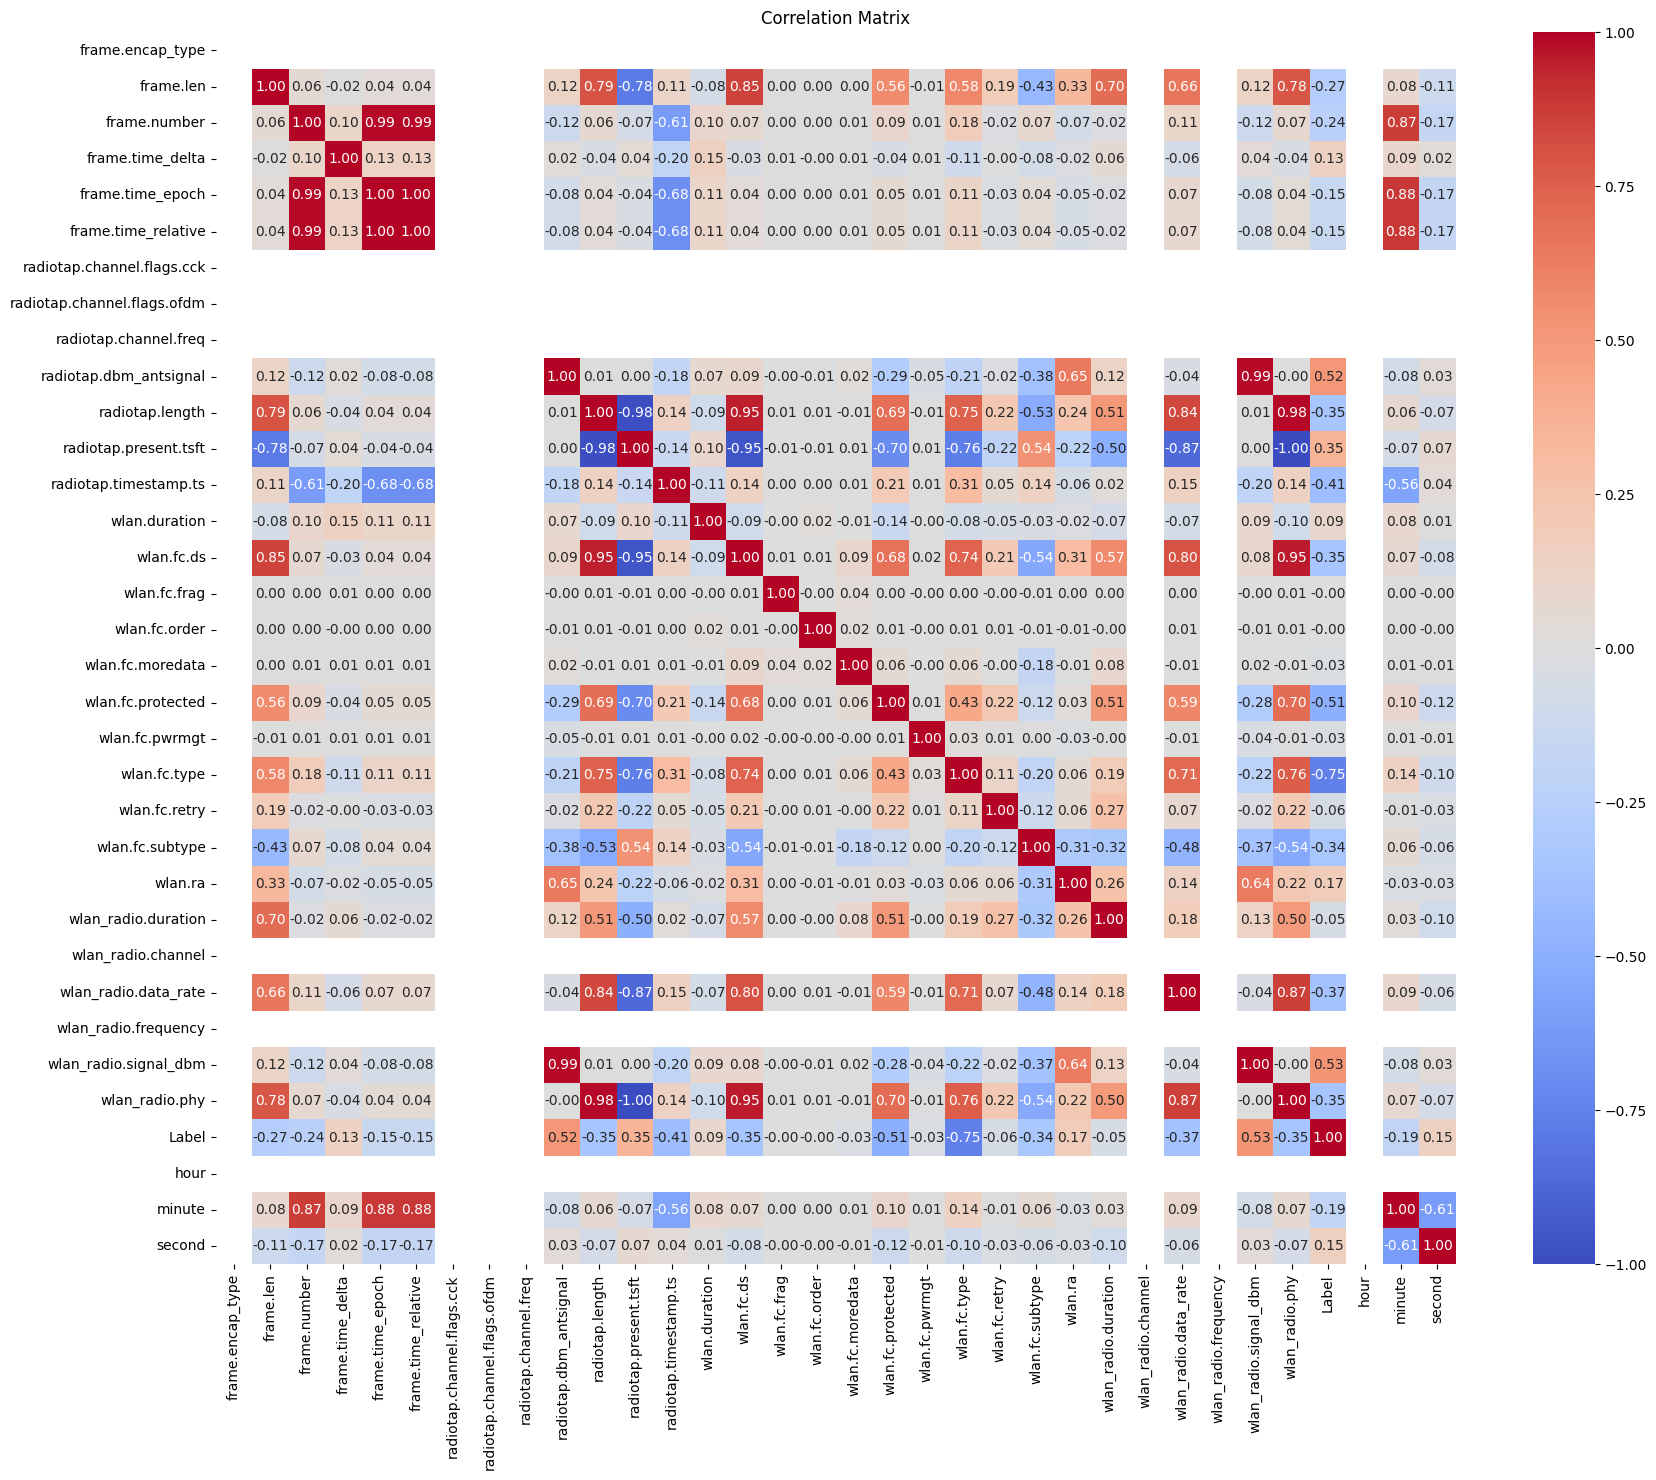

Correlations with the target (Label):
Label                          1.000000
wlan_radio.signal_dbm          0.528433
radiotap.dbm_antsignal         0.515302
radiotap.present.tsft          0.354438
wlan.ra                        0.172651
second                         0.151049
frame.time_delta               0.133284
wlan.duration                  0.093081
wlan.fc.frag                  -0.002266
wlan.fc.order                 -0.004532
wlan.fc.pwrmgt                -0.026867
wlan.fc.moredata              -0.029685
wlan_radio.duration           -0.050593
wlan.fc.retry                 -0.056522
frame.time_relative           -0.148892
frame.time_epoch              -0.148999
minute                        -0.190948
frame.number                  -0.235133
frame.len                     -0.273031
wlan.fc.subtype               -0.341972
wlan.fc.ds                    -0.345507
radiotap.length               -0.349052
wlan_radio.phy                -0.354438
wlan_radio.data_rate          -0.372384
ra

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix (for numeric features)
correlation_matrix = df_balanced.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Look at correlations with the target variable ('Label')
corr_with_target = correlation_matrix['Label'].sort_values(ascending=False)
print("Correlations with the target (Label):")
print(corr_with_target)


In [253]:
df_balanced = df_balanced.drop(columns=['frame.encap_type'])
df_balanced = df_balanced.drop(columns=['radiotap.channel.flags.cck'])
df_balanced = df_balanced.drop(columns=['radiotap.channel.flags.ofdm'])
df_balanced = df_balanced.drop(columns=['radiotap.channel.freq'])
df_balanced = df_balanced.drop(columns=['wlan_radio.channel'])
df_balanced = df_balanced.drop(columns=['wlan_radio.frequency'])
df_balanced = df_balanced.drop(columns=['hour'])

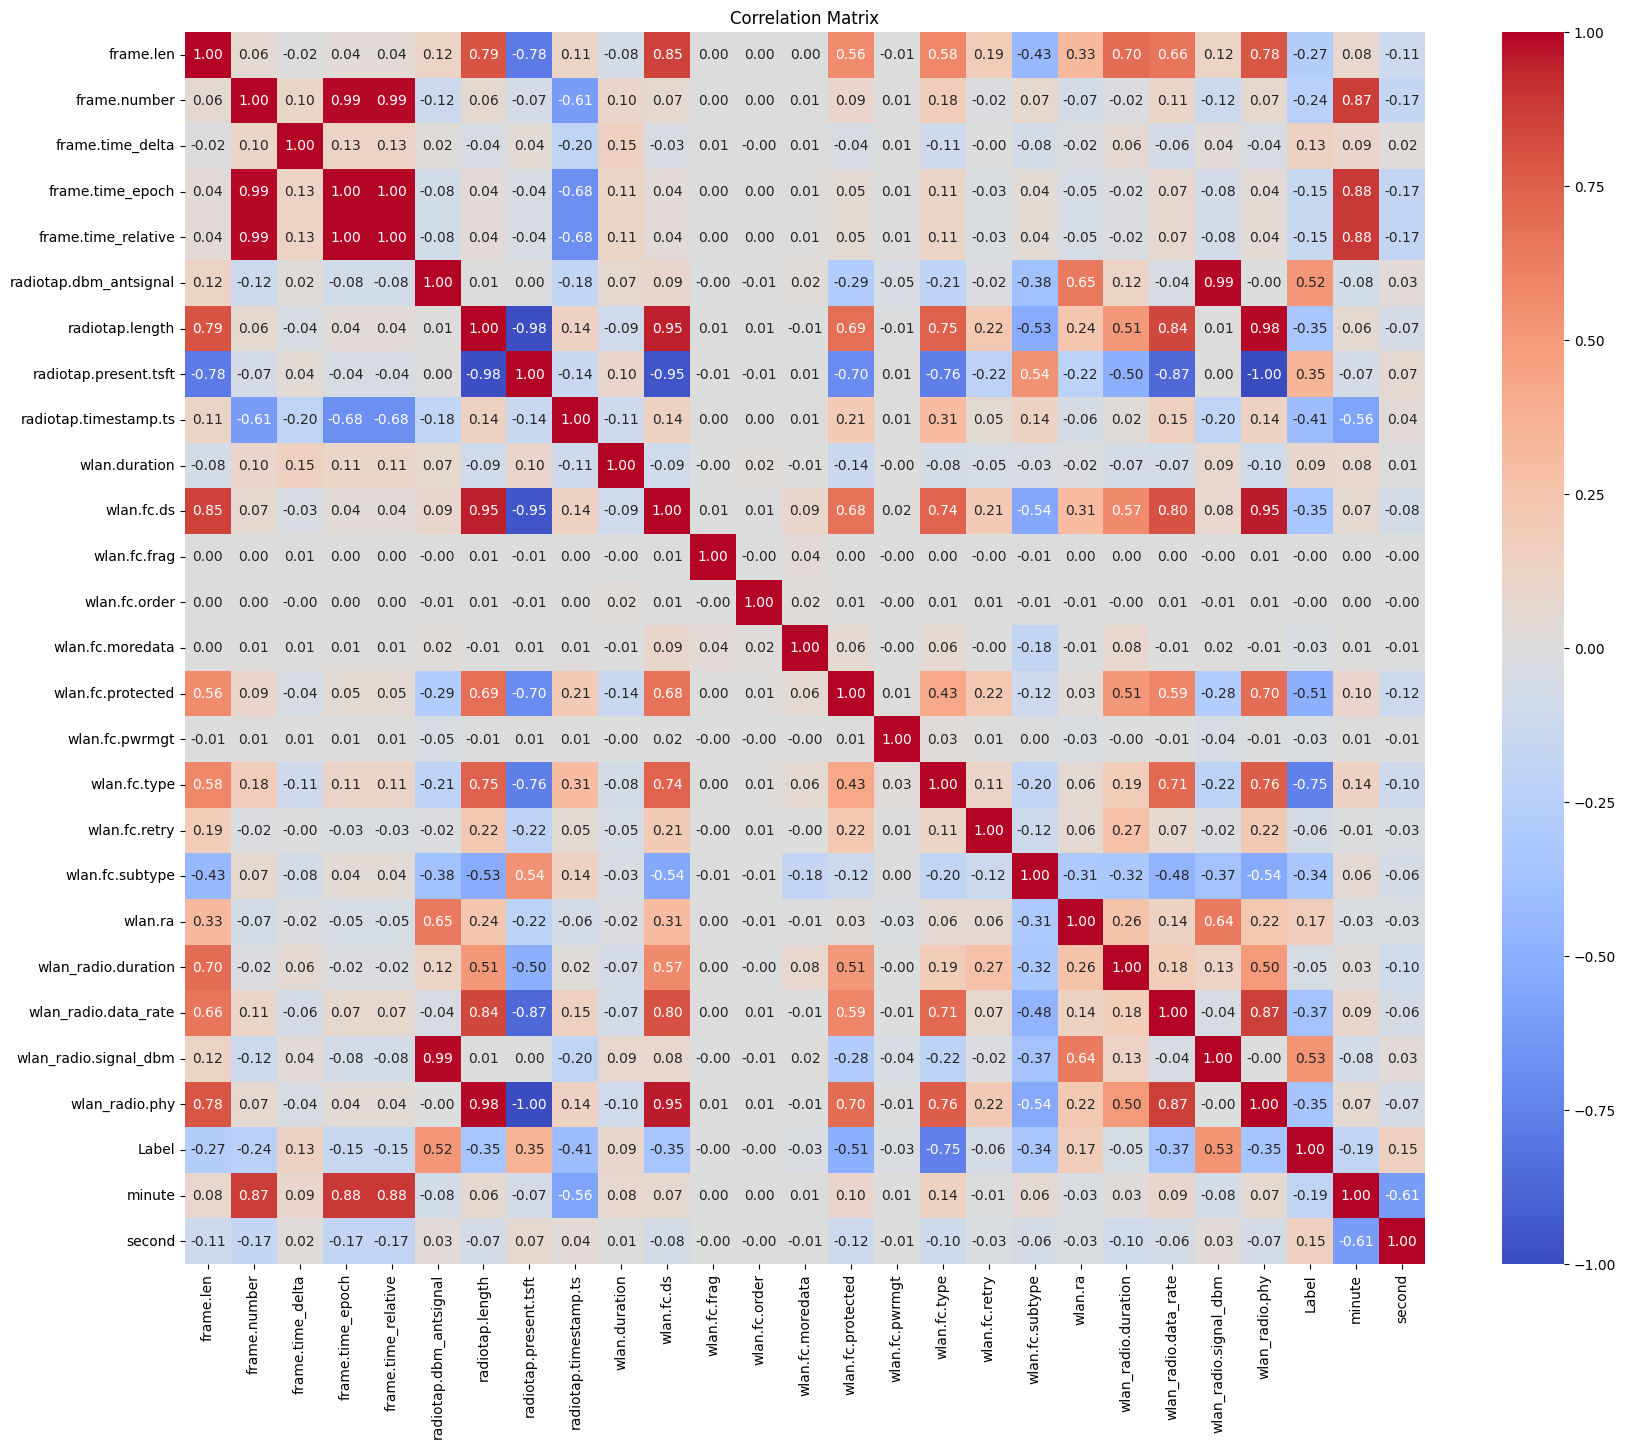

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix (for numeric features)
correlation_matrix = df_balanced.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [255]:
# Drop highly correlated features (correlation coefficient > 0.8)
threshold = 0.90
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the features
df_reduced = df_balanced.drop(columns=to_drop)

print("Dropped features due to multicollinearity:", to_drop)


Dropped features due to multicollinearity: ['frame.time_epoch', 'frame.time_relative', 'wlan.fc.ds', 'wlan_radio.signal_dbm', 'wlan_radio.phy']


In [256]:
df_balanced_dropped_reduced = df_reduced.copy()

In [257]:
df_reduced

frame.len  frame.number  frame.time_delta  radiotap.dbm_antsignal  \
0             104       2238932          0.000564                  -206.0   
1              86       2050706          0.000172                  -111.0   
2              70       2257223          0.000044                  -197.0   
3             104       2300433          0.000144                  -206.0   
4              86       2102166          0.000096                  -111.0   
...           ...           ...               ...                     ...   
389571         86       2492874          0.001869                  -141.0   
389572         86       1895384          0.000134                  -111.0   
389573         70       2337728          0.000060                  -205.0   
389574        196       2492306          0.000106                  -111.0   
389575        104       2227493          0.000221                  -210.0   

        radiotap.length  radiotap.present.tsft  radiotap.timestamp.ts  \
0                    56                      1             4259959698   
1                    56                      1             4239996251   
2                    56                      1             4261852171   
3                    56                      1             4266882372   
4                    56                      1             4246277999   
...                 ...                    ...                    ...   
389571               56                      1             4287363943   
389572               56                      1             4222816356   
389573               56                      1             4270523330   
389574               64                      0             4287228031   
389575               56                      1             4258803783   

        wlan.duration  wlan.fc.frag  wlan.fc.order  ...  wlan.fc.pwrmgt  \
0                -1.0             0              0  ...               0   
1                60.0             0              0  ...               0   
2                -1.0             0              0  ...               0   
3                -1.0             0              0  ...               0   
4                60.0             0              0  ...               0   
...               ...           ...            ...  ...             ...   
389571          320.0             0              0  ...               0   
389572           60.0             0              0  ...               0   
389573           -1.0             0              0  ...               0   
389574           48.0             0              0  ...               0   
389575           -1.0             0              0  ...               0   

        wlan.fc.type  wlan.fc.retry  wlan.fc.subtype  wlan.ra  \
0                  0              0               13      231   
1                  0              0               10      442   
2                  1              0               12      231   
3                  0              0               13      231   
4                  0              0               10      442   
...              ...            ...              ...      ...   
389571             0              0               10      602   
389572             0              0               10      442   
389573             1              0               13      231   
389574             2              0                8      607   
389575             0              0               13      231   

        wlan_radio.duration  wlan_radio.data_rate  Label  minute  second  
0                        88                 6.000      0       4      56  
1                        64                 6.000      1       4      36  
2                        28                24.000      0       4      58  
3                        88                 6.000      0       5       3  
4                        64                 6.000      1       4      43  
...                     ...                   ...    ...     ...     ...  

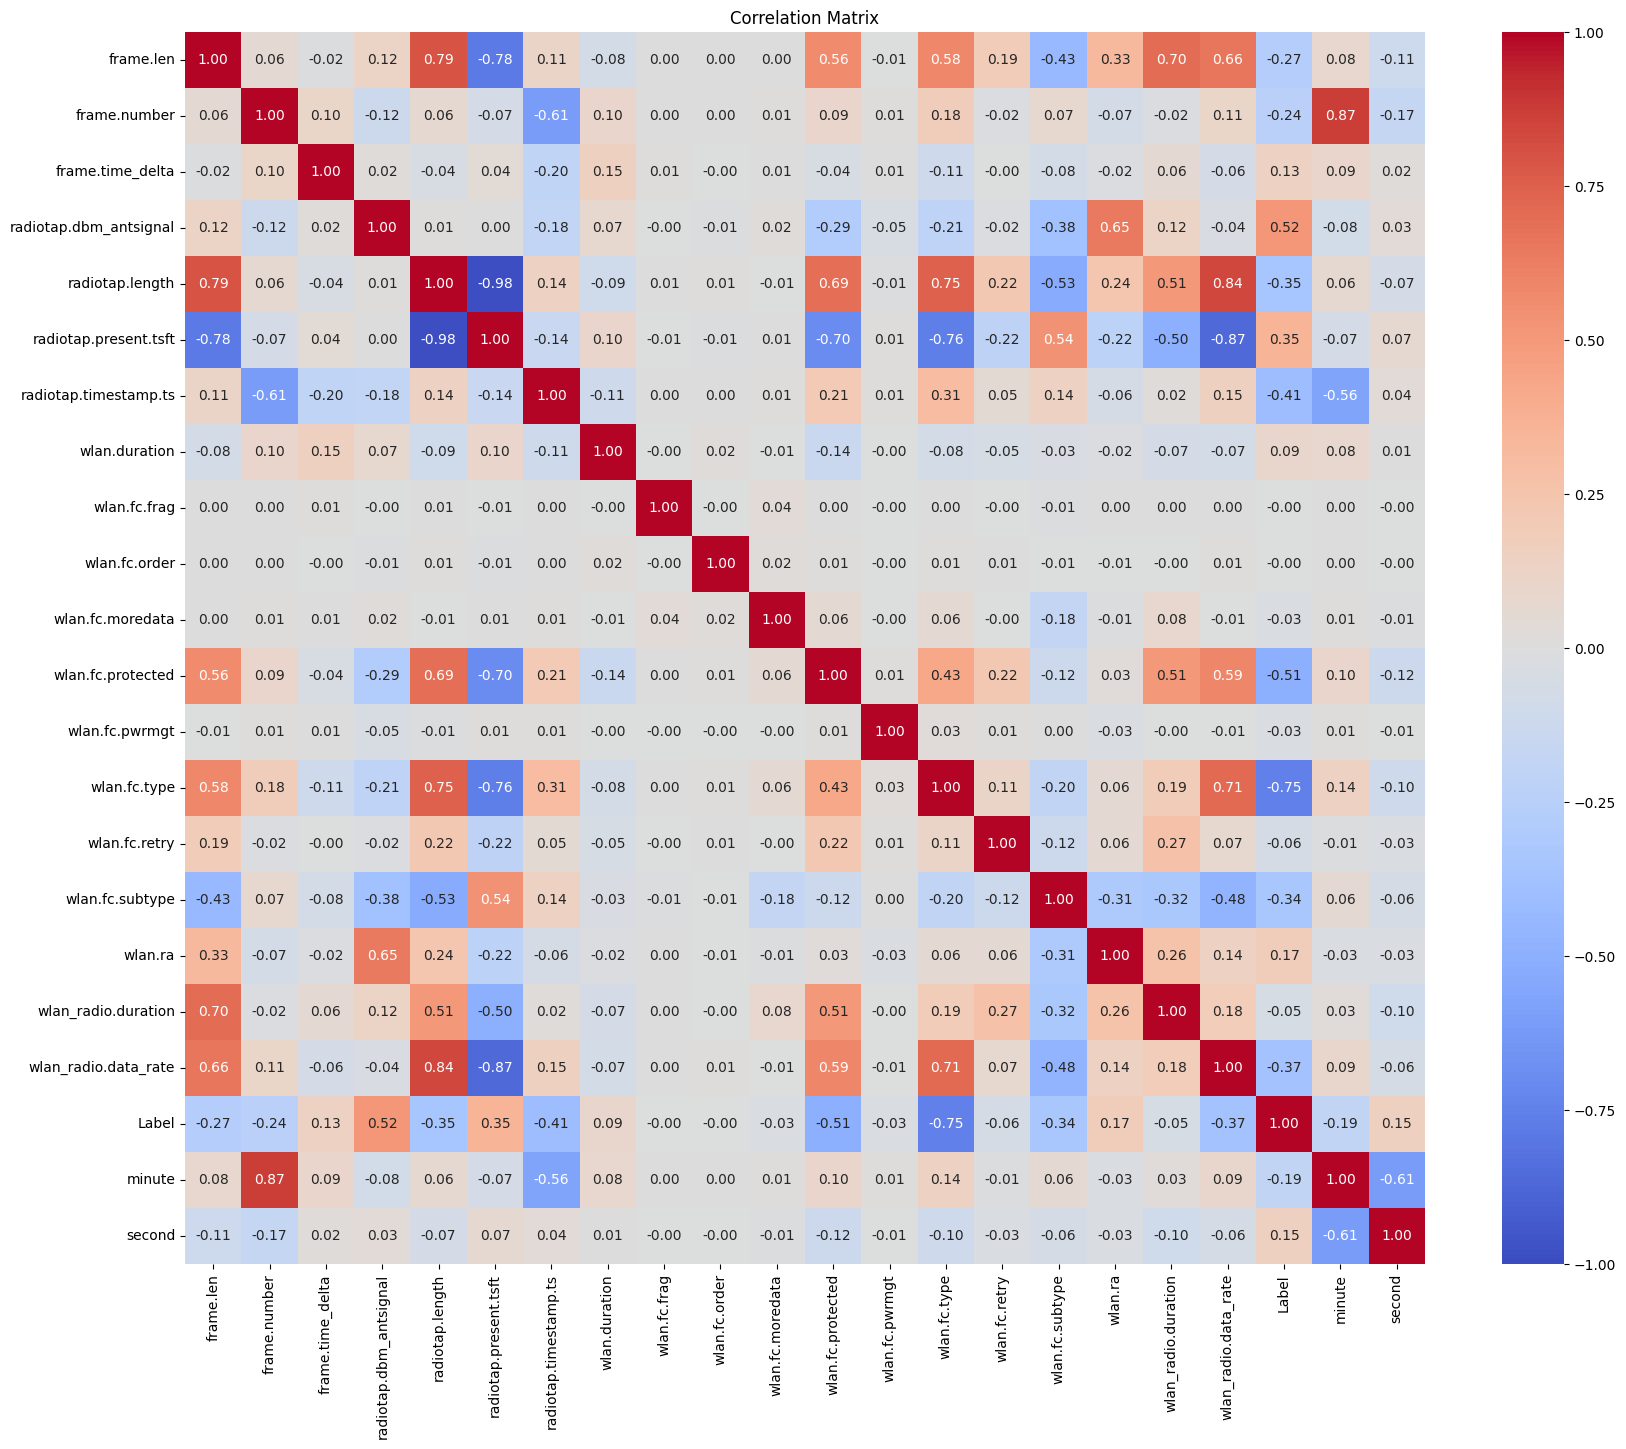

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix (for numeric features)
correlation_matrix = df_reduced.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### 3.2.6 Feature Selection: 
Apply a technique like Recursive Feature Elimination (RFE) to select the most important features.

Selected features by RFE:
['frame.len', 'frame.number', 'frame.time_delta', 'radiotap.dbm_antsignal', 'radiotap.present.tsft', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.protected', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration', 'wlan_radio.data_rate', 'minute', 'second']
Top 15 ranked features by RFE:
                   Feature  Ranking
0                frame.len        1
18    wlan_radio.data_rate        1
17     wlan_radio.duration        1
16                 wlan.ra        1
15         wlan.fc.subtype        1
13            wlan.fc.type        1
11       wlan.fc.protected        1
19                  minute        1
20                  second        1
7            wlan.duration        1
6    radiotap.timestamp.ts        1
5    radiotap.present.tsft        1
3   radiotap.dbm_antsignal        1
2         frame.time_delta        1
1             frame.number        1


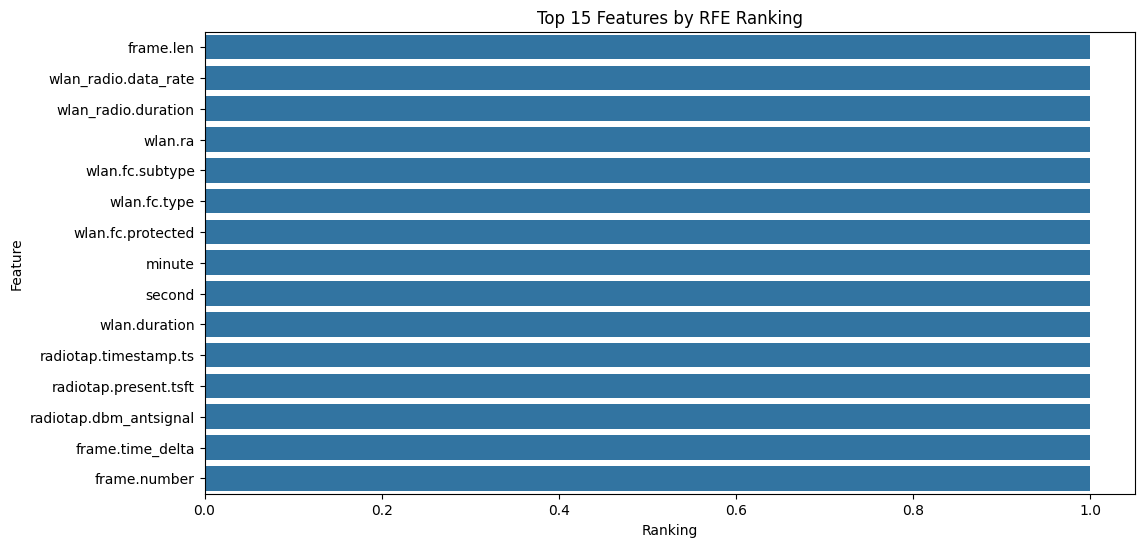

In [260]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into features and target
X = df_reduced.drop('Label', axis=1)  # Features
y = df_reduced['Label']  # Target

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE model with the Random Forest classifier
# We can specify how many features we want to keep (e.g., 10 features)
rfe = RFE(estimator=rf, n_features_to_select=15, step=1)  # step=1 means remove one feature per iteration

# Fit the RFE model
rfe.fit(X, y)

# Get a mask of the selected features (True means the feature was selected)
selected_features_mask = rfe.support_

# Create a DataFrame showing the features and whether they were selected
selected_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features_mask
})

# Filter the selected features
selected_features = selected_features_df[selected_features_df['Selected'] == True]['Feature'].tolist()

# Display the selected features
print("Selected features by RFE:")
print(selected_features)

# Plot the RFE ranking (lower rank is better)
ranking = rfe.ranking_
ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

# Display top 10 ranked features
print("Top 15 ranked features by RFE:")
print(ranking_df.head(15))

# Plot the ranking of the features
plt.figure(figsize=(12, 6))
sns.barplot(x='Ranking', y='Feature', data=ranking_df.head(15))
plt.title('Top 15 Features by RFE Ranking')
plt.show()

In [261]:
# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

# Concatenate the target column back into the new DataFrame
df_selected = pd.concat([X_selected, y], axis=1)

# Display the new DataFrame with selected features
print(df_selected.head())

# Optional: Save the new DataFrame to a CSV file
df_selected.to_csv('selected_features_dataframe.csv', index=False)

   frame.len  frame.number  frame.time_delta  radiotap.dbm_antsignal  \
0        104       2238932          0.000564                  -206.0   
1         86       2050706          0.000172                  -111.0   
2         70       2257223          0.000044                  -197.0   
3        104       2300433          0.000144                  -206.0   
4         86       2102166          0.000096                  -111.0   

   radiotap.present.tsft  radiotap.timestamp.ts  wlan.duration  \
0                      1             4259959698           -1.0   
1                      1             4239996251           60.0   
2                      1             4261852171           -1.0   
3                      1             4266882372           -1.0   
4                      1             4246277999           60.0   

   wlan.fc.protected  wlan.fc.type  wlan.fc.subtype  wlan.ra  \
0                  1             0               13      231   
1                  0             0        

In [262]:
df_selected

frame.len  frame.number  frame.time_delta  radiotap.dbm_antsignal  \
0             104       2238932          0.000564                  -206.0   
1              86       2050706          0.000172                  -111.0   
2              70       2257223          0.000044                  -197.0   
3             104       2300433          0.000144                  -206.0   
4              86       2102166          0.000096                  -111.0   
...           ...           ...               ...                     ...   
389571         86       2492874          0.001869                  -141.0   
389572         86       1895384          0.000134                  -111.0   
389573         70       2337728          0.000060                  -205.0   
389574        196       2492306          0.000106                  -111.0   
389575        104       2227493          0.000221                  -210.0   

        radiotap.present.tsft  radiotap.timestamp.ts  wlan.duration  \
0                           1             4259959698           -1.0   
1                           1             4239996251           60.0   
2                           1             4261852171           -1.0   
3                           1             4266882372           -1.0   
4                           1             4246277999           60.0   
...                       ...                    ...            ...   
389571                      1             4287363943          320.0   
389572                      1             4222816356           60.0   
389573                      1             4270523330           -1.0   
389574                      0             4287228031           48.0   
389575                      1             4258803783           -1.0   

        wlan.fc.protected  wlan.fc.type  wlan.fc.subtype  wlan.ra  \
0                       1             0               13      231   
1                       0             0               10      442   
2                       0             1               12      231   
3                       1             0               13      231   
4                       0             0               10      442   
...                   ...           ...              ...      ...   
389571                  0             0               10      602   
389572                  0             0               10      442   
389573                  0             1               13      231   
389574                  1             2                8      607   
389575                  1             0               13      231   

        wlan_radio.duration  wlan_radio.data_rate  minute  second  Label  
0                        88                 6.000       4      56      0  
1                        64                 6.000       4      36      1  
2                        28                24.000       4      58      0  
3                        88                 6.000       5       3      0  
4                        64                 6.000       4      43      1  
...                     ...                   ...     ...     ...    ...  
389571                   64                 6.000       5      24      1  
389572                   64                 6.000       4      19      1  
389573                   44                 6.000       5       7      0  
389574                   46               173.333       5      24      0  
389575                   88                 6.000       4      55      0  

[389576 rows x 16 columns]

In [21]:
import pandas as pd
df_selected=pd.read_csv('selected_features_dataframe.csv')

In [22]:
df = df_selected

In [23]:
# Check the number of rows before removing duplicates
print(f"Original dataset size: {df.shape}")

# Remove duplicate rows
df = df.drop_duplicates()

# Check the number of rows after removing duplicates
print(f"Dataset size after removing duplicates: {df.shape}")

# Proceed with the rest of the analysis/training with df_cleaned


Original dataset size: (389576, 16)
Dataset size after removing duplicates: (370214, 16)


Missing values per column:
frame.len                 0
frame.number              0
frame.time_delta          0
radiotap.dbm_antsignal    0
radiotap.present.tsft     0
radiotap.timestamp.ts     0
wlan.duration             0
wlan.fc.protected         0
wlan.fc.type              0
wlan.fc.subtype           0
wlan.ra                   0
wlan_radio.duration       0
wlan_radio.data_rate      0
minute                    0
second                    0
Label                     0
dtype: int64

Number of duplicate rows: 0

Constant features (no variance): []

Duplicate features: []


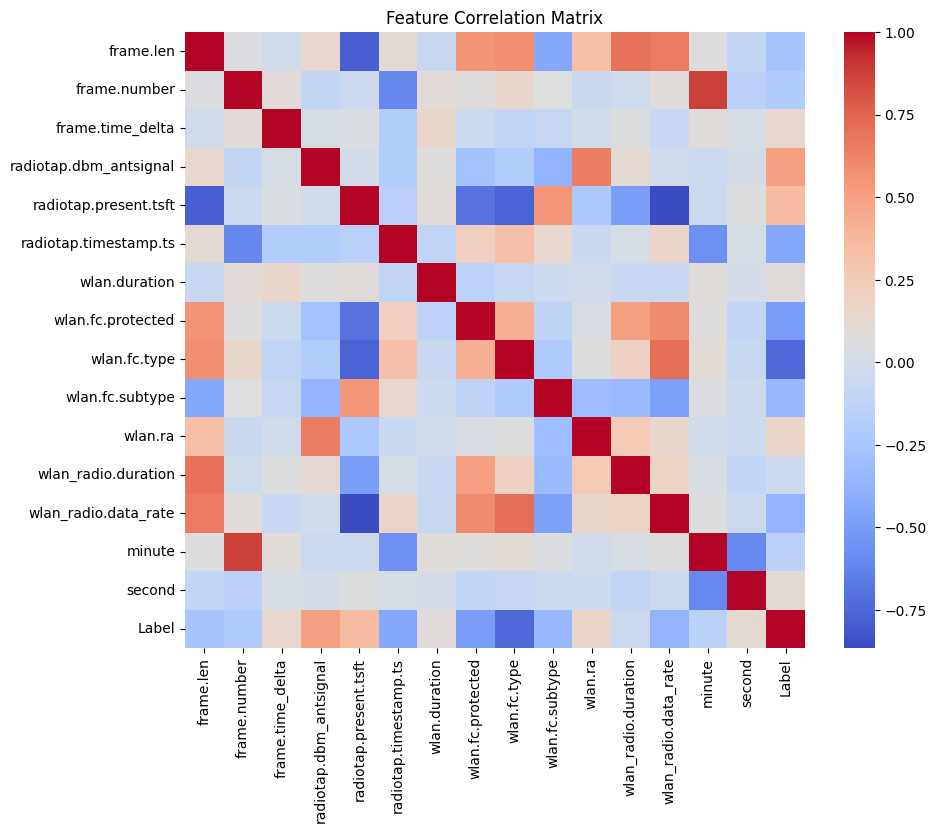


Highly correlated feature pairs: []

Class distribution:
Label
0    194788
1    175426
Name: count, dtype: int64



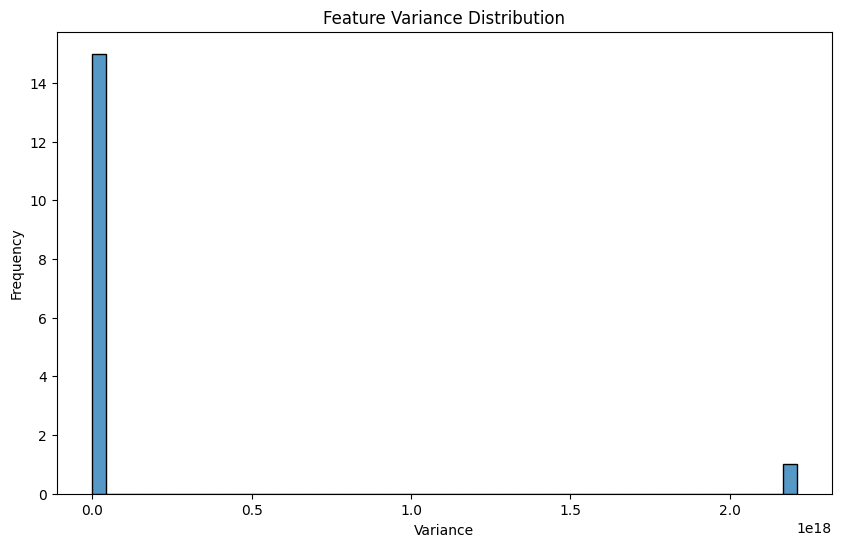


Near-constant features: ['frame.time_delta']

Training set shape: (296171, 15)
Test set shape: (74043, 15)


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Check for duplicate rows in the dataset
duplicates = df.duplicated()
print(f"\nNumber of duplicate rows: {duplicates.sum()}")

# 3. Check for constant features (i.e., features with the same value in all rows)
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print(f"\nConstant features (no variance): {constant_features}")

# 4. Check for duplicate features (i.e., features with identical values in all rows)
duplicate_features = []
for i, col1 in enumerate(df.columns):
    for col2 in df.columns[i+1:]:
        if df[col1].equals(df[col2]):
            duplicate_features.append(col1)
            break
print(f"\nDuplicate features: {duplicate_features}")

# 5. Check feature correlations to identify highly correlated features (possible leakage)
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Identify highly correlated features (correlation > 0.95)
high_corr_features = np.where(np.abs(correlation_matrix) > 0.95)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                   for x, y in zip(*high_corr_features) if x != y and x < y]
print(f"\nHighly correlated feature pairs: {high_corr_pairs}")

# 6. Class distribution check
target_col = 'Label'  # Update with your actual target column name
class_counts = df[target_col].value_counts()
print(f"\nClass distribution:\n{class_counts}")

# 7. Detect if the target (label) column is included in the feature columns (label leakage)
if target_col in df.columns:
    print(f"\nWarning: Target column '{target_col}' is included in the features!")
else:
    print(f"\nTarget column '{target_col}' is not part of the features, you're good!")

# 8. Feature variance analysis
# Plot variance of features to detect any near-constant features
variances = df.var()
plt.figure(figsize=(10, 6))
sns.histplot(variances, bins=50)
plt.title('Feature Variance Distribution')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

# Identify near-constant features (variance < 1e-5)
low_variance_features = variances[variances < 1e-5].index.tolist()
print(f"\nNear-constant features: {low_variance_features}")

# 9. Train/Test Split (Optional) for further checks
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the training and test sets
print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

In [25]:
df

frame.len  frame.number  frame.time_delta  radiotap.dbm_antsignal  \
0             104       2238932          0.000564                  -206.0   
1              86       2050706          0.000172                  -111.0   
2              70       2257223          0.000044                  -197.0   
3             104       2300433          0.000144                  -206.0   
4              86       2102166          0.000096                  -111.0   
...           ...           ...               ...                     ...   
389571         86       2492874          0.001869                  -141.0   
389572         86       1895384          0.000134                  -111.0   
389573         70       2337728          0.000060                  -205.0   
389574        196       2492306          0.000106                  -111.0   
389575        104       2227493          0.000221                  -210.0   

        radiotap.present.tsft  radiotap.timestamp.ts  wlan.duration  \
0                           1             4259959698           -1.0   
1                           1             4239996251           60.0   
2                           1             4261852171           -1.0   
3                           1             4266882372           -1.0   
4                           1             4246277999           60.0   
...                       ...                    ...            ...   
389571                      1             4287363943          320.0   
389572                      1             4222816356           60.0   
389573                      1             4270523330           -1.0   
389574                      0             4287228031           48.0   
389575                      1             4258803783           -1.0   

        wlan.fc.protected  wlan.fc.type  wlan.fc.subtype  wlan.ra  \
0                       1             0               13      231   
1                       0             0               10      442   
2                       0             1               12      231   
3                       1             0               13      231   
4                       0             0               10      442   
...                   ...           ...              ...      ...   
389571                  0             0               10      602   
389572                  0             0               10      442   
389573                  0             1               13      231   
389574                  1             2                8      607   
389575                  1             0               13      231   

        wlan_radio.duration  wlan_radio.data_rate  minute  second  Label  
0                        88                 6.000       4      56      0  
1                        64                 6.000       4      36      1  
2                        28                24.000       4      58      0  
3                        88                 6.000       5       3      0  
4                        64                 6.000       4      43      1  
...                     ...                   ...     ...     ...    ...  
389571                   64                 6.000       5      24      1  
389572                   64                 6.000       4      19      1  
389573                   44                 6.000       5       7      0  
389574                   46               173.333       5      24      0  
389575                   88                 6.000       4      55      0  

[370214 rows x 16 columns]

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Step 1: Train a Random Forest to get feature importance scores
X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Target

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 2: Get feature importances
feature_importances = rf.feature_importances_

# Step 3: Add the importance scores to your DataFrame
df['importance'] = X.dot(feature_importances)

# Step 4: Separate class 0 and class 1
class_0 = df[df['Label'] == 0]
class_1 = df[df['Label'] == 1]

# Step 5: Sort class 0 by importance and downsample
class_0_sorted = class_0.sort_values(by='importance', ascending=False)
class_0_downsampled = resample(class_0_sorted.head(len(class_1)), 
                               replace=False,    # no replacement
                               n_samples=len(class_1),  # match class 1
                               random_state=42)

# Step 6: Combine class 1 with the selected important class 0 samples
df_balanced = pd.concat([class_0_downsampled, class_1])

# Shuffle and reset index
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
print(df_balanced['Label'].value_counts())

Label
0    175426
1    175426
Name: count, dtype: int64


/tmp/ipykernel_23893/1504620852.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['importance'] = X.dot(feature_importances)


In [31]:
df = df_balanced

In [33]:
df = df.drop('importance', axis=1)
df

frame.len  frame.number  frame.time_delta  radiotap.dbm_antsignal  \
0             104       2323864          0.000105                  -205.0   
1              86       2090620          0.000129                  -111.0   
2              70       2504066          0.000058                  -111.0   
3              76       2274363          0.000553                  -111.0   
4              86       2616217          0.000112                  -111.0   
...           ...           ...               ...                     ...   
350847         70       2302026          0.000111                  -111.0   
350848         86       2060866          0.000129                  -111.0   
350849        104       2452985          0.000137                  -211.0   
350850        170       2271216          0.000172                  -238.0   
350851         88       2290432          0.000052                  -238.0   

        radiotap.present.tsft  radiotap.timestamp.ts  wlan.duration  \
0                           1             4269097326           -1.0   
1                           1             4245199174           60.0   
2                           1             4288377678          250.0   
3                           1             4263661756           -1.0   
4                           1                8733929           60.0   
...                       ...                    ...            ...   
350847                      1             4267036674           -1.0   
350848                      1             4241153321           60.0   
350849                      1             4281943499           60.0   
350850                      0             4263295947           -1.0   
350851                      1             4265651447           -1.0   

        wlan.fc.protected  wlan.fc.type  wlan.fc.subtype  wlan.ra  \
0                       1             0               13      231   
1                       0             0               10      442   
2                       0             1               13      602   
3                       0             1               11        2   
4                       0             0               10      442   
...                   ...           ...              ...      ...   
350847                  0             1               13      442   
350848                  0             0               10      442   
350849                  1             0               13      231   
350850                  1             2                8      231   
350851                  0             1                9      231   

        wlan_radio.duration  wlan_radio.data_rate  minute  second  Label  
0                        88                   6.0       5       6      0  
1                        64                   6.0       4      42      1  
2                        44                   6.0       5      25      0  
3                        28                  24.0       5       0      0  
4                        64                   6.0       5      40      1  
...                     ...                   ...     ...     ...    ...  
350847                   44                   6.0       5       3      0  
350848                   64                   6.0       4      38      1  
350849                   88                   6.0       5      18      0  
350850                   56                  52.0       5       0      0  
350851                   32                  24.0       5       2      0  

[350852 rows x 16 columns]

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
df.to_csv('DupliRowsR.csv', index=False)

In [3]:
import pandas as pd
df=pd.read_csv('/data01/user1/FinalProject/NetWorkingProject/OtherFile/DupliRowsReduced.csv')
df

frame.len  frame.number  frame.time_delta  radiotap.dbm_antsignal  \
0             104       2323864          0.000105                  -205.0   
1              86       2090620          0.000129                  -111.0   
2              70       2504066          0.000058                  -111.0   
3              76       2274363          0.000553                  -111.0   
4              86       2616217          0.000112                  -111.0   
...           ...           ...               ...                     ...   
350847         70       2302026          0.000111                  -111.0   
350848         86       2060866          0.000129                  -111.0   
350849        104       2452985          0.000137                  -211.0   
350850        170       2271216          0.000172                  -238.0   
350851         88       2290432          0.000052                  -238.0   

        radiotap.present.tsft  radiotap.timestamp.ts  wlan.duration  \
0                           1             4269097326           -1.0   
1                           1             4245199174           60.0   
2                           1             4288377678          250.0   
3                           1             4263661756           -1.0   
4                           1                8733929           60.0   
...                       ...                    ...            ...   
350847                      1             4267036674           -1.0   
350848                      1             4241153321           60.0   
350849                      1             4281943499           60.0   
350850                      0             4263295947           -1.0   
350851                      1             4265651447           -1.0   

        wlan.fc.protected  wlan.fc.type  wlan.fc.subtype  wlan.ra  \
0                       1             0               13      231   
1                       0             0               10      442   
2                       0             1               13      602   
3                       0             1               11        2   
4                       0             0               10      442   
...                   ...           ...              ...      ...   
350847                  0             1               13      442   
350848                  0             0               10      442   
350849                  1             0               13      231   
350850                  1             2                8      231   
350851                  0             1                9      231   

        wlan_radio.duration  wlan_radio.data_rate  minute  second  Label  
0                        88                   6.0       5       6      0  
1                        64                   6.0       4      42      1  
2                        44                   6.0       5      25      0  
3                        28                  24.0       5       0      0  
4                        64                   6.0       5      40      1  
...                     ...                   ...     ...     ...    ...  
350847                   44                   6.0       5       3      0  
350848                   64                   6.0       4      38      1  
350849                   88                   6.0       5      18      0  
350850                   56                  52.0       5       0      0  
350851                   32                  24.0       5       2      0  

[350852 rows x 16 columns]

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Separate features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print("Training data size before pca:", X_train.shape)
print("Testing data size before pca:", X_test.shape)
print("Training data size before pca:", y_train.shape)
print("Testing data size before pca:", y_test.shape)

# Visualize original class distribution
# plt.figure(figsize=(12, 4))
# sns.countplot(x=y_train)
# plt.title('Original Class Distribution')
# plt.show()

# Step 3: Perform oversampling and undersampling on the training data

# Option 1: Apply SMOTE for oversampling
# smote = SMOTE(random_state=42)
# X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)


# print("Training data size after resampled:", X_train_oversampled.shape)
# print("Testing data size after resampled:", y_train_oversampled.shape)

# # Visualize oversampled class distribution
# plt.figure(figsize=(12, 4))
# sns.countplot(x=y_train_oversampled)
# plt.title('Oversampled Class Distribution (SMOTE)')
# plt.show()

# # Option 2: Apply RandomUnderSampler for undersampling (if needed)
# undersampler = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)


# Visualize undersampled class distribution
# plt.figure(figsize=(12, 4))
# sns.countplot(x=y_train_oversampled)
# plt.title('Final Resampled Class Distribution (Undersampling)')
# plt.show()



# Step 4: Standardize the data after resampling (only for the training set)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)                  # Transform test data based on the training fit

print("Training data size after scaled:", X_train_scaled.shape)
print("Testing data size after scaled:", X_test_scaled.shape)


# Step 5: Apply PCA (Dimensionality Reduction) after scaling
# pca = PCA(n_components=0.90)  # Retain components that explain 90% of the variance
# X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform training data
# X_test_pca = pca.transform(X_test_scaled)        # Transform test data using the same PCA


# Step 7: Visualize explained variance by each component
# explained_variance = np.cumsum(pca.explained_variance_ratio_)
# print(f"Explained variance by each component: {explained_variance}")

# plt.figure(figsize=(10, 6))
# plt.plot(explained_variance, marker='o', linestyle='--')
# plt.title('Explained Variance by Principal Components')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()

# print("Training data size:", X_train_pca.shape)
# print("Testing data size:", X_test_pca.shape)

# print("Training data size after pca:", X_train_scaled.shape)
# print("Testing data size after pca:", X_test_scaled.shape)
# print("Training data size after resampled:", y_train_resampled.shape)
# print("Testing data size after resampled:", y_test.shape)

# Now, model training on X_train_pca and y_train_resampled,
# and test on X_test_pca and y_test


/data01/user1/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training data size before pca: (175426, 15)
Testing data size before pca: (175426, 15)
Training data size before pca: (175426,)
Testing data size before pca: (175426,)
Training data size after scaled: (175426, 15)
Testing data size after scaled: (175426, 15)


# Step : 5 ML Models Pipline

Decision Tree - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87695
           1       1.00      1.00      1.00     87731

    accuracy                           1.00    175426
   macro avg       1.00      1.00      1.00    175426
weighted avg       1.00      1.00      1.00    175426



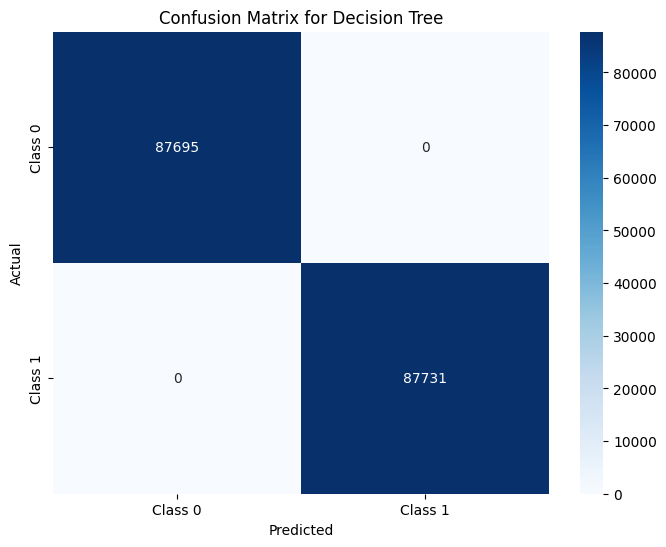

Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87695
           1       1.00      1.00      1.00     87731

    accuracy                           1.00    175426
   macro avg       1.00      1.00      1.00    175426
weighted avg       1.00      1.00      1.00    175426



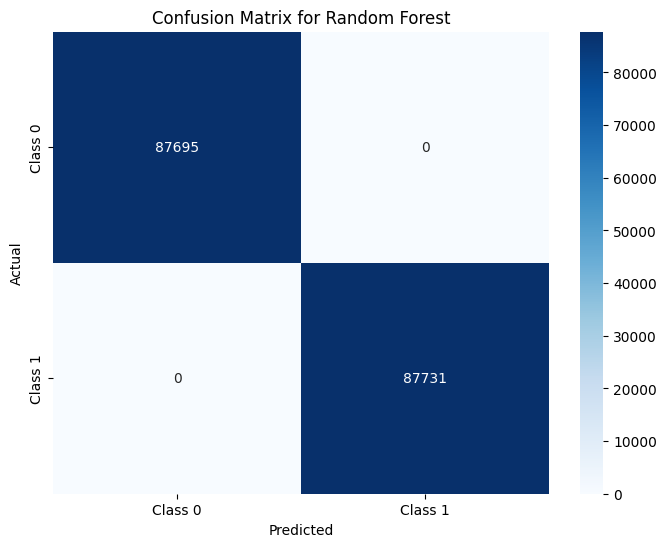

Support Vector Classifier - Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9999, F1-score: 0.9999
Classification Report for Support Vector Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87695
           1       1.00      1.00      1.00     87731

    accuracy                           1.00    175426
   macro avg       1.00      1.00      1.00    175426
weighted avg       1.00      1.00      1.00    175426



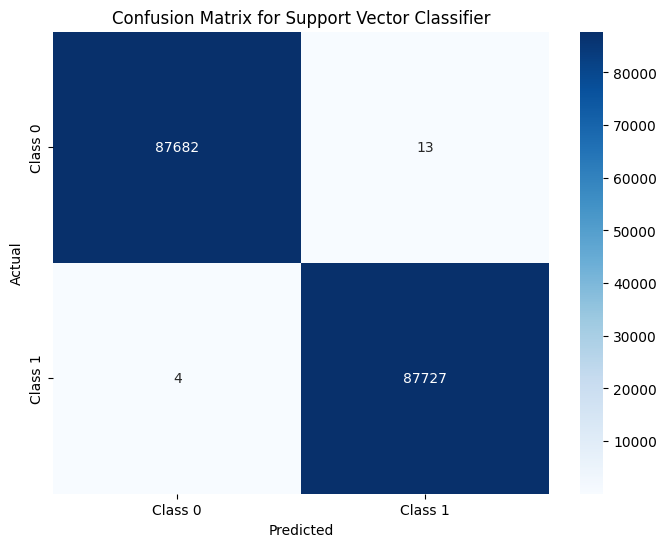

XGB Classifier - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Classification Report for XGB Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87695
           1       1.00      1.00      1.00     87731

    accuracy                           1.00    175426
   macro avg       1.00      1.00      1.00    175426
weighted avg       1.00      1.00      1.00    175426



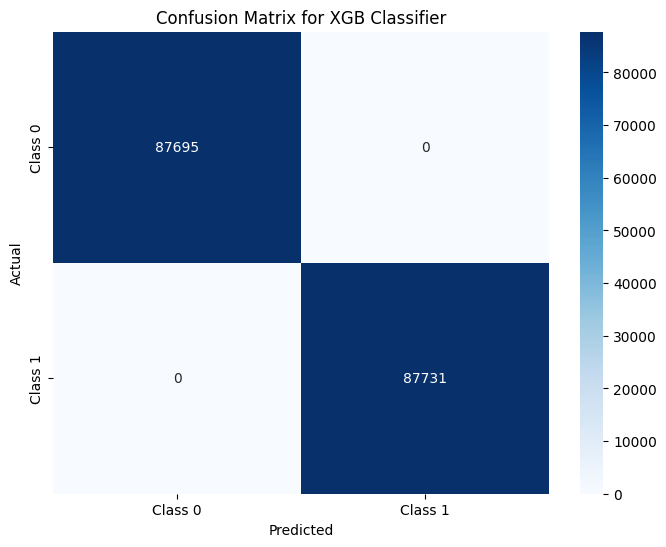

Gradient Boosting Classifier - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Classification Report for Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87695
           1       1.00      1.00      1.00     87731

    accuracy                           1.00    175426
   macro avg       1.00      1.00      1.00    175426
weighted avg       1.00      1.00      1.00    175426



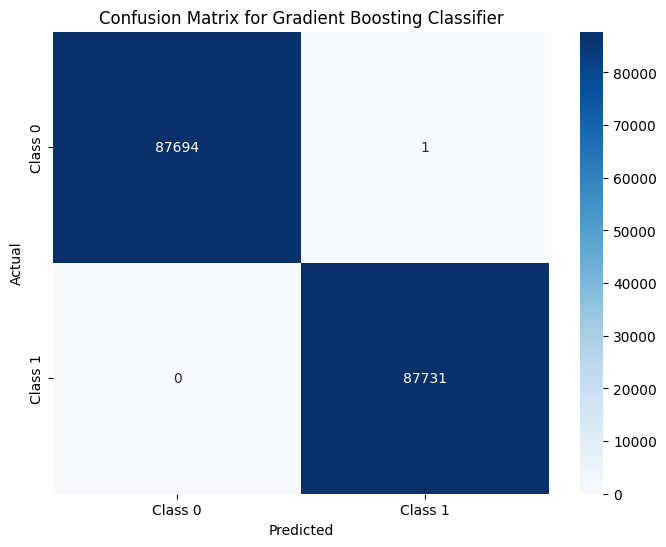

K Neighbors Classifier - Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9999, F1-score: 0.9999
Classification Report for K Neighbors Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87695
           1       1.00      1.00      1.00     87731

    accuracy                           1.00    175426
   macro avg       1.00      1.00      1.00    175426
weighted avg       1.00      1.00      1.00    175426



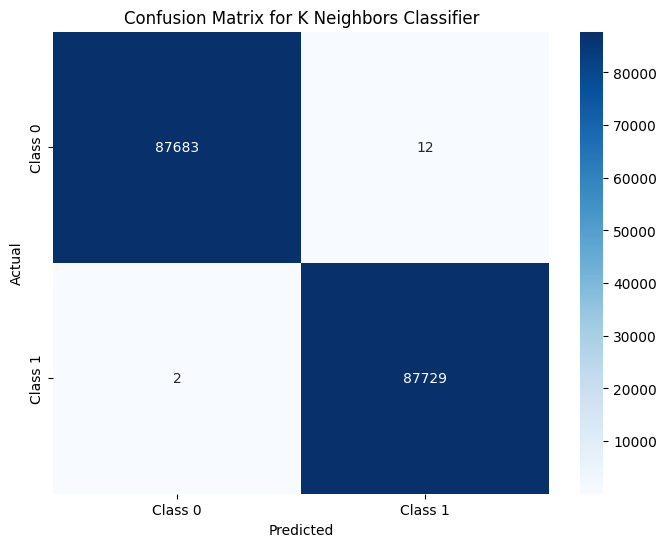

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define classification models to train
models = {
    # 'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'XGB Classifier': XGBClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    # 'Ada Boost Classifier': AdaBoostClassifier(n_estimators=10, learning_rate=0.15, random_state=42),
    'K Neighbors Classifier': KNeighborsClassifier()
}

# Dictionary to store predictions for plotting
predictions = {}

# Dictionary to store confusion matrices
confusion_matrices = {}

# Train and evaluate each classification model
for model_name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[('model', model)])
    
    # Train the model
    pipeline.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test_scaled)

    # Store predictions for later plotting
    predictions[model_name] = (y_test, y_pred)
    
    # Evaluate the model using classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Save confusion matrix for later visualization
    confusion_matrices[model_name] = conf_matrix

    # Print classification metrics
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')
    
    # Print classification report (optional for more detailed metrics)
    print(f'Classification Report for {model_name}:\n', classification_report(y_test, y_pred))
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Training Decision Tree...
Best Parameters for Decision Tree: {'model__max_depth': 10, 'model__min_samples_split': 5}
Cross-validation Score for Decision Tree: 1.0000
Decision Tree - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, ROC-AUC: 1.0000
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87695
           1       1.00      1.00      1.00     87731

    accuracy                           1.00    175426
   macro avg       1.00      1.00      1.00    175426
weighted avg       1.00      1.00      1.00    175426



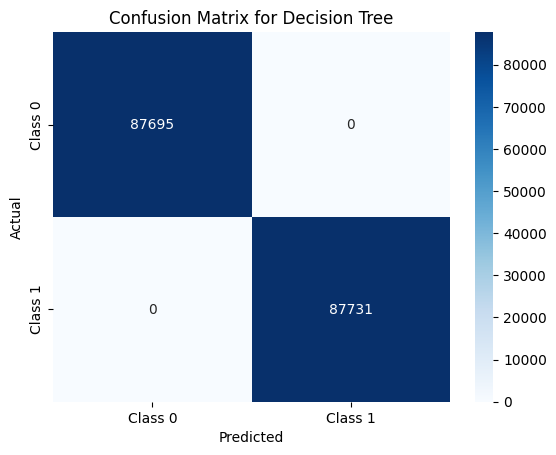

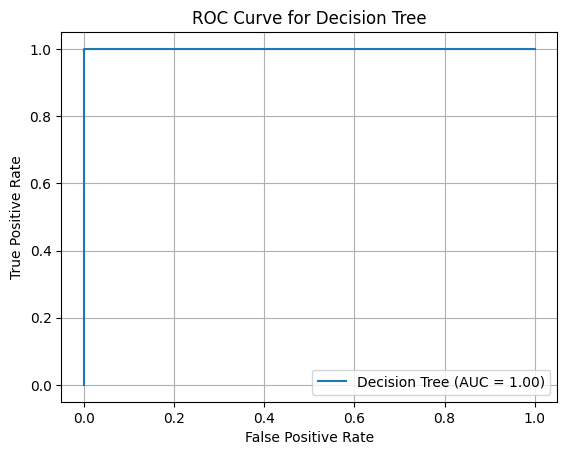

Training Random Forest...


KeyboardInterrupt: 

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import shap



# Step 8: Define classifiers and hyperparameter grids
models = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'model__max_depth': [10, 15, 20, 50, 100], 'model__min_samples_split': [5, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [15, 20, 50, 100], 'model__min_samples_split': [5, 10]}
    },
    'Support Vector Classifier': {
        'model': SVC(probability=True),
        'params': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
    },
    'XGB Classifier': {
        'model': XGBClassifier(),
        'params': {'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [6, 10, 50, 100], 'model__n_estimators': [50, 100, 200]}
    },
    'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'model__learning_rate': [0.01, 0.1], 'model__n_estimators': [50, 100, 200, 'model__max_depth': [3, 5, 50, 100]}
    },
    'K Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}
    }
}

# Dictionary to store evaluation results
evaluation_results = {}

# Step 9: Train, tune, and evaluate each model using GridSearchCV
for model_name, model_dict in models.items():
    print(f"Training {model_name}...")
    
    # Create a pipeline for scaling and modeling
    pipeline = Pipeline(steps=[
        ('model', model_dict['model'])
    ])
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid=model_dict['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Best parameters and cross-validation score
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Cross-validation Score for {model_name}: {grid_search.best_score_:.4f}")

    # Step 10: Make predictions on the test set
    y_pred = grid_search.predict(X_test_scaled)
    y_proba = grid_search.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

    # Step 11: Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba)

    # Store results
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Print Evaluation Metrics
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}')


    # Print classification report (optional for more detailed metrics)
    print(f'Classification Report for {model_name}:\n', classification_report(y_test, y_pred))

    # Step 12: Confusion Matrix visualization
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Step 13: ROC Curve visualization
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Step 15: SHAP values for tree-based models
    if model_name in ['Random Forest', 'Gradient Boosting Classifier', 'XGB Classifier']:
        explainer = shap.TreeExplainer(grid_search.best_estimator_.named_steps['model'])
        shap_values = explainer.shap_values(X_test_scaled)
        shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# Step 15: Compare performance of all models
evaluation_df = pd.DataFrame(evaluation_results).T
print("Model Comparison:")
print(evaluation_df)


# ANN Model

In [6]:
import tensorflow as tf

# List available GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

# If you want to see detailed info
for gpu in gpus:
    print(gpu)


Num GPUs Available:  0


In [ ]:
!nvcc --version

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Use MirroredStrategy for multi-GPU support
strategy = tf.distribute.MirroredStrategy()

# Define the ANN model for binary classification inside the strategy scope
with strategy.scope():
    def create_model():
        model = Sequential()
        
        # Input layer with 32 features
        model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
        
        # Hidden layers with dropout
        model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
        model.add(Dropout(0.3))  # Dropout to prevent overfitting
        
        model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
        model.add(Dropout(0.3))
        
        # Output layer for binary classification (sigmoid activation)
        model.add(Dense(1, activation='sigmoid'))  # Binary classification uses sigmoid
        
        # Compile model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        return model

    # Initialize the model inside the strategy scope
    model = create_model()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Ensure data is in NumPy format
X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)

# Create a dataset from the NumPy arrays
dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))

# Shuffle the dataset before splitting
dataset = dataset.shuffle(buffer_size=len(X_train_scaled))

# Set the auto sharding policy to DATA
options = tf.data.Options()
options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
dataset = dataset.with_options(options)

# Manually split dataset into training and validation sets
dataset_size = len(X_train_scaled)
validation_size = int(0.2 * dataset_size)  # 20% for validation
train_size = dataset_size - validation_size

# Take the training and validation datasets
train_dataset = dataset.take(train_size).batch(128)  # First part as training data
validation_dataset = dataset.skip(train_size).batch(128)  # Remaining as validation data

# Train the model using the manually created validation dataset
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,  # Ensure validation data is passed correctly
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Epoch 1/50
INFO:tensorflow:batch_all_reduce: 8 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 8 all-reduces with algorithm = nccl, num_packs = 1
1705/1705 [==============================] - 22s 11ms/step - loss: 0.1170 - accuracy: 0.9920 - val_loss: 0.0104 - val_accuracy: 0.9999
Epoch 2/50
1705/1705 [==============================] - 17s 10ms/step - loss: 0.0098 - accuracy: 0.9998 - val_loss: 0.0076 - val_accuracy: 0.9997
Epoch 3/50
1705/1705 [==============================] - 17s 10ms/step - loss: 0.0071 - accuracy: 0.9998 - val_loss: 0.0064 - val_accuracy: 0.9999
Epoch 4/50
1705/1705 [==============================] - 17s 10ms/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 0.0049 - val_accuracy: 1.0000
E

2024-10-17 13:20:15.294540: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding as we cannot find appropriate reader dataset op(s) to shard. Error: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_315999"
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset. You can do this by creating a new `tf.data.Options()` object then setting `options.experimental_distribute.a

Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


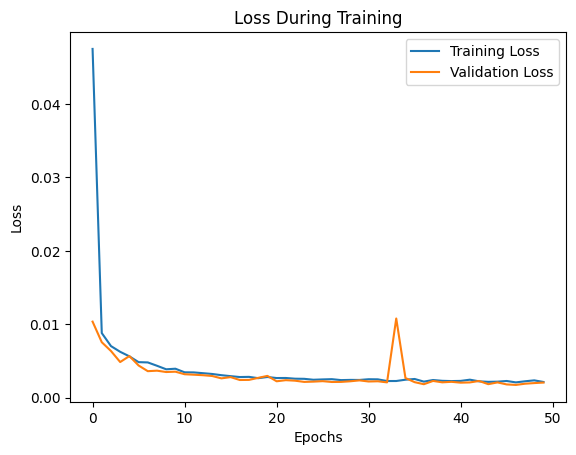

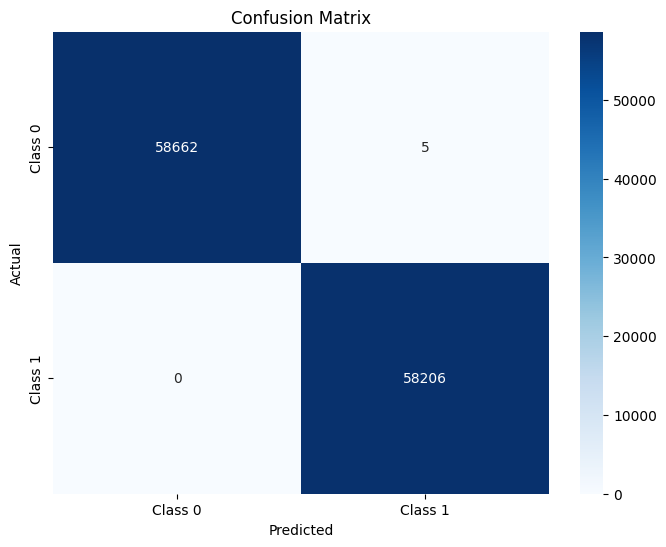

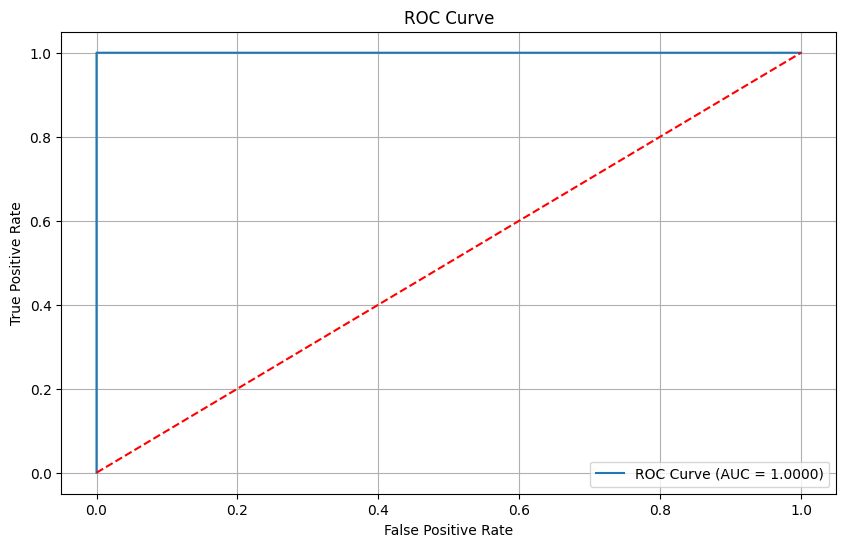

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)  # Probability predictions for ROC-AUC
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1) using 0.5 threshold

# Step 5: Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Optionally, plot the training history
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
